<a href="https://colab.research.google.com/github/shirooo39/MiXLab/blob/master/MiXLab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://github.com/shirooo39/MiXLab" target="_blank">
<img src="https://github.com/fluidicon.png" height="100px" align="left"></a>

# <font size=8><center>**Welcome to <font color=1DA261>Mi</font><font color=FFCf4C>XL</font><font color=4789F4>ab</font>**</center></font>

## <font size=6>About MiXLab</font>

MiXLab is a mix of multiple amazing colab notebooks found on the internet (mostly from github).

The name MiXLab is inspired from this awesome 3rd party Android file manager app called <a href="https://mixplorer.com" target="_blank">MiXplorer</a> and combined with (Google) Colab at the end, resulting in MiXLab.

What is the aim of MiXLab, you might ask?</br>
Well... educational purpose, I guess...

## <font size=6>Features</font>

Here's what you can do with MiXLab
*   Mount/unmount remote storage (Google Drive / rclone).
*   Hosted/P2P downloader.
*   Some other useful tools such as File Manager, Remote Connection and System Monitor to monitor the VM's state.

# <font size=6><center>✦ *Update Logs* ✦</center></font>

<font size=4><center>Last modified: 2021-09-28</center></font>

2021-09-28
---
Added a simple implementation of <a href="#scrollTo=Jbw2QIUB6JKR&uniqifier=1">Real-ESRGAN</a>

2021-09-26
---
MiXLab is now using <a href="https://github.com/WDaan/VueTorrent" target="_blank">VueTorrent</a> for the qBittorrent alternate web interface.

>Note: there seem to be something wrong with VueTorrent not automatically redirecting user to the main page, serving the login page instead, while there is no need to login. You simply have to click on the login button and then it should take you to the main page.

# <font size=6><center>✦ *Colab Stay Alive* ✦</center></font>

In [ ]:
# ============================= FORM ============================= #
# @markdown <font size=5>← [Start] Colab Stay Alive</font>
# @markdown This cell runs a JS code that will automatically press the reconnect button when you got disconnected due to idle.
# ================================================================ #

import IPython
from IPython.display import clear_output
from google.colab import output

display(IPython.display.Javascript('''
 function ClickConnect(){
   btn = document.querySelector("colab-connect-button")
   if (btn != null){
     console.log("Clicked on the connect button"); 
     btn.click() 
     }
   
   btn = document.getElementById('connect')
   if (btn != null){
     console.log("Clicked on the reconnect button"); 
     btn.click() 
     }
  }
  
setInterval(ClickConnect,60000)
'''))

clear_output()

If the cell above doesn't work, try to run one of these codes below on your browser's developer tool/console.

</br>

>Code 1</br>(credit to rockyourcode)
<pre><code>function ClickConnect() {
  console.log('Working')
  document
    .querySelector('#top-toolbar > colab-connect-button')
    .shadowRoot.querySelector('#connect')
    .click()
}

setInterval(ClickConnect, 60000)</code></pre>

</br>

> Code 2</br>(credit to Kavyajeet Bora on stack overflow)
<pre><code>function ClickConnect(){
    console.log("Working"); 
    document.querySelector("colab-toolbar-button#connect").click() 
}
setInterval(ClickConnect,60000)</code></pre>

</br>

> Code 3
<pre><code>function ClickConnect(){
  console.log("Connnect Clicked - Start"); 
  document.querySelector("#top-toolbar > colab-connect-button").shadowRoot.querySelector("#connect").click();
  console.log("Connnect Clicked - End"); 
};
setInterval(ClickConnect, 60000)</code></pre>

</br>

> Code 4</br>(credit to Stephane Belemkoabga on stack overflow)
<pre><code>function ClickConnect(){
    console.log("Working"); 
    document.querySelector("colab-connect-button").click() 
}
setInterval(ClickConnect,60000)</code></pre>

# <font size=6><center>✦ *Mount/Unmount Storage* ✦</center></font>




## <img src="https://firebasestorage.googleapis.com/v0/b/drive-assets.google.com.a.appspot.com/o/Asset%20-%20Drive%20Icon512.png?alt=media" height="45" align="left"/><font size=6>Google Drive</font>

In [ ]:
# ============================= FORM ============================= #
# @markdown <h3>← Mount/Unmount Google Drive</h3>
# @markdown <p>This cell will mount/unmount Google Drive to /content/drive/</p></br>
MODE = "MOUNT" #@param ["MOUNT", "UNMOUNT"]
# ================================================================ #

from IPython.display import clear_output
from google.colab import drive
drive.mount._DEBUG = False
if MODE == "MOUNT":
  drive.mount('/content/drive', force_remount=True)
elif MODE == "UNMOUNT":
  try:
    drive.flush_and_unmount()
  except ValueError:
    pass
  get_ipython().system_raw("rm -rf /root/.config/Google/DriveFS")

clear_output()

In [ ]:
# @markdown <h3>← Force re-mount Google Drive</h3>

drive.mount("/content/drive", force_remount=True)

In [ ]:
# @markdown This cell is not needed (won't do anything if you run it and here just for reference).

## ============================= FORM ============================= #
## @markdown <h3>← Mount Google Drive (Cloud SDK)</h3>
## @markdown <p>This cell will mount Google Drive to /content/downloads/</p>
## @markdown > currently there is no way to unmount the drive.
## ================================================================ #

#!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
#!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
#!apt-get update -qq 2>&1 > /dev/null
#!apt-get -y install -qq google-drive-ocamlfuse fuse
#from google.colab import auth
#auth.authenticate_user()
#from oauth2client.client import GoogleCredentials
#creds = GoogleCredentials.get_application_default()
#import getpass
#!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
#vcode = getpass.getpass()
#!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

#!mkdir -p downloads
#!google-drive-ocamlfuse drive downloads

#from IPython.display import HTML, clear_output

#clear_output()

## <img src="https://raw.githubusercontent.com/rclone/rclone/master/graphics/logo/svg/logo_symbol_color.svg" height="45" align="left"/><font size=6>rclone</font>

In [ ]:
# ============================= FORM ============================= #
#@markdown <font size=5>← Install rclone</font>
build_version = "stable" #@param ["stable", "beta"]

#@markdown ---
automatically_clear_cell_output = True  # @param{type: "boolean"}
# ================================================================ #

import os
import IPython
from IPython.display import clear_output


if build_version == "stable":
	!curl https://rclone.org/install.sh | sudo bash
else:
	!curl https://rclone.org/install.sh | sudo bash -s beta


try:
	os.makedirs("/root/.config/rclone", exist_ok=True)
except OSError as error:
	pass


if automatically_clear_cell_output is True:
	clear_output()
else:
	pass

### <font size=6>rclone 1</font>

In [ ]:
# ============================= FORM ============================= #
# @markdown <font size=5>← [Start] rclone</font>
Mode = "Copy"  # @param ["Move", "Copy", "Sync", "Verify", "Dedupe", "Clean Empty Dirs", "Empty Trash"]
Source = ""  # @param {type:"string"}
Destination = ""  # @param {type:"string"}

#@markdown ---
Extra_Arguments = "--local-no-check-updated"  # @param {type:"string"}
COPY_SHARED_FILES = False  # @param{type: "boolean"}
Compare = "Size & Checksum"
TRANSFERS, CHECKERS = 20, 20
THROTTLE_TPS = True
BRIDGE_TRANSFER = False  # @param{type: "boolean"}
FAST_LIST = False  # @param{type: "boolean"}
OPTIMIZE_GDRIVE = True
SIMPLE_LOG = True
RECORD_LOGFILE = False  # @param{type: "boolean"}
SKIP_NEWER_FILE = False
SKIP_EXISTED = False
SKIP_UPDATE_MODTIME = False
ONE_FILE_SYSTEM = False
LOG_LEVEL = "DEBUG"
SYNC_MODE = "Delete after transfering"
SYNC_TRACK_RENAME = True
DEDUPE_MODE = "Largest"
USE_TRASH = True
DRY_RUN = False  # @param{type: "boolean"}

#@markdown ---
automatically_clear_cell_output = False  # @param{type: "boolean"}
# ================================================================ #


import IPython
from IPython.display import clear_output
from os import path as _p


if not _p.exists("/root/.ipython/mixlab.py"):
    from shlex import split as _spl
    from subprocess import run
    
    shellCmd = "wget -qq https://shirooo39.github.io/MiXLab/resources/mixlab.py \
                    -O /root/.ipython/mixlab.py"
    run(_spl(shellCmd))


from datetime import datetime as _dt
from mixlab import (
    displayOutput,
    checkAvailable,
    runSh,
    prepareSession,
    rcloneConfigurationPath,
    accessSettingFile,
    memGiB,
)


def populateActionArg():
    if Mode == "Copy":
        actionArg = "copy"
    elif Mode == "Sync":
        actionArg = "sync"
    elif Mode == "Verify":
        actionArg = "check"
    elif Mode == "Dedupe":
        actionArg = "dedupe largest"
    elif Mode == "Clean Empty Dirs":
        actionArg = "rmdirs"
    elif Mode == "Empty Trash":
        actionArg = "delete"
    else:
        actionArg = "move"

    return actionArg


def populateCompareArg():
    if Compare == "Mod-Time":
        compareArg = "--ignore-size"
    elif Compare == "Size":
        compareArg = "--size-only"
    elif Compare == "Checksum":
        compareArg = "-c --ignore-size"
    else:
        compareArg = "-c"

    return compareArg


def populateOptimizeGDriveArg():
    return (
        "--buffer-size 256M \
        --drive-chunk-size 256M \
        --drive-upload-cutoff 256M \
        --drive-acknowledge-abuse \
        --drive-keep-revision-forever"

        if OPTIMIZE_GDRIVE
        else "--buffer-size 128M"
    )


def populateGDriveCopyArg():
    if BRIDGE_TRANSFER and memGiB() < 13:
        global TRANSFERS, CHECKERS
        TRANSFERS, CHECKERS = 10, 80
    else:
        pass
    return "--disable copy" if BRIDGE_TRANSFER else "--drive-server-side-across-configs"


def populateStatsArg():
    statsArg = "--stats-one-line --stats=5s" if SIMPLE_LOG else "--stats=5s -P"
    if LOG_LEVEL != "OFF":
        statsArg += " -v" if SIMPLE_LOG else "-vv"
    elif LOG_LEVEL == "INFO":
        statsArg += " --log-level INFO"
    elif LOG_LEVEL == "ERROR":
        statsArg += " --log-level ERROR"
    else:
        statsArg += " --log-level DEBUG"
    return statsArg


def populateSyncModeArg():
    if Mode != "Sync":
        return ""
    elif SYNC_MODE == "Delete before transfering":
        syncModeArg = "--delete-before"
    elif SYNC_MODE == "Delete after transfering":
        syncModeArg = "--delete-after"
    else:
        syncModeArg = "--delete-during"
    if SYNC_TRACK_RENAME:
        syncModeArg += " --track-renames"
    return syncModeArg


def populateDedupeModeArg():
    if DEDUPE_MODE == "Interactive":
        dedupeModeArg = "--dedupe-mode interactive"
    elif DEDUPE_MODE == "Skip":
        dedupeModeArg = "--dedupe-mode skip"
    elif DEDUPE_MODE == "First":
        dedupeModeArg = "--dedupe-mode first"
    elif DEDUPE_MODE == "Newest":
        dedupeModeArg = "--dedupe-mode newest"
    elif DEDUPE_MODE == "Oldest":
        dedupeModeArg = "--dedupe-mode oldest"
    elif DEDUPE_MODE == "Rename":
        dedupeModeArg = "--dedupe-mode rename"
    else:
        dedupeModeArg = "--dedupe-mode largest"

    return dedupeModeArg


def generateCmd():
    sharedFilesArgs = (
        "--drive-shared-with-me --files-from /content/upload.txt --no-traverse"
        if COPY_SHARED_FILES
        else ""
    )

    logFileArg = f"--log-file /content/rclone_log.txt -vv -P"

    args = [
        "rclone",
        f"--config {rcloneConfigurationPath}/rclone.conf",
        '--user-agent "Mozilla"',
        populateActionArg(),
        f'"{Source}"',
        f'"{Destination}"' if Mode in ("Move", "Copy", "Sync") else "",
        f"--transfers {str(TRANSFERS)}",
        f"--checkers {str(CHECKERS)}",
    ]

    if Mode == "Verify":
        args.append("--one-way")
    elif Mode == "Empty Trash":
        args.append("--drive-trashed-only --drive-use-trash=false")
    else:
        args.extend(
            [
                populateGDriveCopyArg(),
                populateSyncModeArg(),
                populateCompareArg(),
                populateOptimizeGDriveArg(),
                "-u" if SKIP_NEWER_FILE else "",
                "--ignore-existing" if SKIP_EXISTED else "",
                "--no-update-modtime" if SKIP_UPDATE_MODTIME else "",
                "--one-file-system" if ONE_FILE_SYSTEM else "",
                "--tpslimit 95 --tpslimit-burst 40" if THROTTLE_TPS else "",
                "--fast-list" if FAST_LIST else "",
                "--delete-empty-src-dirs" if Mode == "Move" else "",
            ]
        )
    args.extend(
        [
            "-n" if DRY_RUN else "",
            populateStatsArg() if not RECORD_LOGFILE else logFileArg,
            sharedFilesArgs,
            Extra_Arguments,
        ]
    )

    return args


def executeRclone():
    prepareSession()
    if Source.strip() == "":
        displayOutput("❌ The source field is empty!")
        return
    if checkAvailable("/content/rclone_log.txt"):
        if not checkAvailable("/content/logfiles"):
            runSh("mkdir -p -m 666 /content/logfiles")
        job = accessSettingFile("job.txt")
        runSh(
            f'mv /content/rclone_log.txt /content/logfiles/{job["title"]}_{job["status"]}_logfile.txt'
        )

    onGoingJob = {
        "title": f'{Mode}_{Source}_{Destination}_{_dt.now().strftime("%a-%H-%M-%S")}',
        "status": "ongoing",
    }
    accessSettingFile("job.txt", onGoingJob)

    cmd = " ".join(generateCmd())
    runSh(cmd, output=True)
    displayOutput(Mode, "success")

    onGoingJob["status"] = "finished"
    accessSettingFile("job.txt", onGoingJob)

executeRclone()


if automatically_clear_cell_output is True:
	clear_output()
else:
	pass

### <font size=6>rclone 2</font><br>

In [ ]:
# ============================= FORM ============================= #
# @markdown <font size=5>← [Start] rclone</font>
Mode = "Copy" #@param ["Copy", "Move", "Sync", "Checker", "Deduplicate", "Remove Empty Directories", "Empty Trash"]
Source = "" #@param {type:"string"}
Destination = "" #@param {type:"string"}

#@markdown ---
#@markdown <center><h3><font color="#3399ff"><b>⚙️ Global Configuration ⚙️</b></font></h3></center>
Extra_Arguments = "--local-no-check-updated" #@param {type:"string"}
Compare = "Size & Mod-Time" #@param ["Size & Mod-Time", "Size & Checksum", "Only Mod-Time", "Only Size", "Only Checksum"]
Checkers = 10 #@param {type:"slider", min:1, max:40, step:1}
Transfers = 10 #@param {type:"slider", min:1, max:20, step:1}
Dry_Run = False #@param {type:"boolean"}
Do_not_cross_filesystem_boundaries = False
Do_not_update_modtime_if_files_are_identical = False #@param {type:"boolean"}
Google_Drive_optimization = False #@param {type:"boolean"}
Large_amount_of_files_optimization = False #@param {type:"boolean"}
Simple_Ouput = True #@param {type:"boolean"}
Skip_all_files_that_exist = False #@param {type:"boolean"}
Skip_files_that_are_newer_on_the_destination = False #@param {type:"boolean"}
Output_Log_File = "OFF" #@param ["OFF", "NOTICE", "INFO", "ERROR", "DEBUG"]

#@markdown <br><center><h3><font color="#3399ff"><b>↪️ Sync Configuration ↩️</b></font></h3></center>
Sync_Mode = "Delete during transfer" #@param ["Delete during transfer", "Delete before transfering", "Delete after transfering"]
Track_Renames = False #@param {type:"boolean"}

#@markdown <br><center><h3><font color="#3399ff"><b>💞 Deduplicate Configuration 💞</b></font></h3></center>
Deduplicate_Mode = "Interactive" #@param ["Interactive", "Skip", "First", "Newest", "Oldest", "Largest", "Rename"]
Deduplicate_Use_Trash = True #@param {type:"boolean"}

#@markdown ---
automatically_clear_cell_output = False  # @param{type: "boolean"}
# ================================================================ #

##### Importing the needed modules
import os
import IPython
from IPython.display import HTML, clear_output


##### Variable Declaration
# Optimized for Google Colaboratory
os.environ["bufferC"] = "--buffer-size 96M"

if Compare == "Size & Checksum":
    os.environ["compareC"] = "-c"
elif Compare == "Only Mod-Time":
    os.environ["compareC"] = "--ignore-size"
elif Compare == "Only Size":
    os.environ["compareC"] = "--size-only"
elif Compare == "Only Checksum":
    os.environ["compareC"] = "-c --ignore-size"
else:
    os.environ["compareC"] = ""

os.environ["sourceC"] = Source
os.environ["destinationC"] = Destination
os.environ["transfersC"] = "--transfers "+str(Transfers)
os.environ["checkersC"] = "--checkers "+str(Checkers)

if Skip_files_that_are_newer_on_the_destination == True:
    os.environ["skipnewC"] = "-u"
else:
    os.environ["skipnewC"] = ""
  
if Skip_all_files_that_exist == True:
    os.environ["skipexistC"] = "--ignore-existing"
else:
    os.environ["skipexistC"] = ""
  
if Do_not_cross_filesystem_boundaries == True:
    os.environ["nocrossfilesystemC"] = "--one-file-system"
else:
    os.environ["nocrossfilesystemC"] = ""
  
if Do_not_update_modtime_if_files_are_identical == True:
    os.environ["noupdatemodtimeC"] = "--no-update-modtime"
else:
    os.environ["noupdatemodtimeC"] = ""

if Large_amount_of_files_optimization == True:
    os.environ["filesoptimizeC"] = "--fast-list"
else:
    os.environ["filesoptimizeC"] = ""
  
if Google_Drive_optimization == True:
    os.environ["driveoptimizeC"] = "--drive-chunk-size 32M --drive-acknowledge-abuse --drive-keep-revision-forever"
else:
    os.environ["driveoptimizeC"] = ""
  
if Dry_Run == True:
    os.environ["dryrunC"] = "-n"
else:
    os.environ["dryrunC"] = ""
  
if Output_Log_File != "OFF":
    os.environ["statsC"] = "--log-file=/root/.rclone_log/rclone_log.txt"
else:
    if Simple_Ouput == True:
        os.environ["statsC"] = "-v --stats-one-line --stats=5s"
    else:
        os.environ["statsC"] = "-v --stats=5s"
  
if Output_Log_File == "INFO":
    os.environ["loglevelC"] = "--log-level INFO"
elif Output_Log_File == "ERROR":
    os.environ["loglevelC"] = "--log-level ERROR"
elif Output_Log_File == "DEBUG":
    os.environ["loglevelC"] = "--log-level DEBUG"
else:
    os.environ["loglevelC"] = ""

os.environ["extraC"] = Extra_Arguments

if Sync_Mode == "Delete during transfer":
    os.environ["syncmodeC"] = "--delete-during"
elif Sync_Mode == "Delete before transfering":
    os.environ["syncmodeC"] = "--delete-before"
elif Sync_Mode == "Delete after transfering":
    os.environ["syncmodeC"] = "--delete-after"
  
if Track_Renames == True:
    os.environ["trackrenamesC"] = "--track-renames"
else:
    os.environ["trackrenamesC"] = ""
  
if Deduplicate_Mode == "Interactive":
    os.environ["deduplicateC"] = "interactive"
elif Deduplicate_Mode == "Skip":
    os.environ["deduplicateC"] = "skip"
elif Deduplicate_Mode == "First":
    os.environ["deduplicateC"] = "first"
elif Deduplicate_Mode == "Newest":
    os.environ["deduplicateC"] = "newest"
elif Deduplicate_Mode == "Oldest":
    os.environ["deduplicateC"] = "oldest"
elif Deduplicate_Mode == "Largest":
    os.environ["deduplicateC"] = "largest"
elif Deduplicate_Mode == "Rename":
    os.environ["deduplicateC"] = "rename"
  
if Deduplicate_Use_Trash == True:
    os.environ["deduplicatetrashC"] = ""
else:
    os.environ["deduplicatetrashC"] = "--drive-use-trash=false"


##### rclone Execution
if Output_Log_File != "OFF" and Mode != "Config":
    !mkdir -p -m 666 /root/.rclone_log/
    display(HTML("<center><h2 style=\"font-family:Trebuchet MS;color:#ce2121;\">Logging enabled, rclone will no longer display any output on the terminal.<br>Please wait until the cell stop by itself.</h2></center><br>"))

if Mode == "Copy":
    !rclone --config=/root/.config/rclone/rclone.conf copy "$sourceC" "$destinationC" $transfersC $checkersC $statsC $loglevelC $compareC $skipnewC $skipexistC $nocrossfilesystemC $noupdatemodtimeC $bufferC $filesoptimizeC $driveoptimizeC $dryrunC $extraC
elif Mode == "Move":
    !rclone --config=/root/.config/rclone/rclone.conf move "$sourceC" "$destinationC" $transfersC $checkersC $statsC $loglevelC --delete-empty-src-dirs $compareC $skipnewC $skipexistC $nocrossfilesystemC $noupdatemodtimeC $bufferC $filesoptimizeC $driveoptimizeC $dryrunC $extraC
elif Mode == "Sync":
    !rclone --config=/root/.config/rclone/rclone.conf sync "$sourceC" "$destinationC" $transfersC $checkersC $statsC $loglevelC $syncmodeC $trackrenamesC $compareC $skipnewC $skipexistC $nocrossfilesystemC $noupdatemodtimeC $bufferC $filesoptimizeC $driveoptimizeC $dryrunC $extraC
elif Mode == "Checker":
    !rclone --config=/root/.config/rclone/rclone.conf check "$sourceC" "$destinationC" $checkersC $statsC $loglevelC $compareC $skipnewC $skipexistC $nocrossfilesystemC $noupdatemodtimeC $bufferC $filesoptimizeC $driveoptimizeC $dryrunC $extraC
elif Mode == "Deduplicate":
    !rclone --config=/root/.config/rclone/rclone.conf dedupe "$sourceC" $checkersC $statsC $loglevelC --dedupe-mode $deduplicateC $deduplicatetrashC $compareC $skipnewC $skipexistC $nocrossfilesystemC $noupdatemodtimeC $bufferC $filesoptimizeC $driveoptimizeC $dryrunC $extraC
elif Mode == "Remove Empty Directories":
    !rclone --config=/root/.config/rclone/rclone.conf rmdirs "$sourceC" $statsC $loglevelC $dryrunC $extraC
elif Mode == "Empty Trash":
    !rclone --config=/root/.config/rclone/rclone.conf cleanup "$sourceC" $statsC $loglevelC $dryrunC $extraC


##### Log Output
if Output_Log_File != "OFF" and Mode != "Config":

    ##### Rename log file and output settings.
    !mv /root/.rclone_log/rclone_log.txt /root/.rclone_log/rclone_log_$(date +%Y-%m-%d_%H.%M.%S).txt
    with open("/root/.rclone_log/" + Mode + "_settings.txt", "w") as f:
        f.write("Mode: " + Mode + \
            "\nCompare: " + Compare + \
            "\nSource: \"" + Source + \
            "\"\nDestination: \"" + Destination + \
            "\"\nTransfers: " + str(Transfers) + \
            "\nCheckers: " + str(Checkers) + \
            "\nSkip files that are newer on the destination: " + str(Skip_files_that_are_newer_on_the_destination) + \
            "\nSkip all files that exist: " + str(Skip_all_files_that_exist) + \
            "\nDo not cross filesystem boundaries: " + str(Do_not_cross_filesystem_boundaries) + \
            "\nDo not update modtime if files are identical: " + str(Do_not_update_modtime_if_files_are_identical) + \
            "\nDry-Run: " + str(Dry_Run) + \
            "\nOutput Log Level: " + Output_Log_File + \
            "\nExtra Arguments: \"" + Extra_Arguments + \
            "\"\nSync Moden: " + Sync_Mode + \
            "\nTrack Renames: " + str(Track_Renames) + \
            "\nDeduplicate Mode: " + Deduplicate_Mode + \
            "\nDeduplicate Use Trash: " + str(Deduplicate_Use_Trash))

    ##### Compressing log file.
    !rm -f /root/rclone_log.zip
    !zip -r -q -j -9 /root/rclone_log.zip /root/.rclone_log/
    !rm -rf /root/.rclone_log/
    !mkdir -p -m 666 /root/.rclone_log/

    ##### Send Log
    if os.path.isfile("/root/rclone_log.zip") == True:
        try:
            files.download("/root/rclone_log.zip")
            !rm -f /root/rclone_log.zip
            display(HTML("<center><h2 style=\"font-family:Trebuchet MS;color:#446785;\">Sending log to your browser...</h2><br></center>"))
        except:
            !mv /root/rclone_log.zip /content/rclone_log_$(date +%Y-%m-%d_%H.%M.%S).zip
            display(HTML("<center><h2 style=\"font-family:Trebuchet MS;color:#446785;\">You can use file explorer to download the log file.</h2><br><img src=\"https://minormole.github.io/RcloneLab/res/rclonelab/01.png\"><br></center>"))
    else:
        clear_output()
        display(HTML("<center><h2 style=\"font-family:Trebuchet MS;color:#ce2121;\">There is no log file.</h2><br></center>"))
    

### Operation has been successfully completed.
if Mode != "Config":
    display(HTML("<center><h2 style=\"font-family:Trebuchet MS;color:#00b24c;\">✅ Operation has been successfully completed.</h2><br></center>"))


##### Automatically clear terminal output if the checkbox's value on the top is set to True.
if automatically_clear_cell_output is True:
    clear_output()
else:
	pass##### Automatically clear terminal output if the checkbox's value on the top is set to True.
if automatically_clear_cell_output is True:
    clear_output()
else:
	pass

### <font size=6>Google Drive 750GB Upload Bandwidth Bypass</font>

<center>
<font size=6 color=red>Still work in progress! Use at your own risk!</font><br>
<font size=4>Be sure to read everything in this block carefully. No, seriously. Read carefully.</font>
</center>

<font size=3>**Always remember to install rclone first!**</font>

In [ ]:
#============================= FORM ============================= #
#@markdown <font size=5>← [Clone] AutorRclone</font>
#================================================================ #

import IPython
from IPython.display import clear_output

!git clone https://github.com/xyou365/AutoRclone /content/tools/AutoRclone
!sudo pip3 install -r /content/tools/AutoRclone/requirements.txt

clear_output()

<font size=4>
Since Google has removed the ability to automatically enable the GDrive API from the good old "Quickstart" (as of 2021-04-15), you will have to manually create a project by yourself, to get the credentials.json.
<br><br>
(This means that you have to do the initial job all by yourself. This includes creating a project on the Google Cloud Platform, enabling the GDrive API, setting up the OAuth 2.0, setting up the OAuth Screen, all that stuff.)
<br><br>
Click <a href="https://developers.google.com/drive/api/v3/quickstart/python#prerequisites" target="_blank">here</a> (opens in new tab) and follow along the tutorial there.
</font>

In [ ]:
#============================= FORM ============================= #
#@markdown <font size=5>← Upload the "credentials.json" File</font>
#================================================================ #

import os
import IPython
from IPython.display import HTML, clear_output


AutoRclone_path = "/content/tools/AutoRclone"


if not os.path.exists(AutoRclone_path):
    display(HTML("<center><h2 style=\"font-family:Trebuchet MS;color:#ce2121;\">❌ Make sure you have already run the first cell first!</h2><br></center>"))
else:
    %cd "$AutoRclone_path"

    from google.colab import files
    uploaded = files.upload()

    %cd /content

    clear_output()

TO DO: Add "remove token" to be able to re-authorize with different account.

#### <font size=6>Generate Project(s) and Service Account(s)</font>

In [ ]:
#============================= FORM ============================= #
#@markdown <font size=5>← Generate Service Account(s) on Existing Project(s)</font>
#@markdown > This cell will generate the Service Accounts on ALL existing project(s)!<br>Let's say you currenly have 2 projects, then the number of service accounts will be created is 200 (100 per project).<br><br>To avoid any unwanted things like messing up your current project, it is highly recommended to run the cell below instead.
#================================================================ #

import IPython
from IPython.display import HTML, clear_output


AutoRclone_path = "/content/tools/AutoRclone"
json_path = "/content/tools/AutoRclone/credentials.json"


if not os.path.exists(AutoRclone_path):
    display(HTML("<center><h2 style=\"font-family:Trebuchet MS;color:#ce2121;\">❌ Make sure you have already run the first cell first!</h2><br></center>"))
elif os.path.exists(AutoRclone_path) and not os.path.exists(json_path):
    display(HTML("<center><h2 style=\"font-family:Trebuchet MS;color:#ce2121;\">❌ Unable to locate the credentials.json file!<br>Please upload it first!</h2><br></center>"))
else:
    %cd /content/tools/AutoRclone
    !python3 gen_sa_accounts.py --quick-setup -1
    %cd /content

    clear_output()

In [ ]:
#============================= FORM ============================= #
#@markdown <font size=5>← Generate New Project(s) and Service Account(s)</font>

the_amount_of_project_to_generate = 1 #@param {type:"slider", min:1, max:10, step:1}
#@markdown > To avoid any unwanted things like messing up your current project, this cell will generate a NEW project instead, on the Google Cloud Platform, based on the number specified by the slider. It will also (trying to) enable the needed API(s) and create the Service Accounts.<br><br>The number of Service Account created per project is 100. That is a lot.<br>So the calculation here is 100 x 750GB = 7500GB or 7.5TB worth of upload bandwidth.<br><br>There could be a chance that Google will notice your action. You obviously don't want that, right?<br>Well... just don't be a glutton and slide the slider all the way to the right and you should be safe to go.<br>(Realistically speaking though, 7.5TB is a lot of upload bandwidth. Even 750 x 5 should be sufficient enough... not to mention the limitation is just a day and will recharge after 24 hours).
#================================================================ #

import IPython
from IPython.display import HTML, clear_output


AutoRclone_path = "/content/tools/AutoRclone"
json_path = "/content/tools/AutoRclone/credentials.json"


if not os.path.exists(AutoRclone_path):
    display(HTML("<center><h2 style=\"font-family:Trebuchet MS;color:#ce2121;\">❌ Make sure you have already run the first cell first!</h2><br></center>"))
elif os.path.exists(AutoRclone_path) and not os.path.exists(json_path):
    display(HTML("<center><h2 style=\"font-family:Trebuchet MS;color:#ce2121;\">❌ Unable to locate the credentials.json file!<br>Please upload it first!</h2><br></center>"))
else:
    %cd /content/tools/AutoRclone
    !python3 gen_sa_accounts.py --quick-setup "$the_amount_of_project_to_generate" --new-only
    %cd /content

    clear_output()

In [ ]:
#============================= FORM ============================= #
#@markdown <font size=5>← Download the Service Account Keys (Optional)</font>
Project_ID = "" #@param {type:"string"}
#@markdown > After you have generated the project(s) and the service account(s) using one one the cell above, the service account keys should be automatically downloaded.<br><br>You can still run this cell to manually do it yourself, or if you want to download keys from a specific project.
#================================================================ #

import IPython
from IPython.display import HTML, clear_output


AutoRclone_path = "/content/tools/AutoRclone"
json_path = "/content/tools/AutoRclone/credentials.json"


if not os.path.exists(AutoRclone_path):
    display(HTML("<center><h2 style=\"font-family:Trebuchet MS;color:#ce2121;\">❌ Make sure you have already run the first cell first!</h2><br></center>"))
elif os.path.exists(AutoRclone_path) and not os.path.exists(json_path):
    display(HTML("<center><h2 style=\"font-family:Trebuchet MS;color:#ce2121;\">❌ Unable to locate the credentials.json file!<br>Please upload it first!</h2><br></center>"))
else:
    %cd /content/tools/AutoRclone
    !python3 gen_sa_accounts.py --download-keys "$Project_ID"
    %cd /content

    clear_output()

In [ ]:
#============================= FORM ============================= #
#@markdown <font size=5>← Clear the "accounts" Folder (Optional)</font>
#@markdown > If you think the "accounts" folder is cluttered, feel free to run this cell and then run the cell above this to re-download the service account keys.
#================================================================ #

import os
import shutil

accounts_path = "/content/tools/AutoRclone/accounts"

if os.path.exists(accounts_path) and os.path.isdir(accounts_path):
    shutil.rmtree(accounts_path)
    os.makedirs(accounts_path)
else:
    os.makedirs(accounts_path)

In [ ]:
#============================= FORM ============================= #
#@markdown <font size=5>← Export the Email Addresses from the JSON Files to a Text File</font>
input_path = "/content/tools/AutoRclone/accounts" #@param {type:"string"}
#@markdown > Path to the folder which contain the Service Account JSON files.
#output_name = "" #@param {type:"string"}
#output_path = "" #@param {type:"string"}
##@markdown > If both fields are empty, the default name and path for the output file will be used.<br><br>Name = service-account-emails.txt<br>Path = /content
#================================================================ #

import os
import IPython
from IPython.display import HTML, clear_output


#if output_name and output_path == "":
#    output_name = "service-account-emails"
#    output_path = "/content"
#elif output_name == "" and not output_path == "":
#    output_name = "service-account-emails"
#elif not output_name == "" and output_path == "":
#    output_path = "/content"


if input_path == "":
    display(HTML("<center><h2 style=\"font-family:Trebuchet MS;color:#ce2121;\">❌ The input_path field is empty!</h2><br></center>"))
else:
    if not os.path.exists(input_path):
        display(HTML("<center><h2 style=\"font-family:Trebuchet MS;color:#ce2121;\">❌ The path you have entered does not exist!</h2><br></center>"))
    elif os.path.exists(input_path) and os.path.isfile(input_path):
        display(HTML("<center><h2 style=\"font-family:Trebuchet MS;color:#ce2121;\">❌ The input_path is not a folder!</h2><br></center>"))
    elif os.path.exists(input_path) and os.path.isdir(input_path):
        %cd "$input_path"
        !grep -oPh '"client_email": "\K[^"]+' *.json > /content/service_account_emails.txt
        #!grep -oPh '"client_email": "\K[^"]+' *.json > "$output_path"/"$output_name".txt
        %cd /content

        clear_output()

        display(HTML("<center><h2 style=\"font-family:Trebuchet MS;color:#00b24c;\">✅ The output is saved in /content/service_account_emails.txt</h2><br></center>"))

In [ ]:
#============================= FORM ============================= #
#@markdown <font size=5>← Bulk Rename the Service Account Keys (Optional)</font>
service_account_keys_path = "/content/tools/AutoRclone/accounts" #@param {type:"string"}
rename_prefix = "" #@param {type:"string"}
#@markdown > If the rename_prefix field is empty, the default prefix will be given: service_account_0 to 100.
#================================================================ #

import os

if rename_prefix == "":
    rename_prefix = "service_account_"
else:
    rename_prefix = rename_prefix

def main():
    for count, filename in enumerate(os.listdir(service_account_keys_path)):
        destination = rename_prefix + str(count) + ".json"
        source = service_account_keys_path + "/" + filename
        destination = service_account_keys_path + "/" + destination
          
        # rename() function will
        # rename all the files
        os.rename(source, destination)
  
if __name__ == '__main__':
    main()

In [ ]:
#============================= FORM ============================= #
#@markdown <font size=5>← Bulk Add the Service Accounts into a Team Drive (Optional)</font>
Team_Drive_ID = "" #@param {type:"string"}
#@markdown > If this cell does not work or maybe not doing anything, simply create a Google Group (click <a href="https://groups.google.com/my-groups" target="_blank">here</a> (opens in new tab)) and add all, if not, a number of the service accounts into that group and then on the Team Drive, just invite over the group's email into the Team Drive.<br><br>The group's email should look something like this: group-name@googlegroups.com
#================================================================ #

import os
import IPython
from IPython.display import HTML, clear_output

if not os.path.exists("/content/tools/AutoRclone/add_to_team_drive.py"):
    display(HTML("<center><h2 style=\"font-family:Trebuchet MS;color:#ce2121;\">❌ Unable to locate the required script!<br>Make sure you have already run the cell [Clone] AutoRclone first!</h2><br></center>"))
else:
    if Team_Drive_ID == "":
        display(HTML("<center><h2 style=\"font-family:Trebuchet MS;color:#ce2121;\">❌ The Team_Drive_ID field is empty!</h2><br></center>"))
    elif not Team_Drive_ID == "":
        %cd /content/tools/AutoRclone
        !python3 add_to_team_drive.py -d "Team_Drive_ID"
        %cd /content

        clear_output()

#### <font size=6>Perform the Task</font>

In [ ]:
#============================= FORM ============================= #
#@markdown <font size=5>← [Start] Method 1</font>
Source = "" #@param {type:"string"}
Destination = "" #@param {type:"string"}
#@markdown > I'm pretty sure this only works between Team Drive to Team Drive, but your mileage may vary.
#================================================================ #

import os
import IPython
from IPython.display import HTML, clear_output

if not os.path.exists("/content/tools/AutoRclone/rclone_sa_magic.py"):
    display(HTML("<center><h2 style=\"font-family:Trebuchet MS;color:#ce2121;\">❌ Unable to locate the required script!<br>Make sure you have already run the cell [Clone] AutoRclone first!</h2><br></center>"))
else:
    if Source is "" and not Destination is "":
        display(HTML("<center><h2 style=\"font-family:Trebuchet MS;color:#ce2121;\">❌ The Source field is empty!</h2><br></center>"))
    elif not Source is "" and Destination is "":
        display(HTML("<center><h2 style=\"font-family:Trebuchet MS;color:#ce2121;\">❌ The Destination field is empty!</h2><br></center>"))
    elif Source is "" and Destination is "":
        display(HTML("<center><h2 style=\"font-family:Trebuchet MS;color:#ce2121;\">❌ Both of the fields above are empty!</h2><br></center>"))
    else:
        %cd /content/tools/AutoRclone
        !python3 rclone_sa_magic.py -s "$Source" -d "$Destination" -b 1 -e 600
        %cd /content

        clear_output()

### <font size=6>rclone Configuration</font>

In [ ]:
# ============================= FORM ============================= #
# @markdown <font size=5>← [Start] rclone WebUI Configuration</font>
# @markdown >rclone WebUI Default Credential</br>Username: user</br>Password: pass
USE_FREE_TOKEN = True
TOKEN = ""
REGION = "US"
Tunneling = "argo_tunnel_(cloudflare)" #@param ["argo_tunnel_(cloudflare)", "localhost.run", "ngrok"]

if Tunneling == "argo_tunnel_(cloudflare)":
    PORT_FORWARD = "argotunnel"
elif Tunneling == "localhost.run":
    PORT_FORWARD = "localhost"
elif Tunneling == "ngrok":
    PORT_FORWARD = "ngrok"
# ================================================================ #

import os, signal, random, string, urllib.request, time
from IPython.display import HTML, clear_output

HOME = os.path.expanduser("~")
runW = get_ipython()

if not os.path.exists("/root/.ipython/mixlab.py"):
    from shlex import split as _spl
    from subprocess import run

    shellCmd = "wget -qq https://shirooo39.github.io/MiXLab/resources/mixlab.py \
                -O /root/.ipython/mixlab.py"
    run(_spl(shellCmd))

from mixlab import (
    runSh,
    loadingAn,
    PortForward_wrapper,
    displayUrl,
    findProcess,
    CWD,
    textAn,
    checkAvailable,
    displayOutput,
    prepareSession,
    rcloneConfigurationPath,
    accessSettingFile,
    memGiB,
)

loadingAn()
prepareSession()

pid = findProcess("rclone", "rcd", isPid=True)

try:
    os.kill(int(pid), signal.SIGTERM)
except TypeError:
    pass
  
cmd = "rclone rcd --rc-web-gui --rc-addr :5572" \
      " --rc-serve" \
      " --rc-user=user --rc-pass=pass" \
      " --rc-no-auth" \
      rf" --config {rcloneConfigurationPath}/rclone.conf" \
      ' --user-agent "Mozilla"' \
      ' --transfers 16' \
      " &"

runSh(cmd, shell=True)
Server = PortForward_wrapper(PORT_FORWARD, TOKEN, USE_FREE_TOKEN, [['rcloneWebUI', 5572, 'http']], 'REGION.lower', [f"{HOME}/.ngrok2/rcloneWebUI.yml", 4099]).start('rcloneWebUI', displayB=False)
clear_output()
displayUrl(Server, pNamU='rclone WebUI : ')

In [ ]:
# ============================= FORM ============================= #
# @markdown <font size=5>← [Start] rclone CLI Configuration</font>
# @markdown <p>Run this cell to create and/or edit an rclone configuration.</p>
# @markdown > After you have created a configuration, download the configuration file.</br>In the next time you want to mount an rclone drive, simply import the configuration file.
USE_FREE_TOKEN = True
TOKEN = ""  #
REGION = "US"
Tunneling = "argo_tunnel_(cloudflare)" #@param ["argo_tunnel_(cloudflare)", "localhost.run", "ngrok"]

# @markdown ---
automatically_clear_cell_output = True  # @param{type: "boolean"}

if Tunneling == "argo_tunnel_(cloudflare)":
    PORT_FORWARD = "argotunnel"
elif Tunneling == "localhost.run":
    PORT_FORWARD = "localhost"
elif Tunneling == "ngrok":
    PORT_FORWARD = "ngrok"
# ================================================================ #

import os, urllib.request, IPython
from IPython.display import HTML, clear_output

HOME = os.path.expanduser("~")
runW = get_ipython()

if not os.path.exists("/root/.ipython/mixlab.py"):
  from shlex import split as _spl
  from subprocess import run

  shellCmd = "wget -qq https://shirooo39.github.io/MiXLab/resources/mixlab.py \
                  -O /root/.ipython/mixlab.py"
  run(_spl(shellCmd))

from mixlab import (
    prepareSession,
    rcloneConfigurationPath,
    runSh,
    PortForward_wrapper
)

import codecs, contextlib, locale, os, pty, select, signal, subprocess, sys, termios, time
from IPython.utils import text
import six
from google.colab import _ipython
from google.colab import _message
from google.colab.output import _tags

# Linux read(2) limits to 0x7ffff000 so stay under that for clarity.
_PTY_READ_MAX_BYTES_FOR_TEST = 2**20  # 1MB

_ENCODING = 'UTF-8'

class ShellResult(object):
  """Result of an invocation of the shell magic.

  Note: This is intended to mimic subprocess.CompletedProcess, but has slightly
  different characteristics, including:
    * CompletedProcess has separate stdout/stderr properties. A ShellResult
      has a single property containing the merged stdout/stderr stream,
      providing compatibility with the existing "!" shell magic (which this is
      intended to provide an alternative to).
    * A custom __repr__ method that returns output. When the magic is invoked as
      the only statement in the cell, Python prints the string representation by
      default. The existing "!" shell magic also returns output.
  """

  def __init__(self, args, returncode, command_output):
    self.args = args
    self.returncode = returncode
    self.output = command_output

  def check_returncode(self):
    if self.returncode:
      raise subprocess.CalledProcessError(
          returncode=self.returncode, cmd=self.args, output=self.output)

  def _repr_pretty_(self, p, cycle):  # pylint:disable=unused-argument
    # Note: When invoking the magic and not assigning the result
    # (e.g. %shell echo "foo"), Python's default semantics will be used and
    # print the string representation of the object. By default, this will
    # display the __repr__ of ShellResult. Suppress this representation since
    # the output of the command has already been displayed to the output window.
    if cycle:
      raise NotImplementedError


def _configure_term_settings(pty_fd):
  term_settings = termios.tcgetattr(pty_fd)
  # ONLCR transforms NL to CR-NL, which is undesirable. Ensure this is disabled.
  # http://man7.org/linux/man-pages/man3/termios.3.html
  term_settings[1] &= ~termios.ONLCR

  # ECHOCTL echoes control characters, which is undesirable.
  term_settings[3] &= ~termios.ECHOCTL

  termios.tcsetattr(pty_fd, termios.TCSANOW, term_settings)


def _run_command(cmd, clear_streamed_output):
  """Calls the shell command, forwarding input received on the stdin_socket."""
  locale_encoding = locale.getpreferredencoding()
  if locale_encoding != _ENCODING:
    raise NotImplementedError(
        'A UTF-8 locale is required. Got {}'.format(locale_encoding))

  parent_pty, child_pty = pty.openpty()
  _configure_term_settings(child_pty)

  epoll = select.epoll()
  epoll.register(
      parent_pty,
      (select.EPOLLIN | select.EPOLLOUT | select.EPOLLHUP | select.EPOLLERR))

  try:
    temporary_clearer = _tags.temporary if clear_streamed_output else _no_op

    with temporary_clearer(), _display_stdin_widget(
        delay_millis=500) as update_stdin_widget:
      # TODO(b/115531839): Ensure that subprocesses are terminated upon
      # interrupt.
      p = subprocess.Popen(
          cmd,
          shell=True,
          executable='/bin/bash',
          stdout=child_pty,
          stdin=child_pty,
          stderr=child_pty,
          close_fds=True)
      # The child PTY is only needed by the spawned process.
      os.close(child_pty)

      return _monitor_process(parent_pty, epoll, p, cmd, update_stdin_widget)
  finally:
    epoll.close()
    os.close(parent_pty)


class _MonitorProcessState(object):

  def __init__(self):
    self.process_output = six.StringIO()
    self.is_pty_still_connected = True


def _monitor_process(parent_pty, epoll, p, cmd, update_stdin_widget):
  """Monitors the given subprocess until it terminates."""
  state = _MonitorProcessState()

  # A single UTF-8 character can span multiple bytes. os.read returns bytes and
  # could return a partial byte sequence for a UTF-8 character. Using an
  # incremental decoder is incrementally fed input bytes and emits UTF-8
  # characters.
  decoder = codecs.getincrementaldecoder(_ENCODING)()

  num_interrupts = 0
  echo_status = None
  while True:
    try:
      result = _poll_process(parent_pty, epoll, p, cmd, decoder, state)
      if result is not None:
        return result
      term_settings = termios.tcgetattr(parent_pty)
      new_echo_status = bool(term_settings[3] & termios.ECHO)
      if echo_status != new_echo_status:
        update_stdin_widget(new_echo_status)
        echo_status = new_echo_status
    except KeyboardInterrupt:
      try:
        num_interrupts += 1
        if num_interrupts == 1:
          p.send_signal(signal.SIGINT)
        elif num_interrupts == 2:
          # Process isn't responding to SIGINT and user requested another
          # interrupt. Attempt to send SIGTERM followed by a SIGKILL if the
          # process doesn't respond.
          p.send_signal(signal.SIGTERM)
          time.sleep(0.5)
          if p.poll() is None:
            p.send_signal(signal.SIGKILL)
      except KeyboardInterrupt:
        # Any interrupts that occur during shutdown should not propagate.
        pass

      if num_interrupts > 2:
        # In practice, this shouldn't be possible since
        # SIGKILL is quite effective.
        raise


def _poll_process(parent_pty, epoll, p, cmd, decoder, state):
  """Polls the process and captures / forwards input and output."""

  terminated = p.poll() is not None
  if terminated:
    termios.tcdrain(parent_pty)
    # We're no longer interested in write events and only want to consume any
    # remaining output from the terminated process. Continuing to watch write
    # events may cause early termination of the loop if no output was
    # available but the pty was ready for writing.
    epoll.modify(parent_pty,
                 (select.EPOLLIN | select.EPOLLHUP | select.EPOLLERR))

  output_available = False

  events = epoll.poll()
  input_events = []
  for _, event in events:
    if event & select.EPOLLIN:
      output_available = True
      raw_contents = os.read(parent_pty, _PTY_READ_MAX_BYTES_FOR_TEST)
      import re
      decoded_contents = re.sub(r"http:\/\/127.0.0.1:53682", Server["url"], 
                                decoder.decode(raw_contents))
      sys.stdout.write(decoded_contents)
      state.process_output.write(decoded_contents)

    if event & select.EPOLLOUT:
      # Queue polling for inputs behind processing output events.
      input_events.append(event)

    # PTY was disconnected or encountered a connection error. In either case,
    # no new output should be made available.
    if (event & select.EPOLLHUP) or (event & select.EPOLLERR):
      state.is_pty_still_connected = False

  for event in input_events:
    # Check to see if there is any input on the stdin socket.
    # pylint: disable=protected-access
    input_line = _message._read_stdin_message()
    # pylint: enable=protected-access
    if input_line is not None:
      # If a very large input or sequence of inputs is available, it's
      # possible that the PTY buffer could be filled and this write call
      # would block. To work around this, non-blocking writes and keeping
      # a list of to-be-written inputs could be used. Empirically, the
      # buffer limit is ~12K, which shouldn't be a problem in most
      # scenarios. As such, optimizing for simplicity.
      input_bytes = bytes(input_line.encode(_ENCODING))
      os.write(parent_pty, input_bytes)

  # Once the process is terminated, there still may be output to be read from
  # the PTY. Wait until the PTY has been disconnected and no more data is
  # available for read. Simply waiting for disconnect may be insufficient if
  # there is more data made available on the PTY than we consume in a single
  # read call.
  if terminated and not state.is_pty_still_connected and not output_available:
    sys.stdout.flush()
    command_output = state.process_output.getvalue()
    return ShellResult(cmd, p.returncode, command_output)

  if not output_available:
    # The PTY is almost continuously available for reading input to provide
    # to the underlying subprocess. This means that the polling loop could
    # effectively become a tight loop and use a large amount of CPU. Add a
    # slight delay to give resources back to the system while monitoring the
    # process.
    # Skip this delay if we read output in the previous loop so that a partial
    # read doesn't unnecessarily sleep before reading more output.
    # TODO(b/115527726): Rather than sleep, poll for incoming messages from
    # the frontend in the same poll as for the output.
    time.sleep(0.1)


@contextlib.contextmanager
def _display_stdin_widget(delay_millis=0):
  """Context manager that displays a stdin UI widget and hides it upon exit.

  Args:
    delay_millis: Duration (in milliseconds) to delay showing the widget within
      the UI.

  Yields:
    A callback that can be invoked with a single argument indicating whether
    echo is enabled.
  """
  shell = _ipython.get_ipython()
  display_args = ['cell_display_stdin', {'delayMillis': delay_millis}]
  _message.blocking_request(*display_args, parent=shell.parent_header)

  def echo_updater(new_echo_status):
    # Note: Updating the echo status uses colab_request / colab_reply on the
    # stdin socket. Input provided by the user also sends messages on this
    # socket. If user input is provided while the blocking_request call is still
    # waiting for a colab_reply, the input will be dropped per
    # https://github.com/googlecolab/colabtools/blob/56e4dbec7c4fa09fad51b60feb5c786c69d688c6/google/colab/_message.py#L100.
    update_args = ['cell_update_stdin', {'echo': new_echo_status}]
    _message.blocking_request(*update_args, parent=shell.parent_header)

  yield echo_updater

  hide_args = ['cell_remove_stdin', {}]
  _message.blocking_request(*hide_args, parent=shell.parent_header)


@contextlib.contextmanager
def _no_op():
  yield

prepareSession()

Server = PortForward_wrapper(PORT_FORWARD, TOKEN, USE_FREE_TOKEN, [['rcloneConfiguration', 53682, 'http']], 'REGION.lower', [f"{HOME}/.ngrok2/rcloneConfiguration.yml", 4074]).start('rcloneConfiguration', displayB=False, v=False)

printData = """
Before finishing the configuration, you will be redirected to an address.
Replace the address http://127.0.0.0:53682 with {}""".format(Server['url'])
print(printData)
display(HTML('</br>(Click <a href="https://raw.githubusercontent.com/tofuliang/Google-Colab-CloudTorrent/master/src/rclone_config_create.gif" target="_blank">here</a> to see how to do it)</br></br>'))
print(f"{Server['url']}", end="\n\n")
_run_command(f"rclone config --config {rcloneConfigurationPath}/rclone.conf", False)


if automatically_clear_cell_output is True:
	clear_output()
else:
	pass

In [ ]:
# ============================= FORM ============================= #
# @markdown <font size=5>← Mount/Unmount rclone Drive (Optional)</font>
# @markdown Mount a remote drive as a local drive on a mountpoint.
# @markdown ---
Cache_Directory = "DISK" #@param ["RAM", "DISK"]
# ================================================================ #

import os
from IPython.display import HTML, clear_output
import uuid
import ipywidgets as widgets
from google.colab import output
import re

if not os.path.exists("/root/.ipython/mixlab.py"):
  from shlex import split as _spl
  from subprocess import run

  shellCmd = "wget -qq https://shirooo39.github.io/MiXLab/resources/mixlab.py \
                  -O /root/.ipython/mixlab.py"
  run(_spl(shellCmd))

from mixlab import (
    runSh,
    prepareSession,
    rcloneConfigurationPath,
)

class MakeButton(object):
  def __init__(self, title, callback, style):
    self._title = title
    self._callback = callback
    self._style = style
  def _repr_html_(self):
    callback_id = 'button-' + str(uuid.uuid4())
    output.register_callback(callback_id, self._callback)
    if self._style != "":
      style_html = "p-Widget jupyter-widgets jupyter-button widget-button mod-" + self._style
    else:
      style_html = "p-Widget jupyter-widgets jupyter-button widget-button"
    template = """<button class="{style_html}" id="{callback_id}">{title}</button>
        <script>
          document.querySelector("#{callback_id}").onclick = (e) => {{
            google.colab.kernel.invokeFunction('{callback_id}', [], {{}})
            e.preventDefault();
          }};
        </script>"""
    html = template.format(title=self._title, callback_id=callback_id, style_html=style_html)
    return html
  
def ShowAC():
  clear_output(wait=True)
  display(
      widgets.HBox(
          [widgets.VBox(
              [widgets.HTML(
                  '''<h3 style="font-family:Trebuchet MS;color:#4f8bd6;margin-top:0px;">
                  Available drive to mount/unmount:</h3>
                  '''
                  ),
               mountNam]
               )
          ]
          )
      )
  
  display(HTML("<br>"), MakeButton("Mount", MountCMD, "primary"),
          MakeButton("Unmount", unmountCMD, "danger"))

prepareSession()
content = open(f"{rcloneConfigurationPath}/rclone.conf").read()
avCon = re.findall(r"^\[(.+)\]$", content, re.M)
mountNam = widgets.Dropdown(options=avCon)

if Cache_Directory == 'RAM':
  cache_path = '/dev/shm'
elif Cache_Directory == 'DISK':
  os.makedirs('/tmp', exist_ok=True)
  cache_path = '/tmp'

def MountCMD():
    mPoint = f"/content/drives/{mountNam.value}"
    os.makedirs(mPoint, exist_ok=True)
    cmd = rf"rclone mount {mountNam.value}: {mPoint}" \
      rf" --config {rcloneConfigurationPath}/rclone.conf" \
      ' --user-agent "Mozilla"' \
      ' --buffer-size 256M' \
      ' --transfers 10' \
      ' --vfs-cache-mode full' \
      ' --vfs-cache-max-age 0h0m1s' \
      ' --vfs-cache-poll-interval 0m1s' \
      f' --cache-dir {cache_path}' \
      ' --allow-other' \
      ' --daemon'

    if runSh(cmd, shell=True) == 0:
      print(f"The drive have been successfully mounted! - \t{mPoint}")
    else:
      print(f"Failed to mount the drive! - \t{mPoint}")

def unmountCMD():
  mPoint = f"/content/drives/{mountNam.value}"
  if os.system(f"fusermount -uz {mPoint}") == 0:
    runSh(f"rm -r {mPoint}")
    print(f"The drive have been successfully unmounted! - \t{mPoint}")
  else:
    runSh(f"fusermount -uz {mPoint}", output=True)

ShowAC()

In [ ]:
# ============================= FORM ============================= #
# @markdown <font size=5>← Upload Configuration File </font>
# @markdown <p>If you already have an rclone configuration file, you can upload it by running this cell.</p>

# @markdown ---
MODE = "RCONFIG" # @param ['UTILS', 'RCONFIG', 'RCONFIG_append', "GENERATELIST"]
REMOTE = "mnc" # @param {type:"string"}
QUERY_PATTERN = "" # @param {type:"string"}
# @markdown > <p><font size=2px>For those who are unable to upload local file: <a href="https://stackoverflow.com/a/58661947">StackOverflow</a></font></p>
# ================================================================ #

from os import path as _p
from IPython.display import HTML, clear_output

if not _p.exists("/root/.ipython/mixlab.py"):
    from shlex import split as _spl
    from subprocess import run  # nosec

    shellCmd = "wget -qq https://shirooo39.github.io/MiXLab/resources/mixlab.py \
                    -O /root/.ipython/mixlab.py"
    run(_spl(shellCmd))  # nosec

import importlib, mixlab
from google.colab import files  # pylint: disable=import-error #nosec
from mixlab import checkAvailable, runSh, rcloneConfigurationPath, prepareSession


def generateUploadList():
    prepareSession()
    if checkAvailable("/content/upload.txt"):
        runSh("rm -f upload.txt")
    runSh(
        f"rclone --config {rcloneConfigurationPath}/rclone.conf lsf {REMOTE}: --include '{QUERY_PATTERN}' --drive-shared-with-me --files-only --max-depth 1 > /content/upload.txt",
        shell=True,  # nosec
    )


def uploadLocalFiles():
    prepareSession()
    if MODE == "UTILS":
        filePath = "/root/.ipython/mixlab.py"
    elif MODE in ("RCONFIG", "RCONFIG_append"):
        filePath = f"{rcloneConfigurationPath}/rclone.conf"
    else:
        pass

    try:
      if checkAvailable(filePath):
        runSh(f"rm -f {filePath}")
      display(HTML("<h2 style=\"font-family:Trebuchet MS;color:#4f8bd6;\">Upload rclone.conf from your local machine.</h2><br>"))
      uploadedFile = files.upload()
      fileNameDictKeys = uploadedFile.keys()
      fileNo = len(fileNameDictKeys)
      if fileNo > 1:
          for fn in fileNameDictKeys:
              runSh(f'rm -f "/content/{fn}"')
          return print("\nOnly upload one configuration file!")
      elif fileNo == 0:
          return print("\nFile upload cancelled.")
      elif fileNo == 1:
          for fn in fileNameDictKeys:
              if checkAvailable(f"/content/{fn}"):
                  if MODE == "RCONFIG_append":
                    import urllib
                    urllib.request.urlretrieve("https://shirooo39.github.io/MiXLab/resources/configurations/rclone/rclone.conf",
                                               "/usr/local/sessionSettings/rclone.conf")
                    with open(f"/content/{fn}", 'r+') as r:
                      new_data = r.read()
                      runSh(f'rm -f "/content/{fn}"')
                    with open(filePath, 'r+') as f:
                      old_data = f.read()
                      f.seek(0)
                      f.truncate(0)
                      f.write(old_data + new_data)
                    print("\nUpdate completed.")
                  else:
                    runSh(f'mv -f "/content/{fn}" {filePath}')
                    runSh(f"chmod 666 {filePath}")
                    runSh(f'rm -f "/content/{fn}"')
                    importlib.reload(mixlab)
                    !rm /content/upload.txt
                    clear_output()
                    print("rclone.conf has been uploaded to Colab!")
              return
      else:
          print("\nNo file is chosen!")
          return
    except:
      return print("\nFailed to upload!")


if MODE == "GENERATELIST":
    generateUploadList()
else:
    uploadLocalFiles()

In [ ]:
# ============================= FORM ============================= #
# @markdown <font size=5>← Download Configuration File </font>
# @markdown <p>Download configuration file from the VM into your local machine.</p>

# @markdown ---
MODE = "RCONFIG" # @param ['UTILS', 'RCONFIG']
# ================================================================ #

from IPython.display import clear_output
from google.colab import files

def downloadFile():
  if MODE == "UTILS":
      filePath = "/root/.ipython/mixlab.py"
  elif MODE == "RCONFIG":
      filePath = f"{rcloneConfigurationPath}/rclone.conf"
  else:
      pass
  try:
    files.download(filePath)
  except FileNotFoundError:
    print("File not found!")

if __name__ == "__main__":
  downloadFile()

In [ ]:
# ============================= FORM ============================= #
## @markdown <h3>← Sync Backup</h3>
# @markdown <h3></h3>
#FAST_LIST = True
# ================================================================ #

#from os import path as _p

#if not _p.exists("/root/.ipython/rlab_utils.py"):
#    from shlex import split as _spl
#    from subprocess import run  # nosec

#    shellCmd = "wget -qq https://biplobsd.github.io/RLabClone/res/rlab_utils.py \
#                    -O /root/.ipython/rlab_utils.py"
#    run(_spl(shellCmd))  # nosec

#from rlab_utils import (
#    runSh,
#    prepareSession,
#    PATH_RClone_Config,
#)


#def generateCmd(src, dst):
#    block=f"{'':=<117}"
#    title=f"""+{f'Now Synchronizing... "{src}" > "{dst}" Fast List : {"ON" if FAST_LIST else "OFF"}':^{len(block)-2}}+"""
#    print(f"{block}\n{title}\n{block}")
#    cmd = f'rclone sync "{src}" "{dst}" --config {PATH_RClone_Config}/rclone.conf {"--fast-list" if FAST_LIST else ""} --user-agent "Mozilla" --transfers 20 --checkers 20 --drive-server-side-across-configs -c --buffer-size 256M --drive-chunk-size 256M --drive-upload-cutoff 256M --drive-acknowledge-abuse --drive-keep-revision-forever --tpslimit 95 --tpslimit-burst 40 --stats-one-line --stats=5s -v'
#    return cmd


#def executeSync():
#    prepareSession()
#    runSh(generateCmd("tdTdnMov:Movies","tdMovRa4:"), output=True)
#    runSh(generateCmd("tdTdnTvs:TV Shows","tdTvsRa5:"), output=True)
#    runSh(generateCmd("tdTdnRa6:Games","tdGamRa7:"), output=True)
#    runSh(generateCmd("tdTdnRa8:Software","tdSofRa9:"), output=True)
#    runSh(generateCmd("tdTdnR11:Tutorials","tdTutR12:"), output=True)
#    runSh(generateCmd("tdTdnR13:Anime","tdAniR14:"), output=True)
#    runSh(generateCmd("tdTdn14:Music","tdMusR15:"), output=True)


#executeSync()

# <font size=6><center>✦ *Download Manager* ✦</center></font>

> It is recommended to download the file(s) into the VM's local disk first and then use rclone to upload (move/copy)</br>to remote Drive, to avoid possible file corruption.

## <font size=6>✧ *Hosted-File Downloader* ✧</font>

### <font size=6>aria2</font>

#### <font size=6>aria2</font>

In [ ]:
# ============================= FORM ============================= #
# @markdown <font size=5>← [Start] aria2</font>
Aria2_rpc = True
Ariang_WEBUI = True
USE_FREE_TOKEN = True
TOKEN = ""
REGION = "US"
Tunneling = "argo_tunnel_(cloudflare)" #@param ["argo_tunnel_(cloudflare)", "localhost.run", "ngrok"]
# OUTPUT_DIR = "" # @param {type:"string"}

if Tunneling == "argo_tunnel_(cloudflare)":
    PORT_FORWARD = "argotunnel"
elif Tunneling == "localhost.run":
    PORT_FORWARD = "localhost"
elif Tunneling == "ngrok":
    PORT_FORWARD = "ngrok"
# ================================================================ #

import os, pathlib, zipfile, re
import urllib.request, requests
from IPython.display import HTML, clear_output
from urllib.parse import urlparse

PORT = 8221
HOME = os.path.expanduser("~")

if not os.path.exists(f"{HOME}/.ipython/mixlab.py"):
    hCode = "https://raw.githubusercontent.com/shirooo39/" \
            "MiXLab/master/resources/mixlab.py"
    urllib.request.urlretrieve(hCode, f"{HOME}/.ipython/mixlab.py")

from mixlab import (
    runSh,
    loadingAn,
    PortForward_wrapper,
    CWD,
    displayUrl,
    findProcess,
    findPackageR
)

loadingAn()

# Setting up aria2
runSh('apt install -y aria2')
pathlib.Path('ariang').mkdir(mode=0o777, exist_ok=True)
pathlib.Path('downloads').mkdir(mode=0o777, exist_ok=True)

# Defining Github latest release tag
def latestTag(link):
    import re
    from urllib.request import urlopen
    htmlF = urlopen(link+"/releases/latest").read().decode('UTF-8')
    return re.findall(r'.+\/tag\/([.0-9A-Za-z]+)".+/', htmlF)[0]

# Downloading the latest version of ariaNg
if not os.path.exists("ariang/index.html"):
    # BASE_URL = r"https://github.com/mayswind/AriaNg"
    # LATEST_TAG = latestTag(BASE_URL)
    # urlF = f'{BASE_URL}/releases/download/{LATEST_TAG}/' \
    #        f'AriaNg-{LATEST_TAG}-AllInOne.zip'
    urllib.request.urlretrieve(findPackageR('mayswind/AriaNg', 'AllInOne.zip'), 'ariang/new.zip')
    with zipfile.ZipFile('ariang/new.zip', 'r') as zip_ref: zip_ref.extractall('ariang')
    try:
        pathlib.Path('ariang/new.zip').unlink()
    except FileNotFoundError:
        pass

# Starting up aria2 RPC and the WebUI (ariaNg)
try:
    if not OUTPUT_DIR:
        OUTPUT_DIR = f"downloads/"
    elif not os.path.exists(OUTPUT_DIR):
    
        clear_output()
    
        print("Unable to find the defined path!")
        exx()
except:
    OUTPUT_DIR = f"{CWD}/downloads/"

if Aria2_rpc:
    if not findProcess("aria2c", "--enable-rpc"):
        try:
            trackers = requests.get("https://trackerslist.com/best_aria2.txt").text
            cmdC = r"aria2c --enable-rpc --rpc-listen-port=6800 -D " \
                   fr"-d {OUTPUT_DIR} " \
                   r"-j 20 " \
                   r"-c " \
                   fr"--bt-tracker={trackers} " \
                   r"--bt-request-peer-speed-limit=0 " \
                   r"--bt-max-peers=0 " \
                   r"--seed-ratio=0.0 " \
                   r"--max-connection-per-server=10 " \
                   r"--min-split-size=10M " \
                   r"--follow-torrent=mem " \
                   r"--disable-ipv6=true " \
                   r" &"
            runSh(cmdC, shell=True)
        except:
            print("aria2 RPC is not enabled! Please enable the RPC first!")

# Configuring port forwarding
clear_output()

if Aria2_rpc:
    Server = PortForward_wrapper(PORT_FORWARD, TOKEN, USE_FREE_TOKEN, [['Aria2_rpc', 6800, 'http']], REGION.lower(), [f"{HOME}/.ngrok2/aria2.yml", 5042])
    data = Server.start('Aria2_rpc', displayB=False)
    Host = urlparse(data['url']).hostname
    port = "80"

clear_output()

if Ariang_WEBUI:
    if Aria2_rpc:
        filePath = 'ariang/index.html'
        with open(filePath, 'r+') as f:
            read_data = f.read()
            f.seek(0)
            f.truncate(0)
            read_data = re.sub(r'(rpcHost:"\w+.")|rpcHost:""', f'rpcHost:"{Host}"', read_data)
            read_data = re.sub(r'protocol:"\w+."', r'protocol:"ws"', read_data)
            read_data = re.sub(r'rpcPort:"\d+."', f'rpcPort:"{port}"', read_data)
            f.write(read_data)
    try:
        urllib.request.urlopen(f"http://localhost:{PORT}")
    except:
        runSh(f"python3 -m http.server {PORT} &", shell=True, cd="ariang/")
  
Server = PortForward_wrapper(PORT_FORWARD, TOKEN, USE_FREE_TOKEN, [['Ariang', PORT, 'http']], REGION.lower(), [f"{HOME}/.ngrok2/ariang.yml", 5043])
data2 = Server.start('Ariang', displayB=False)
data2['url'] = urlparse(data2['url'])._replace(scheme='http').geturl()
displayUrl(data2, pNamU='AriaNg : ')

if Aria2_rpc:
    display(HTML("""<style>@import url('https://fonts.googleapis.com/css?family=Source+Code+Pro:200,900');  :root {   --text-color: hsla(210, 50%, 85%, 1);   --shadow-color: hsla(210, 40%, 52%, .4);   --btn-color: hsl(210, 80%, 42%);   --bg-color: #141218; }  * {   box-sizing: border-box; } button { position:relative; padding: 10px 20px;     border: none;   background: none;      font-family: "Source Code Pro";   font-weight: 900;font-size: 100%;     color: var(--text-color);      background-color: var(--btn-color);   box-shadow: var(--shadow-color) 2px 2px 22px;   border-radius: 4px;    z-index: 0;overflow: hidden; -webkit-user-select: text;-moz-user-select: text;-ms-user-select: text;user-select: text;}  button:focus {   outline-color: transparent;   box-shadow: var(--btn-color) 2px 2px 22px; }  .right::after, button::after {   content: var(--content);   display: block;   position: absolute;   white-space: nowrap;   padding: 40px 40px;   pointer-events:none; }  button::after{   font-weight: 200;   top: -30px;   left: -20px; }   .right, .left {   position: absolute;   width: 100%;   height: 100%;   top: 0; } .right {   left: 66%; } .left {   right: 66%; } .right::after {   top: -30px;   left: calc(-66% - 20px);      background-color: var(--bg-color);   color:transparent;   transition: transform .4s ease-out;   transform: translate(0, -90%) rotate(0deg) }  button:hover .right::after {   transform: translate(0, -47%) rotate(0deg) }  button .right:hover::after {   transform: translate(0, -50%) rotate(-7deg) }  button .left:hover ~ .right::after {   transform: translate(0, -50%) rotate(7deg) }  /* bubbles */ button::before {   content: '';   pointer-events: none;   opacity: .6;   background:     radial-gradient(circle at 20% 35%,  transparent 0,  transparent 2px, var(--text-color) 3px, var(--text-color) 4px, transparent 4px),     radial-gradient(circle at 75% 44%, transparent 0,  transparent 2px, var(--text-color) 3px, var(--text-color) 4px, transparent 4px),     radial-gradient(circle at 46% 52%, transparent 0, transparent 4px, var(--text-color) 5px, var(--text-color) 6px, transparent 6px);    width: 100%;   height: 300%;   top: 0;   left: 0;   position: absolute;   animation: bubbles 5s linear infinite both; }  @keyframes bubbles {   from {     transform: translate();   }   to {     transform: translate(0, -66.666%);   } }.zui-table {    border: solid 1px #DDEEEE;    border-collapse: collapse;    border-spacing: 0;    font: normal 13px;}.zui-table thead th {    background-color: #DDEFEF;    border: solid 1px #DDEEEE;    color: #0000009e;    padding: 10px;    text-align: left;}.zui-table tbody td {border: solid 1px #effff97a;color: #ffffffd1;    padding: 10px;}</style><center><button><table class="zui-table blueBG"><p>aria2 RPC Configuration<p><thead>        <tr>            <th>Protocol</th>            <th>Host</th>            <th>Port</th>        </tr>    </thead>    <tbody>        <tr>            <td>WebSocket</td><td>"""+Host+"""</td><td>"""+port+"""</td></tr></tbody></table><p>Click <a target="_blank" style="text-decoration: none;color: hsla(210, 50%, 85%, 1);font-size: 10px;" href="http://bit.ly/2qoOw0a">HERE</a> to see how to use the configuration.</p></button><center>"""))

#### <font size=6>aria2 </></font>

In [ ]:
# ============================= FORM ============================= #
# @markdown <font size=5>← [Start] aria2 </></font>
URL = "" #@param {type:"string"}
OUTPUT_PATH = "" #@param {type:"string"}
# @markdown > If OUTPUT_PATH is blank, the file will be downloaded into the default location.</br>Default download location is /content/downloads
# ================================================================ #

import pathlib
import shutil
import hashlib
import requests
from urllib.parse import urlparse
from os import path, mkdir
if not path.exists("/root/.ipython/mixlab.py"): 
    from subprocess import run
    from shlex import split

    shellCmd = "wget -qq https://raw.githubusercontent.com/shirooo39/" \
                "MiXLab/master/resources/mixlab.py \
                    -O /root/.ipython/mixlab.py"
    run(split(shellCmd))

from mixlab import runSh

def youtubedlInstall():
  if not path.isfile("/usr/local/bin/youtube-dl"):
    cmdC = "rm -rf /content/sample_data/ && " \
            " mkdir -p -m 666 /root/.YouTube-DL/ &&" \
            " apt-get install atomicparsley &&" \
            " curl -L https://yt-dl.org/downloads/latest/youtube-dl " \
            "-o /usr/local/bin/youtube-dl &&" \
            " chmod a+rx /usr/local/bin/youtube-dl"
    get_ipython().system_raw(cmdC)

def aria2Install():
  runSh('apt install -y aria2')

def istmd(URL): 
  link = urlparse(URL)
    
  #YandexDisk
  if link.netloc == "yadi.sk":
    API_ENDPOINT = 'https://cloud-api.yandex.net/v1/disk/public/resources/' \
                    '?public_key={}&path=/{}&offset={}'
    dry = False
    def md5sum(file_path):
        md5 = hashlib.md5()
        with open(file_path, 'rb') as f:
            for chunk in iter(lambda: f.read(128 * md5.block_size), b''):
                md5.update(chunk)
        return md5.hexdigest()


    def check_and_download_file(target_path, url, size, checksum):
        if path.isfile(target_path):
            if size == path.getsize(target_path):
                if checksum == md5sum(target_path):
                    print('URL {}'.format(url))
                    print('skipping correct {}'.format(target_path))
                    return
        if not dry:
            print('URL {}'.format(url))
            print('downloading {}'.format(target_path))
            runSh(f'aria2c -x 16 -s 16 -k 1M -d {OUTPUT_PATH} {url}', output=True)
            # r = requests.get(url, stream=True)
            # with open(target_path, 'wb') as f:
            #     shutil.copyfileobj(r.raw, f)

    def download_path(target_path, public_key, source_path, offset=0):
        print('getting "{}" at offset {}'.format(source_path, offset))
        current_path = path.join(target_path, source_path)
        pathlib.Path(current_path).mkdir(parents=True, exist_ok=True)
        jsn = requests.get(API_ENDPOINT.format(public_key, source_path, offset)).json()
        def try_as_file(j):
            if 'file' in j:
                file_save_path = path.join(current_path, j['name'])
                check_and_download_file(file_save_path, j['file'], j['size'], j['md5'])
                return True
            return False

        # first try to treat the actual json as a single file description
        if try_as_file(jsn):
            return

        # otherwise treat it as a directory
        emb = jsn['_embedded']
        items = emb['items']
        for i in items:
            # each item can be a file...
            if try_as_file(i):
                continue
            # ... or a directory
            else:
                subdir_path = path.join(source_path, i['name'])
                download_path(target_path, public_key, subdir_path)

        # check if current directory has more items
        last = offset + emb['limit']
        if last < emb['total']:
            download_path(target_path, public_key, source_path, last)
    download_path(OUTPUT_PATH, URL, '')
    return False  
  return URL

if not OUTPUT_PATH:
  OUTPUT_PATH = "/content/downloads/"
  
if not URL == "":
  aria2Install()
  youtubedlInstall()
  try:
    mkdir("downloads")
  except FileExistsError:
    pass
  url = istmd(URL)
  if url != False:
    print('URL {}'.format(URL))
    cmdC = f'youtube-dl -o "{OUTPUT_PATH}/%(title)s" {URL} ' \
            '--external-downloader aria2c ' \
            '--external-downloader-args "-x 16 -s 16 -k 1M"'
    runSh(cmdC, output=True)
else:
  print("The URL field is emtpy!")

### <font size=6>bandcamp-dl</font>

In [ ]:
#============================= FORM =============================#
#@markdown <font size=5>← [Install] bandcamp-dl</font><br>
#@markdown <font size=5>Make sure to run this cell first!</font>
#================================================================#

import IPython
from IPython.display import HTML, clear_output

!pip3 install bandcamp-downloader

clear_output()

In [ ]:
#============================= FORM =============================#
#@markdown <font size=5>← [Run] bandcamp-dl</font>
URL = "" #@param {type:"string"}
Download_location = "" #@param {type:"string"}
#@markdown > If the "Download_location" field is left empty, downloads will be stored in: /content/downloads/bandcamp

#@markdown ---
#@markdown <center><h3><font color="#3399ff"><b>⚙️ Download Options ⚙️</b></font></h3></center>
Download_only_if_all_tracks_are_available = False #@param {type:"boolean"}
Overwrite_tracks_that_already_exist = False #@param {type:"boolean"}
Skip_grabbing_album_art = False #@param {type:"boolean"}
Embed_track_lyrics_If_available = False #@param {type:"boolean"}
Use_album_or_track_Label_as_iTunes_grouping = False #@param {type:"boolean"}
Embed_album_art_If_available = False #@param {type:"boolean"}

#@markdown ---
#@markdown <center><h3><font color="#3399ff"><b>⚙️ Advanced Options ⚙️</b></font></h3></center>
Enable_verbose_logging = False #@param {type:"boolean"}
Disable_slugification_of_track_album_and_artist_names = False #@param {type:"boolean"}
Only_allow_ASCII_characters = False #@param {type:"boolean"}
Retain_whitespace_in_filenames = False #@param {type:"boolean"}
Retain_uppercase_letters_in_filenames = False #@param {type:"boolean"}
Specify_allowed_characters_in_slugify = "-_~" #@param {type:"string"}
Specify_the_character_to_use_in_place_of_spaces = "-" #@param {type:"string"}
#================================================================#


import os
import IPython
from IPython.display import HTML, clear_output


default_download_location = "/content/downloads/bandcamp"
custom_download_location = Download_location

if Download_location is "":
    Download_location = "--base-dir=" + default_download_location
    
    if os.path.exists(default_download_location):
        pass
    else:
        os.makedirs(default_download_location)
else:
    Download_location = "--base-dir=" + Download_location
    
    if os.path.exists(custom_download_location):
        pass
    else:
        os.makedirs(custom_download_location)

if Download_only_if_all_tracks_are_available is True:
    full_album = "-f"
else:
    full_album = ""

if Overwrite_tracks_that_already_exist is True:
    overwrite = "-o"
else:
    overwrite = ""

if Skip_grabbing_album_art is True:
    no_art = "-n"
else:
    no_art = ""

if Embed_track_lyrics_If_available is True:
    embed_lyrics = "-e"
else:
    embed_lyrics = ""

if Use_album_or_track_Label_as_iTunes_grouping is True:
    group = "-g"
else:
    group = ""

if Embed_album_art_If_available is True:
    embed_art = "-r"
else:
    embed_art = ""

if Enable_verbose_logging is True:
    verbose_logging = "-d"
else:
    verbose_logging = ""

if Disable_slugification_of_track_album_and_artist_names is True:
    no_slugify = "-y"
else:
    no_slugify = ""

if Only_allow_ASCII_characters is True:
    ascii_only = "-a"
else:
    ascii_only = ""

if Retain_whitespace_in_filenames is True:
    keep_spaces = "-k"
else:
    keep_spaces = ""

if Retain_uppercase_letters_in_filenames is True:
    keep_upper = "-u"
else:
    keep_upper = ""


if not URL is "":
    !bandcamp-dl $full_album $overwrite $no_art $embed_lyrics $group $embed_art $verbose_logging $no_slugify $ascii_only $keep_spaces $keep_upper "$Download_location" "$URL"
    
    display(HTML("<center><h2 style=\"font-family:Trebuchet MS;color:#00b24c;\">✅ bandcamp-dl has finished performing its task!</h2><br></center>"))
else:
    display(HTML("<center><h2 style=\"font-family:Trebuchet MS;color:#ce2121;\">❌ The URL field is empty!</h2><br></center>"))

### <font size=6>FunKiiU</font>

In [ ]:
# ============================= FORM ============================= #
#@markdown <font size=5>← [Start] FunKiiU</font>
#@markdown <p>FunKiiU is a python tool for downloading Nintendo Wii U content from Nintendo's CDN.<br>(Click <a href="https://github.com/llakssz/FunKiiU" target="_blank">here</a> to check out the github repository)</p>

#@markdown ---
title_id = "" #@param {type:"string"}
title_key = "" #@param {type:"string"}
#download_path = "" #@param {type:"string"}
run_in_simulated_mode = False #@param{type: "boolean"}
#@markdown > Download(s) are stored in (/content/install).

# @markdown ---
automatically_clear_cell_output = False  #@param{type: "boolean"}
# ================================================================ #

import os
#import subprocess
import IPython
from IPython.display import HTML, clear_output


FunKiiU_clone_path = "/content/tools/FunKiiU"
FunKiiU_path = "/content/tools/FunKiiU/FunKiiU.py"
FunKiiU_download_path = "/content/install"


# Checks whether FunKiiU exists or not.
# If FunKiiU does not exist, it will be downloaded/pulled from its github repository.
if os.path.exists(FunKiiU_path):
	pass
else:
    os.system("git clone https://github.com/llakssz/FunKiiU " + FunKiiU_clone_path)
    
    # This block here is not actually necessery as FunKiiU is able automatically create the "install" folder but, well...
    try:
        os.makedirs(FunKiiU_download_path, exist_ok=True)
    except OSError as error:
        pass


clear_output()


# Fields checking.
# If both fields or one of them are empty, a message will be shown.
if title_id == "" and title_key == "":
    display(HTML("<center><h2 style=\"font-family:Trebuchet MS;color:#ce2121;\">❌ Both fields are empty!</h2><br></center>"))
elif title_id == "" and not title_key == "":
    display(HTML("<center><h2 style=\"font-family:Trebuchet MS;color:#ce2121;\">❌ The title_id field is empty!</h2><br></center>"))
elif not title_id == "" and title_key == "":
    display(HTML("<center><h2 style=\"font-family:Trebuchet MS;color:#ce2121;\">❌ The title_key field is empty!</h2><br></center>"))
else:
    # Passing the -simulate argument to run in simulated mode, if the above checkbox's value is True
    if run_in_simulated_mode is True:
        simulate = " -simulate"
    else:
        simulate = ""
    
    # The actual piece of command that runs FunKiiU
    # ----- Downloading by running the command directly as the OS,
    !python "/content/tools/FunKiiU/FunKiiU.py" -title "$title_id" -key "$title_key" $simulate
    
    # ----- Downloading the python way but still as the OS (does not show any output),
    #os.system("python " + FunKiiU_path + " -title " + title_id + " -key " + title_key + simulate)
    
    # ----- Downloading as subprocess and capture the output.
    #FunKiiU_process =  subprocess.Popen("python " + FunKiiU_path + " -title " + title_id + " -key " + title_key + simulate, shell = True, stdout = subprocess.PIPE).stdout
    #FunKiiU = FunKiiU_process.read()
    #
    #print(FunKiiU.decode())

    # Printing different message for regular download mode or simulated mode.
    if run_in_simulated_mode is True:
        display(HTML("<center><h2 style=\"font-family:Trebuchet MS;color:#00b24c;\">✅ FunKiiU has finished doing the simulation.</h2><br></center>"))
    else:
        display(HTML("<center><h2 style=\"font-family:Trebuchet MS;color:#00b24c;\">✅ Download(s) are stored in: /content/install</h2><br></center>"))
    
    # Will automatically clear console output if the above checkbox's value is True
    # With this enabled, user won't be able to see anything, though.
    if automatically_clear_cell_output is True:
        clear_output()
    else:
        pass

In [ ]:
# ============================= FORM ============================= #
# @markdown <font size=5>← Clear "install" Folder</font>
# ================================================================ #

import os
import IPython
from IPython.display import clear_output

FunKiiU_download_path = "/content/install"

if os.path.exists(FunKiiU_download_path):
    os.system("rm -rf " + FunKiiU_download_path)
    os.makedirs(FunKiiU_download_path)
elif not os.path.exists(FunKiiU_download_path):
    os.makedirs(FunKiiU_download_path)

clear_output()

In [ ]:
# ============================= FORM ============================= #
# @markdown <font size=5>← Remove FunKiiU</font>
# ================================================================ #

import os
import IPython
from IPython.display import clear_output

FunKiiU_path = "/content/tools/FunKiiU"

if os.path.exists(FunKiiU_download_path):
    os.system("rm -rf " + FunKiiU_path)
elif not os.path.exists(FunKiiU_path):
    pass

clear_output()

### <font size=6>Google Drive CLI</font>

In [ ]:
# ============================= FORM ============================= #
# @markdown <font size=5>← [Clone] Google Drive CLI</font>
# ================================================================ #

import os
import IPython
from IPython.display import clear_output


GoogleDriveCLI_path1 = "/content/tools/GoogleDriveCLI"
GoogleDriveCLI_path2 = GoogleDriveCLI_path1 + "/gdrive"


def cloneGoogleDriveCLI():
    if os.path.exists(GoogleDriveCLI_path1 + "/gdrive"):
        pass
    else:
        # Big thanks to github user GrowtopiaJaw for providing a pre-compiled binary of Google Drive CLI.
        # https://github.com/GrowtopiaJaw/gdrive
        os.system("wget https://github.com/GrowtopiaJaw/gdrive/releases/download/v2.1.1/gdrive-linux-amd64")
        
        if not os.path.exists(GoogleDriveCLI_path1):
            # Big thanks to github user prasmussen for creating such an awesome tool.
            # https://github.com/prasmussen/gdrive
            os.makedirs("/content/tools/GoogleDriveCLI")

        os.system("mv /content/gdrive-linux-amd64 " + GoogleDriveCLI_path1 + "/gdrive")
        os.system("chmod +x " + GoogleDriveCLI_path1 + "/gdrive")


def initializeGoogleDriveCLI():
    if not os.path.exists(GoogleDriveCLI_path2):
        cloneGoogleDriveCLI()
        initializeGoogleDriveCLI()
    else:
        !"$GoogleDriveCLI_path2" "about"
        #clear_output(wait = True)


initializeGoogleDriveCLI()

In [ ]:
# ============================= FORM ============================= #
#@markdown <font size=5>← [Start] Google Drive CLI</font>
download_id = "" #@param{type:"string"}
#@markdown > Currently only support downloading a publicly shared file (a file, NOT a folder).
download_path = "" #@param{type:"string"}
#@markdown > If left empty, the default download path will be used (/content/downloads).
# ================================================================ #

import os
import IPython
from IPython.display import HTML, clear_output


download_path_default = "/content/downloads"
GoogleDriveCLI_path1 = "/content/tools/GoogleDriveCLI"
GoogleDriveCLI_path2 = GoogleDriveCLI_path1 + "/gdrive"


if not os.path.exists(GoogleDriveCLI_path2):
        display(HTML("<center><h2 style=\"font-family:Trebuchet MS;color:#ce2121;\">❌ Unable to locate the required binary!<br>Make sure you have already run the cell above first!</h2></center><br>"))
else:
    if download_id == "":
        display(HTML("<center><h2 style=\"font-family:Trebuchet MS;color:#ce2121;\">❌ The download_id field is empty!</h2></center><br>"))
    else:
        if download_path == "":
            download_path = download_path_default
            if not os.path.exists(download_path):
                os.makedirs(download_path)
            else:
                pass
        elif not os.path.exists(download_path):
            os.makedirs(download_path)
        else:
            pass
        
        !"/content/tools/GoogleDriveCLI/gdrive" download --path "$download_path" "$download_id"
        
        if download_path is download_path_default:
            display(HTML("<center><h2 style=\"font-family:Trebuchet MS;color:#00b24c;\">The download_path field is empty.<br>Download(s) are stored into the default download path (/content/downloads).</h2></center><br>"))
        else:
            display(HTML("<center><h2 style=\"font-family:Trebuchet MS;color:#00b24c;\">Download(s) are stored into (" + download_path + ").</h2></center><br>"))

### <img src="https://img.icons8.com/color/100/000000/jdownloader.png" height="45" align="left"/><font size=6>JDownloader</font>

In [ ]:
# ============================= FORM ============================= #
# @markdown <font size=5>← [Start] JDownloader</font>
# ================================================================ #

import os
from os import path as _p

NEW_Account = True

if not _p.exists("/root/.ipython/mixlab.py"):
    from shlex import split as _spl
    from subprocess import run  # nosec

    shellCmd = "wget -qq https://shirooo39.github.io/MiXLab/resources/mixlab.py \
                    -O /root/.ipython/mixlab.py"
    run(_spl(shellCmd))  # nosec

from mixlab import handleJDLogin

handleJDLogin(NEW_Account)

### <font size=6>MEGA</font>

In [ ]:
# ============================= FORM ============================= #
# @markdown <font size=5>← MEGA Login</font>
# @markdown <p>Please log in to MEGA first (only needed to use the Uploader).</p>
# ================================================================ #

from functools import wraps
import errno
import os
import signal
import subprocess
import shlex

class TimeoutError(Exception):
    pass


def timeout(seconds=10, error_message=os.strerror(errno.ETIME)):
    def decorator(func):
        def _handle_timeout(signum, frame):
            raise TimeoutError(error_message)

        def wrapper(*args, **kwargs):
            signal.signal(signal.SIGALRM, _handle_timeout)
            signal.alarm(seconds)
            try:
                result = func(*args, **kwargs)
            finally:
                signal.alarm(0)
            return result

        return wraps(func)(wrapper)

    return decorator

if not os.path.exists("/root/.ipython/mixlab.py"):
    from subprocess import run
    from shlex import split

    shellCmd = "wget -qq https://raw.githubusercontent.com/shirooo39/MiXLab/master/resources/mixlab.py \
                    -O /root/.ipython/mixlab.py"
    run(split(shellCmd))
from mixlab import runSh

@timeout(10)
def runShT(args):
    return runSh(args, output=True)

# Installing MEGAcmd
if not os.path.exists("/usr/bin/mega-cmd"):
    print("Installing MEGA ...")
    runSh('sudo apt-get -y update')
    runSh('sudo apt-get -y install libmms0 libc-ares2 libc6 libcrypto++6 libgcc1 libmediainfo0v5 libpcre3 libpcrecpp0v5 libssl1.1 libstdc++6 libzen0v5 zlib1g apt-transport-https')
    runSh('sudo curl -sL -o /var/cache/apt/archives/MEGAcmd.deb https://mega.nz/linux/MEGAsync/Debian_9.0/amd64/megacmd-Debian_9.0_amd64.deb', output=True)
    runSh('sudo dpkg -i /var/cache/apt/archives/MEGAcmd.deb', output=True)
    print("MEGA is installed.")
else:
    !pkill mega-cmd

# Enter MEGA credential
USERNAME = ""  # @param {type:"string"}
PASSWORD = ""  # @param {type:"string"}
if not (USERNAME == "" or PASSWORD == ""):
    try:
        runShT(f"mega-login {USERNAME} {PASSWORD}")
    except TimeoutError:
        runSh('mega-whoami', output=True)
else:
    print("Please enter your MEGA credential.")

In [ ]:
# ============================= FORM ============================= #
# @markdown <font size=5>← [Start] MEGA Downloader</font>
URL = "" #@param {type:"string"}
OUTPUT_PATH = "" #@param {type:"string"}
# @markdown > URL: is the MEGA link you want to download (ex: mega.nz/file/file_link#decryption_key)</br>OUTPUT_PATH: is where to store the downloaded file(s) (ex: /content/downloads/)
# ================================================================ #

import sys, os, urllib.request
import time
import subprocess
import contextlib
from IPython.display import clear_output

HOME = os.path.expanduser("~")
if not os.path.exists(f"{HOME}/.ipython/mixlab.py"):
    hCode = "https://raw.githubusercontent.com/shirooo39/" \
                "MiXLab/master/resources/mixlab.py"
    urllib.request.urlretrieve(hCode, f"{HOME}/.ipython/mixlab.py")

from mixlab import (
    runSh,
    loadingAn,
)

if not OUTPUT_PATH:
  os.makedirs("downloads", exist_ok=True)
  OUTPUT_PATH = "downloads"
# Installing MEGAcmd
if not os.path.exists("/usr/bin/mega-cmd"):
    loadingAn()
    print("Installing MEGA ...")
    runSh('sudo apt-get -y update')
    runSh('sudo apt-get -y install libmms0 libc-ares2 libc6 libcrypto++6 libgcc1 libmediainfo0v5 libpcre3 libpcrecpp0v5 libssl1.1 libstdc++6 libzen0v5 zlib1g apt-transport-https')
    runSh('sudo curl -sL -o /var/cache/apt/archives/MEGAcmd.deb https://mega.nz/linux/MEGAsync/Debian_9.0/amd64/megacmd-Debian_9.0_amd64.deb', output=True)
    runSh('sudo dpkg -i /var/cache/apt/archives/MEGAcmd.deb', output=True)
    print("MEGA is installed.")
    clear_output()

# Unix, Windows and old Macintosh end-of-line
newlines = ['\n', '\r\n', '\r']

def unbuffered(proc, stream='stdout'):
    stream = getattr(proc, stream)
    with contextlib.closing(stream):
        while True:
            out = []
            last = stream.read(1)
            # Don't loop forever
            if last == '' and proc.poll() is not None:
                break
            while last not in newlines:
                # Don't loop forever
                if last == '' and proc.poll() is not None:
                    break
                out.append(last)
                last = stream.read(1)
            out = ''.join(out)
            yield out

def transfare():
    import codecs
    decoder = codecs.getincrementaldecoder("UTF-8")()
    cmd = ["mega-get", URL, OUTPUT_PATH]
    proc = subprocess.Popen(
        cmd,
        stdout=subprocess.PIPE,
        stderr=subprocess.STDOUT,
        # Make all end-of-lines '\n'
        universal_newlines=True,
    )
    for line in unbuffered(proc):
        print(line)
        
transfare()

In [ ]:
# ============================= FORM ============================= #
# @markdown <font size=5>← [Start] MEGA Uploader</font>
# Simple_torrent = False  # @param{type: "boolean"}
# Peerflix = False  # @param{type: "boolean"}
PATH_TO_FILE = "" # @param {type:"string"}
# @markdown > PATH_TO_FILE is the location of the file you want to upload located at. (ex: /content/downloads/file-to-upload.zip)
# ================================================================ #

import time
import subprocess
import contextlib
from IPython.display import clear_output

# Unix, Windows and old Macintosh end-of-line
newlines = ['\n', '\r\n', '\r']

def unbuffered(proc, stream='stdout'):
    stream = getattr(proc, stream)
    with contextlib.closing(stream):
        while True:
            out = []
            last = stream.read(1)
            # Don't loop forever
            if last == '' and proc.poll() is not None:
                break
            while last not in newlines:
                # Don't loop forever
                if last == '' and proc.poll() is not None:
                    break
                out.append(last)
                last = stream.read(1)
            out = ''.join(out)
            yield out

def transfare():
    cmd = ""
    if Simple_torrent:
        cmd = ['mega-put', 'downloads', '/colab']
    elif Peerflix:
        cmd = ['mega-put', 'peerflix', '/colab']
    else:
        cmd = ['mega-put', PATH_TO_FILE, '/colab']
    proc = subprocess.Popen(
        cmd,
        stdout=subprocess.PIPE,
        stderr=subprocess.STDOUT,
        # Make all end-of-lines '\n'
        universal_newlines=True,
    )
    for line in unbuffered(proc):
        clear_output(wait=True)
        print(line)

try:
    transfare()
except FileNotFoundError:
    print("Please log into your MEGA account first!")

### <img src="https://pyload.net/img/logo.png" height="45" align="left"/><font size=6>pyLoad</font>

In [ ]:
# ============================= FORM ============================= #
# @markdown <font size=5>← [Start] pyLoad</font>
# @markdown pyLoad is a free and open-source download manager written in pure python.
# @markdown > pyLoad Default Credential</br>Username: admin</br>Password: admin
USE_FREE_TOKEN = True
TOKEN = ""
REGION = "US"
PORT_FORWARD = "argo_tunnel"
Tunneling = "argo_tunnel_(cloudflare)" #@param ["argo_tunnel_(cloudflare)", "localhost.run", "ngrok"]

if Tunneling == "argo_tunnel_(cloudflare)":
    PORT_FORWARD = "argotunnel"
elif Tunneling == "localhost.run":
    PORT_FORWARD = "localhost"
elif Tunneling == "ngrok":
    PORT_FORWARD = "ngrok"
# ================================================================ #

import os, pathlib, zipfile, re
import urllib.request
from IPython.display import HTML, clear_output

HOME = os.path.expanduser("~")

if not os.path.exists(f"{HOME}/.ipython/mixlab.py"):
    hCode = "https://raw.githubusercontent.com/shirooo39/" \
            "MiXLab/master/resources/mixlab.py"
    urllib.request.urlretrieve(hCode, f"{HOME}/.ipython/mixlab.py")

from mixlab import (
    runSh,
    loadingAn,
    PortForward_wrapper,
    displayUrl,
    findProcess
)


clear_output()
loadingAn()

os.makedirs('downloads', exist_ok=True)
os.makedirs('tools/pyload', exist_ok=True)

# Downloading latest version of pyload
if not os.path.exists("tools/pyload/pyload-stable"):
    urlF = 'https://github.com/pyload/pyload/archive/stable.zip'
    conf = 'https://raw.githubusercontent.com/shirooo39/' \
           'MiXLab/master/resources/configurations/pyload/pyload.conf'
    db = 'https://github.com/shirooo39/MiXLab/raw/master/' \
         'resources/configurations/pyload/files.db'
    urllib.request.urlretrieve(urlF, 'tools/pyload.zip')
    urllib.request.urlretrieve(conf, 'tools/pyload/pyload.conf')
    urllib.request.urlretrieve(db, 'tools/pyload/files.db')
    with zipfile.ZipFile('tools/pyload.zip', 'r') as zip_ref: zip_ref.extractall('tools/pyload')
    try:
        pathlib.Path('tools/pyload.zip').unlink()
    except FileNotFoundError:
        pass

    runSh("apt install python-pycurl python-qt4 tesseract-ocr libtesseract-dev")
    runSh("pip2 install pycrypto pyOpenSSL Jinja2 tesseract tesseract-ocr")

if not findProcess("python2.7", "pyLoadCore.py"):
    runCmd = "python2.7 /content/tools/pyload/pyload-stable/pyLoadCore.py" \
             " --configdir=/content/tools/pyload" \
             " --no-remote" \
             " --daemon"
    runSh(runCmd, shell=True)

clear_output()

Server = PortForward_wrapper(PORT_FORWARD, TOKEN, USE_FREE_TOKEN, [['pyload', 8000, 'http']], REGION.lower, [f"{HOME}/.ngrok2/pyLoad.yml", 4074]).start('pyload')
displayUrl(Server, pNamU='pyLoad : ')

### <font size=6>Pornhub Downloader</font>

> Recommended to use YouTube-DL instead.

In [ ]:
# ============================= FORM ============================= #
# @markdown <h3>← Install the Required Module(s)</h3>
# ================================================================ #

#@title <font size="5">← ឵឵<i>Upgrade FFmpeg to v4.2.2</font> { vertical-output: true }
from IPython.display import clear_output
import os, urllib.request
HOME = os.path.expanduser("~")
pathDoneCMD = f'{HOME}/doneCMD.sh'
if not os.path.exists(f"{HOME}/.ipython/mixlab.py"):
    hCode = "https://raw.githubusercontent.com/shirooo39/" \
                "MiXLab/master/resources/mixlab.py"
    urllib.request.urlretrieve(hCode, f"{HOME}/.ipython/mixlab.py")

from mixlab import (
    loadingAn,
    textAn,
)

loadingAn(name="lds")
textAn("Installing dependencies...", ty='twg')
os.system('pip3 install youtube-dl')
os.system('pip3 install prettytable')
os.system('pip3 install bs4')
os.system('pip3 install requests')
%cd /content
os.system('git clone https://github.com/mariosemes/PornHub-downloader-python.git')

clear_output()
print("The module(s) has been successfully installed.")

In [ ]:
# ============================= FORM ============================= #
# @markdown <h3>← [Start] PornHub Downloader</h3></br>
pornhub_url = '' #@param {type: "string"}
option = "single_download" #@param ["single_download", "batch_download","add","delete"]
# @markdown > - Single Download link Eg: https://www.pornhub.com/view_video.php?viewkey=ph5d69a2093729e
#@markdown > - The batch option will ask you for the full path of your .txt file where you can import multiple URLs at once.Take care that every single URL in the .txt file is in his own row.
# ================================================================ #

%cd PornHub-downloader-python

if option == 'single_download':
  !python3 phdler.py custom "$pornhub_url"

elif option == 'add':
  !python3 phdler.py add "$pornhub_url"

elif option == 'delete':
  !python3 phdler.py delete "$pornhub_url"

else:
  !python3 phdler.py custom batch 

### <img src="https://upload.wikimedia.org/wikipedia/commons/1/19/Spotify_logo_without_text.svg" height="45" align="left" alt=""/><font size=6>Spotify Downloader</font>

In [ ]:
# ============================= FORM ============================= #
# @markdown <h3>← [Start] Spotify Downloader</h3>
# @markdown <p>Download Spotify playlists from YouTube with album-art and meta-tags</p>
# ================================================================ #

import os, uuid, urllib.parse, re
import ipywidgets as widgets

from glob import glob
from urllib.parse import urlparse, parse_qs
from IPython.display import HTML, clear_output, YouTubeVideo
from IPython.utils.io import ask_yes_no
from google.colab import output, files


os.makedirs('tools/spotify-downloader/', exist_ok=True)
os.makedirs('downloads', exist_ok=True)

# # Config files
# data = """spotify-downloader:
#   avconv: false
#   download-only-metadata: false
#   dry-run: false
#   file-format: '{artist} - {track_name}'
#   folder: /home/user/Music
#   input-ext: .m4a
#   log-level: INFO
#   manual: false
#   music-videos-only: false
#   no-fallback-metadata: false
#   no-metadata: false
#   no-spaces: false
#   output-ext: .mp3
#   overwrite: prompt
#   search-format: '{artist} - {track_name} lyrics'
#   skip: null
#   spotify_client_id: 4fe3fecfe5334023a1472516cc99d805
#   spotify_client_secret: 0f02b7c483c04257984695007a4a8d5c
#   trim-silence: false
#   write-successful: null
#   write-to: null
#   youtube-api-key: null
# """
# with open('tools/spotify-downloader/config.yml', 'w') as wnow:
#   wnow.write(data)

Links = widgets.Textarea(placeholder='''Link list
(one link per line)''')

fileFormat = widgets.Text(
    value='{artist} - {track_name}',
    placeholder='File name format',
    description="""File Name : file format to save the downloaded track with, each
                        tag is surrounded by curly braces. Possible formats:
                        ['track_name', 'artist', 'album', 'album_artist',
                        'genre', 'disc_number', 'duration', 'year',
                        'original_date', 'track_number', 'total_tracks',
                        'isrc']""",
    disabled=False
)

searchFormat = widgets.Text(
    value='{artist} - {track_name} lyrics',
    placeholder='Search format',
    description="""Search Format : search format to search for on YouTube, each tag is
                        surrounded by curly braces. Possible formats:
                        ['track_name', 'artist', 'album', 'album_artist',
                        'genre', 'disc_number', 'duration', 'year',
                        'original_date', 'track_number', 'total_tracks',
                        'isrc']""",
    disabled=False
)

tab = widgets.Tab()

LinksType = widgets.RadioButtons(
    options=['Songs', 'Playlist', 'Album', 'Username', 'Artist'],
    value='Songs',
    layout={'width': 'max-content'},
    description='Links type:',
    disabled=False,
)

SavePathYT = widgets.Dropdown(options=["/content/downloads", "/content"])

Extension = widgets.Select(options=["aac", "flac", "mp3", "m4a", "opus", "vorbis", "wav"], value="mp3")

TrimSilence = widgets.ToggleButton(
    value=False,
    description='Trim silence',
    disabled=False,
    button_style='',
    tooltip='remove silence from the start of the audio',
    icon='check'
)

writeM3u = widgets.ToggleButton(
    value=False,
    description='Write .m3u playlist',
    disabled=False,
    button_style='',
    tooltip='''generate an .m3u playlist file with youtube links
               given a text file containing tracks''',
    icon='check'
)

noMeta = widgets.ToggleButton(
    value=False,
    description='No metadata',
    disabled=False,
    button_style='',
    tooltip='do not embed metadata in tracks',
    icon='check'
)

nf = widgets.ToggleButton(
    value=False,
    description='No fallback metadata',
    disabled=False,
    button_style='',
    tooltip='''do not use YouTube as fallback for metadata if track
                        not found on Spotify''',
    icon='check'
)

dryRun = widgets.ToggleButton(
    value=False,
    description='Dry run',
    disabled=False,
    button_style='',
    tooltip=''' show only track title and YouTube URL, and then skip
                        to the next track (if any)''',
    icon='check'
)

MusicVidOnly = widgets.ToggleButton(
    value=False,
    description='Music Videos Only',
    disabled=False,
    button_style='',
    tooltip='''search only for music videos on Youtube (works only
                        when YouTube API key is set''',
    icon='check'
)

NoSpaces = widgets.ToggleButton(
    value=False,
    description='No Spaces',
    disabled=False,
    button_style='',
    tooltip='''replace spaces with underscores in file names''',
    icon='check'
)

manual = widgets.ToggleButton(
    value=False,
    description='manually',
    disabled=False,
    button_style='',
    tooltip='''choose the track to download manually from a list of
                        matching tracks''',
    icon='check'
)

nr = widgets.ToggleButton(
    value=False,
    description='Keep original',
    disabled=False,
    button_style='',
    tooltip='''do not remove the original file after conversion''',
    icon='check'
)

ExtraArg = widgets.Text(placeholder="Extra Arguments")

class MakeButton(object):
  def __init__(self, title, callback, style):
    self._title = title
    self._callback = callback
    self._style = style
  def _repr_html_(self):
    callback_id = 'button-' + str(uuid.uuid4())
    output.register_callback(callback_id, self._callback)
    if self._style != "":
      style_html = "p-Widget jupyter-widgets jupyter-button widget-button mod-" + self._style
    else:
      style_html = "p-Widget jupyter-widgets jupyter-button widget-button"
    template = """<button class="{style_html}" id="{callback_id}">{title}</button>
        <script>
          document.querySelector("#{callback_id}").onclick = (e) => {{
            google.colab.kernel.invokeFunction('{callback_id}', [], {{}})
            e.preventDefault();
          }};
        </script>"""
    html = template.format(title=self._title, callback_id=callback_id, style_html=style_html)
    return html
  
def MakeLabel(description, button_style):
  return widgets.Button(description=description, disabled=True, button_style=button_style)

def RefreshPathYT():
  if os.path.exists("/content/drive/"):
    if os.path.exists("/content/drive/Shared drives/"):
      SavePathYT.options = ["/content", "/content/downloads", "/content/drive/My Drive"] + glob("/content/drive/My Drive/*/") + glob("/content/drive/Shared drives/*/")
    else:
      SavePathYT.options = ["/content", "/content/downloads", "/content/drive/My Drive"] + glob("/content/drive/My Drive/*/")
  else:
    SavePathYT.options = ["/content/downloads", "/content"]


def ShowYT():
  clear_output(wait=True)
  RefreshPathYT()
  mainTab = widgets.Box([widgets.HBox([widgets.VBox([widgets.HTML("<b style=\"color:#888888;\">Link:</b>"), Links,
                                      LinksType, searchFormat, fileFormat, widgets.HBox([TrimSilence, writeM3u, noMeta]), widgets.HBox([nf, dryRun, MusicVidOnly]),widgets.HBox([NoSpaces, manual, nr])]),
                        widgets.VBox([widgets.HTML("<b style=\"color:#888888;\">Extension:</b>"), Extension,
                                      widgets.HTML("<b style=\"color:#888888;\">Extra Arguments:</b>"), ExtraArg])])])
  tab.children = [mainTab]
  tab.set_title(0, 'spotify-downloader')
  display(tab)
  display(HTML("<h4 style=\"color:#888888;\">Save Location:</h4>"), SavePathYT, MakeButton("Refresh", RefreshPathYT, ""))
  if not os.path.exists("/content/drive/"):
    display(HTML("*If you want to save in Google Drive please run the cell below."))
  display(HTML("<br>"), MakeButton("Download", DownloadYT, "info"))

def DownloadYT():
  if Links.value.strip():
    Count = 0
    Total = str(len(Links.value.splitlines()))
    if writeM3u.value:
      M3u = '--write-m3u'
    else:
      M3u = ''
    if TrimSilence.value:
      trmS = '--trim-silence'
    else:
      trmS = ''
    if noMeta.value:
      noM = '--no-metadata'
    else:
      noM = ''
    if nf.value:
      nfv = '--no-fallback-metadata'
    else:
      nfv = ''
    if dryRun.value:
      drR = '--dry-run'
    else:
      drR = ''
    if MusicVidOnly.value:
      MsV = '--music-videos-only'
    else:
      MsV = ''
    if NoSpaces.value:
      NoS = '--no-spaces'
    else:
      NoS = ''
    if manual.value:
      mal = '--manual'
    else:
      mal = ''
    if nr.value:
      nro = '--no-remove-original' 
    else:
      nro = ''
    if not searchFormat.value == '{artist} - {track_name} lyrics':
      seFor = f'--search-format "{searchFormat.value}"'
    else:
      seFor = ''
    if not fileFormat.value == '{artist} - {track_name}':
      fiFor = f'--file-format "{fileFormat.value}"'
    else:
      fiFor = ''
    
    if not LinksType.value == 'Songs':
      with open('tools/spotify-downloader/finish.txt', 'a+') as master:
        for Link in Links.value.splitlines():
          if LinksType.value == 'Playlist':
            outFileName = !spotdl --playlist $Link
          elif LinksType.value == 'Album':
            outFileName = !spotdl --album $Link
          elif LinksType.value == 'Username':
            outFileName = !spotdl -u $Link
          elif LinksType.value == 'Artist':
            outFileName = !spotdl --all-albums $Link
          filename = re.search(r"to\s(.+\.txt)", outFileName[-1]).group(1)
          with open(filename, 'r') as r:
            master.write(r.read())
    else:
      for Link in Links.value.splitlines():
        with open('tools/spotify-downloader/finish.txt', 'w') as master:
          master.write(Link)
    # Extra Arguments
    
    extraargC = ExtraArg.value
    cmd = r"spotdl -l 'tools/spotify-downloader/finish.txt' " \
      fr"-f {SavePathYT.value} " \
      fr"-o .{Extension.value} " \
      f"--overwrite skip " \
      f"{seFor} {fiFor} " \
      f"{M3u} {trmS} {noM} {nfv} {drR} {MsV} {NoS} {mal} {nro}" 
    !$cmd
    ShowYT()

if not os.path.isfile("/usr/local/bin/spotdl"):
  get_ipython().system_raw("pip3 install spotdl && apt-get install ffmpeg")

ShowYT()

### <img src="https://img.icons8.com/color/100/000000/youtube-play.png" height="45" align="left" alt=""/><font size=6>YouTube-DL</font>

In [ ]:
# ============================= FORM ============================= #
# @markdown <font size=5>← [Start] YouTube-DL</font>
Archive = False
# ================================================================ #

import os, uuid, urllib.parse
import ipywidgets as widgets

from glob import glob
from urllib.parse import urlparse, parse_qs
from IPython.display import HTML, clear_output, YouTubeVideo
from IPython.utils.io import ask_yes_no
from google.colab import output, files

Links = widgets.Textarea(placeholder='''Video/Playlist Link
(one link per line)''')

VideoQ = widgets.Dropdown(options=["Best Quality (VP9 upto 4K)", "Best Compatibility (H.264 upto 1080p)"])

AudioQ = widgets.Dropdown(options=["Best Quality (Opus)", "Best Compatibility (M4A)"])

Subtitle = widgets.ToggleButton(value=True, description="Subtitle", button_style="info", tooltip="Subtitle")

SavePathYT = widgets.Dropdown(options=["/content", "/content/downloads"])

AudioOnly = widgets.ToggleButton(value=False, description="Audio Only", button_style="", tooltip="Audio Only")

Resolution = widgets.Select(options=["Highest", "4K", "1440p", "1080p", "720p", "480p", "360p", "240p", "144p"], value="Highest")

Extension = widgets.Select(options=["mkv", "webm"], value="mkv")

UsernameYT = widgets.Text(placeholder="Username")

PasswordYT = widgets.Text(placeholder="Password")

SecAuth = widgets.Text(placeholder="2nd Factor Authentication")

VideoPW = widgets.Text(placeholder="Video Password")

GEOBypass = widgets.Dropdown(options=["Disable", "Hide", "AD", "AE", "AF", "AG", "AI", "AL", "AM", "AO", "AQ", "AR", "AS", "AT", "AU", "AW", "AX", "AZ", "BA", "BB", "BD", "BE", "BF", "BG", "BH", "BI", "BJ", "BL", "BM", "BN", "BO", "BQ", "BR", "BS", "BT", "BV", "BW", "BY", "BZ", "CA", "CC", "CD", "CF", "CG", "CH", "CI", "CK", "CL", "CM", "CN", "CO", "CR", "CU", "CV", "CW", "CX", "CY", "CZ", "DE", "DJ", "DK", "DM", "DO", "DZ", "EC", "EE", "EG", "EH", "ER", "ES", "ET", "FI", "FJ", "FK", "FM", "FO", "FR", "GA", "GB", "GD", "GE", "GF", "GG", "GH", "GI", "GL", "GM", "GN", "GP", "GQ", "GR", "GS", "GT", "GU", "GW", "GY", "HK", "HM", "HN", "HR", "HT", "HU", "ID", "IE", "IL", "IM", "IN", "IO", "IQ", "IR", "IS", "IT", "JE", "JM", "JO", "JP", "KE", "KG", "KH", "KI", "KM", "KN", "KP", "KR", "KW", "KY", "KZ", "LA", "LB", "LC", "LI", "LK", "LR", "LS", "LT", "LU", "LV", "LY", "MA", "MC", "MD", "ME", "MF", "MG", "MH", "MK", "ML", "MM", "MN", "MO", "MP", "MQ", "MR", "MS", "MT", "MU", "MV", "MW", "MX", "MY", "MZ", "NA", "NC", "NE", "NF", "NG", "NI", "NL", "NO", "NP", "NR", "NU", "NZ", "OM", "PA", "PE", "PF", "PG", "PH", "PK", "PL", "PM", "PN", "PR", "PS", "PT", "PW", "PY", "QA", "RE", "RO", "RS", "RU", "RW", "SA", "SB", "SC", "SD", "SE", "SG", "SH", "SI", "SJ", "SK", "SL", "SM", "SN", "SO", "SR", "SS", "ST", "SV", "SX", "SY", "SZ", "TC", "TD", "TF", "TG", "TH", "TJ", "TK", "TL", "TM", "TN", "TO", "TR", "TT", "TV", "TW", "TZ", "UA", "UG", "UM", "US", "UY", "UZ", "VA", "VC", "VE", "VG", "VI", "VN", "VU", "WF", "WS", "YE", "YT", "ZA", "ZM", "ZW"])

ProxyYT = widgets.Text(placeholder="Proxy URL")

MinSleep = widgets.BoundedIntText(value=0, min=0, max=300, step=1, description="Min:")

MaxSleep = widgets.BoundedIntText(value=0, min=0, max=300, step=1, description="Max:")

ExtraArg = widgets.Text(placeholder="Extra Arguments")

class MakeButton(object):
  def __init__(self, title, callback, style):
    self._title = title
    self._callback = callback
    self._style = style
  def _repr_html_(self):
    callback_id = 'button-' + str(uuid.uuid4())
    output.register_callback(callback_id, self._callback)
    if self._style != "":
      style_html = "p-Widget jupyter-widgets jupyter-button widget-button mod-" + self._style
    else:
      style_html = "p-Widget jupyter-widgets jupyter-button widget-button"
    template = """<button class="{style_html}" id="{callback_id}">{title}</button>
        <script>
          document.querySelector("#{callback_id}").onclick = (e) => {{
            google.colab.kernel.invokeFunction('{callback_id}', [], {{}})
            e.preventDefault();
          }};
        </script>"""
    html = template.format(title=self._title, callback_id=callback_id, style_html=style_html)
    return html
  
def MakeLabel(description, button_style):
  return widgets.Button(description=description, disabled=True, button_style=button_style)

def upload_archive():
  if ask_yes_no("Do you already have an archive file? (y/n)", default="", interrupt=""):
    try:
      display(HTML("<h2 style=\"font-family:Trebuchet MS;color:#4f8bd6;\">Please upload an archive from your computer.</h2><br>"))
      UploadConfig = files.upload().keys()
      clear_output(wait=True)
      if len(UploadConfig) == 0:
        return display(HTML("<center><h2 style=\"font-family:Trebuchet MS;color:#ce2121;\">File upload has been cancelled during upload file.</h2><br></center>"))
      elif len(UploadConfig) == 1:
        for fn in UploadConfig:
          if os.path.isfile("/content/" + fn):
            get_ipython().system_raw("mv -f " + "\"" + fn + "\" /root/.youtube-dl.txt && chmod 666 /root/.youtube-dl.txt")
            AudioOnly.observe(AudioOnlyChange)
            Subtitle.observe(SubtitleChange)
            AudioQ.observe(AudioQChange)
            ShowYT()
          else:
            return display(HTML("<center><h2 style=\"font-family:Trebuchet MS;color:#ce2121;\">File upload has been failed during upload file.</h2><br></center>"))
      else:
        for fn in UploadConfig:
          get_ipython().system_raw("rm -f " + "\"" + fn + "\"")
        return display(HTML("<center><h2 style=\"font-family:Trebuchet MS;color:#ce2121;\">Please uploading only one file at a time.</h2><br></center>"))
    except:
      clear_output(wait=True)
      return display(HTML("<center><h2 style=\"font-family:Trebuchet MS;color:#ce2121;\">Error occurred during upload file.</h2><br></center>"))
  else:
    get_ipython().system_raw("touch '/root/.youtube-dl.txt'")
    AudioOnly.observe(AudioOnlyChange)
    Subtitle.observe(SubtitleChange)
    AudioQ.observe(AudioQChange)
    ShowYT()

def RefreshPathYT():
  if os.path.exists("/content/drive/"):
    if os.path.exists("/content/drive/Shared drives/"):
      SavePathYT.options = ["/content", "/content/downloads", "/content/drive/My Drive"] + glob("/content/drive/My Drive/*/") + glob("/content/drive/Shared drives/*/")
    else:
      SavePathYT.options = ["/content", "/content/downloads", "/content/drive/My Drive"] + glob("/content/drive/My Drive/*/")
  else:
    SavePathYT.options = ["/content", "/content/downloads"]

def AudioOnlyChange(change):
  if change["type"] == "change" and change["new"]:
    VideoQ.disabled = True
    Subtitle.disabled = True
    if Subtitle.value:
      Subtitle.button_style = "info"
    else:
      Subtitle.button_style = ""
    Resolution.disabled = True
    Extension.options = ["best", "aac", "flac", "mp3", "m4a", "opus", "vorbis", "wav"]
    Extension.value = "best"
    AudioOnly.button_style = "info"
  elif change["type"] == "change" and change["new"] == False:
    VideoQ.disabled = False
    Subtitle.disabled = False
    if Subtitle.value:
      Subtitle.button_style = "info"
    else:
      Subtitle.button_style = ""
    Resolution.disabled = False
    if AudioQ.value == "Best Quality (Opus)":
      Extension.options = ["mkv", "webm"]
    else:
      Extension.options = ["mkv", "mp4", "webm"]
    Extension.value = "mkv"
    AudioOnly.button_style = ""

def SubtitleChange(change):
  if change["type"] == "change" and change["new"]:
    Subtitle.button_style = "info"
  elif change["type"] == "change" and change["new"] == False:
    Subtitle.button_style = ""

def AudioQChange(change):
  if change["type"] == "change" and change["new"] == "Best Quality (Opus)":
    Extension.options = ["mkv", "webm"]
    Extension.value = "mkv"
  elif change["type"] == "change" and change["new"] == "Best Compatibility (M4A)":
    Extension.options = ["mkv", "mp4", "webm"]
    Extension.value = "mkv"

def ShowYT():
  clear_output(wait=True)
  RefreshPathYT()
  display(widgets.HBox([widgets.VBox([widgets.HTML("<b style=\"color:#888888;\">Link:</b>"), Links,
                                      widgets.HTML("<b style=\"color:#888888;\">For website that require an account:</b>"), UsernameYT, PasswordYT, SecAuth, VideoPW,
                                      widgets.HTML("<b><a href=\"https://en.wikipedia.org/wiki/ISO_3166-1_alpha-2#Officially_assigned_code_elements\" target=\"_blank\">GEO Bypass Country:</a></b>"), GEOBypass,
                                      widgets.HTML("<b style=\"color:#888888;\">Proxy:</b>"), ProxyYT,
                                      widgets.HTML("<b style=\"color:#888888;\">Sleep Interval (second):</b>"), MinSleep, MaxSleep]),
                        widgets.VBox([widgets.HTML("<b style=\"color:#888888;\">Video Quality:</b>"), VideoQ, widgets.HTML("<b style=\"color:#888888;\">Resolution:</b>"), Resolution,
                                      widgets.HTML("<b style=\"color:#888888;\">Audio Quality:</b>"), AudioQ, widgets.HTML("<b style=\"color:#888888;\">Extension:</b>"), Extension,
                                      widgets.HTML("<b style=\"color:#888888;\">Extra Options:</b>"), widgets.HBox([Subtitle, AudioOnly]),
                                      widgets.HTML("<b style=\"color:#888888;\">Extra Arguments:</b>"), ExtraArg])]), HTML("<h4 style=\"color:#888888;\">Save Location:</h4>"),
          SavePathYT, MakeButton("Refresh", RefreshPathYT, ""))
  if not os.path.exists("/content/drive/"):
#    display(HTML("*If you want to save in Google Drive please run the cell below."))
    display(HTML("<br>"), MakeButton("Download", DownloadYT, "info"))

def DownloadYT():
  if Links.value.strip():
    Count = 0
    Total = str(len(Links.value.splitlines()))
    # Account Check
    if UsernameYT.value.strip() and PasswordYT.value.strip():
      accountC = "--username \"" + UsernameYT.value + "\" --password \"" + PasswordYT.value + "\""
    else:
      accountC = ""
    if SecAuth.value.strip():
      secauthC = "-2 " + SecAuth.value
    else:
      secauthC = ""
    if VideoPW.value.strip():
      videopwC = "--video-password " + VideoPW.value
    else:
      videopwC = ""
    # Proxy
    if ProxyYT.value.strip():
      proxyytC = "--proxy " + ProxyYT.value
    else:
      proxyytC = ""
    # GEO Bypass
    if GEOBypass.value == "Disable":
      geobypass = ""
    elif GEOBypass.value == "Hide":
      geobypass = "--geo-bypass"
    else:
      geobypass = "--geo-bypass-country " + GEOBypass.value
    # Video Quality
    if VideoQ.value == "Best Quality (VP9 upto 4K)":
      videoqC = "webm"
    else:
      videoqC = "mp4"
    # Audio Quality
    if AudioQ.value == "Best Quality (Opus)":
      audioqC = "webm"
    else:
      audioqC = "m4a"
    # Audio Only Check
    if AudioOnly.value:
      subtitleC = ""
      thumbnailC = ""
      extC = "-x --audio-quality 0 --audio-format " + Extension.value
      codecC = "bestaudio[ext=" + audioqC + "]/bestaudio/best"
    else:
      if Subtitle.value:
        subtitleC = "--all-subs --convert-subs srt --embed-subs"
      else:
        subtitleC = ""
      if Extension.value == "mp4":
        thumbnailC = "--embed-thumbnail"
      else:
        thumbnailC = ""
      extC = "--merge-output-format " + Extension.value
      if Resolution.value == "Highest":
        codecC = "bestvideo[ext=" + videoqC + "]+bestaudio[ext=" + audioqC + "]/bestvideo+bestaudio/best"
      else:
        codecC = "bestvideo[ext=" + videoqC + ",height<=" + Resolution.value.replace("4K", "2160").replace("p", "") + "]+bestaudio[ext=" + audioqC + "]/bestvideo[height<=" + Resolution.value.replace("4K", "2160").replace("p", "") + "]+bestaudio/bestvideo+bestaudio/best"
    # Archive
    if os.path.isfile("/root/.youtube-dl.txt"):
      archiveC = "--download-archive \"/root/.youtube-dl.txt\""
    else:
      archiveC = ""
    # Sleep Interval
    if MinSleep.value > 0 and MaxSleep.value > 0:
      minsleepC = "--min-sleep-interval " + MinSleep.value
      maxsleepC = "--max-sleep-interval " + MaxSleep.value
    else:
      minsleepC = ""
      maxsleepC = ""
    # Extra Arguments
    extraargC = ExtraArg.value
    for Link in Links.value.splitlines():
      clear_output(wait=True)
      Count += 1
      display(HTML("<h3 style=\"font-family:Trebuchet MS;color:#4f8bd6;\">Processing link " + str(Count) + " out of " + Total + "</h3>"))
      if "youtube.com" in Link or "youtu.be" in Link:
        display(HTML("<h3 style=\"font-family:Trebuchet MS;color:#4f8bd6;\">Currently downloading...</h3><br>"), YouTubeVideo(Link, width=640, height=360), HTML("<br>"))
      else:
        display(HTML("<h3 style=\"font-family:Trebuchet MS;color:#4f8bd6;\">Currently downloading <a href=\"" + Link + "\">" + Link + "</a></h3><br>"))
      if ("youtube.com" in Link or "youtu.be" in Link) and "list=" in Link:
        !youtube-dl -i --no-warnings --yes-playlist --add-metadata $accountC $secauthC $videopwC $minsleepC $maxsleepC $geobypass $proxyytC $extC $thumbnailC $subtitleC $archiveC $extraargC -f "$codecC" -o "/root/.YouTube-DL/%(playlist)s/%(playlist_index)s - %(title)s.%(ext)s" "$Link"
      else:
        !youtube-dl -i --no-warnings --yes-playlist --add-metadata $accountC $secauthC $videopwC $minsleepC $maxsleepC $geobypass $proxyytC $extC $thumbnailC $subtitleC $archiveC $extraargC -f "$codecC" -o "/root/.YouTube-DL/%(title)s.%(ext)s" "$Link"
      if not os.path.exists(SavePathYT.value):
        get_ipython().system_raw("mkdir -p -m 666 " + SavePathYT.value)
      get_ipython().system_raw("mv /root/.YouTube-DL/* '" + SavePathYT.value + "/'")
    # Archive Download
    if os.path.isfile("/root/.youtube-dl.txt"):
      files.download("/root/.youtube-dl.txt")
    ShowYT()

if not os.path.isfile("/usr/local/bin/youtube-dl"):
  get_ipython().system_raw("rm -rf /content/sample_data/ && mkdir -p -m 666 /root/.YouTube-DL/ && apt-get install atomicparsley && curl -L https://yt-dl.org/downloads/latest/youtube-dl -o /usr/local/bin/youtube-dl && chmod a+rx /usr/local/bin/youtube-dl")
if Archive:
  upload_archive()
else:
  AudioOnly.observe(AudioOnlyChange)
  Subtitle.observe(SubtitleChange)
  AudioQ.observe(AudioQChange)
  ShowYT()

## <font size=6>✧ *P2P-File Downloader* ✧</font>

### <img src="https://upload.wikimedia.org/wikipedia/commons/8/85/Deluge-Logo.svg" height="45" align="left" alt=""/><font size=6>Deluge</font>

In [ ]:
# ============================= FORM ============================= #
# @markdown <font size=5>← [Start] Deluge</font>
USE_FREE_TOKEN = True
TOKEN = ""
REGION = "US"
Tunneling = "argo_tunnel_(cloudflare)" #@param ["argo_tunnel_(cloudflare)", "localhost.run", "ngrok"]

if Tunneling == "argo_tunnel_(cloudflare)":
    PORT_FORWARD = "argotunnel"
elif Tunneling == "localhost.run":
    PORT_FORWARD = "localhost"
elif Tunneling == "ngrok":
    PORT_FORWARD = "ngrok"
# ================================================================ #

import os, urllib.request, pathlib
from IPython.display import clear_output

HOME = os.path.expanduser("~")

if not os.path.exists(f"{HOME}/.ipython/mixlab.py"):
    hCode = "https://raw.githubusercontent.com/shirooo39/" \
            "MiXLab/master/resources/mixlab.py"
    urllib.request.urlretrieve(hCode, f"{HOME}/.ipython/mixlab.py")

from mixlab import (
    runSh,
    findProcess,
    loadingAn,
    displayUrl,
    PortForward_wrapper
)

clear_output()
loadingAn()

pathlib.Path('downloads').mkdir(exist_ok=True)
pathlib.Path(f"{HOME}/.config/deluge/").mkdir(parents=True, exist_ok=True)

if not (findProcess("/usr/bin/python", "deluged") or findProcess("/usr/bin/python", "deluge-web")):
    runSh('sudo apt install -y deluged deluge-console deluge-webui')
    runSh(
        f"wget -qq https://raw.githubusercontent.com/shirooo39/MiXLab/master/resources/configurations/deluge/core.conf \
        -O {HOME}/.config/deluge/core.conf"
    )
    runSh(
        f"wget -qq https://raw.githubusercontent.com/shirooo39/MiXLab/master/resources/configurations/deluge/web.conf \
        -O {HOME}/.config/deluge/web.conf"
    )
    runSh('deluged &> /dev/null &', shell=True)
    runSh('deluge-web --fork', shell=True)
    runSh("""sed -i 's/if s.hexdigest() == config\["pwd_sha1"\]:/if True:/' /usr/lib/python2.7/dist-packages/deluge/ui/web/auth.py""")
    runSh("sed -i 's/onShow:function(){this.passwordField.focus(.*)}/onShow:function(){this.onLogin();}/' /usr/lib/python2.7/dist-packages/deluge/ui/web/js/deluge-all.js")

clear_output()

Server = PortForward_wrapper(PORT_FORWARD, TOKEN, USE_FREE_TOKEN, [['deluge', 8112, 'http']], REGION.lower, [f"{HOME}/.ngrok2/deluge.yml", 4042]).start('deluge')
displayUrl(Server, pNamU='Deluge : ')

### <font size=6>libtorrent</font>

In [ ]:
# ============================= FORM ============================= #
# @markdown <font size=5>← Install libtorrent</font>
# ================================================================ #

from IPython.display import clear_output

!apt install python3-libtorrent

import libtorrent as lt

ses = lt.session()
ses.listen_on(6881, 6891)
downloads = []

clear_output()

In [ ]:
# ============================= FORM ============================= #
# @markdown <font size=5>← Add Torrent from File</font>
# @markdown <p><font size=5><center>How to change the download location:</center></font></br><font size=4>1. Double click the cell to show its code</br>2. Find this line: "save_path": "/content/downloads",</br>3. Change /content/downloads to your path</font></p>
# @markdown > You can run this cell as many time as you want.
# ================================================================ #

import os
from IPython.display import clear_output
from google.colab import files

if os.path.exists("/content/downloads"):
  pass
else:
  os.mkdir("/content/downloads")

source = files.upload()
params = {
    "save_path": "/content/downloads",
    "ti": lt.torrent_info(list(source.keys())[0]),
}
downloads.append(ses.add_torrent(params))

clear_output()

In [ ]:
# ============================= FORM ============================= #
# @markdown <font size=5>← Add Torrent from Magnet Link</font>
# @markdown <p><font size=5><center>How to change the download location:</center></font></br><font size=4>1. Double click the cell to show its code</br>2. Find this line: params = {"save_path": "/content/downloads"}</br>3. Change /content/downloads to your path</font></p>
# @markdown > You can run this cell as many time as you want.
# ================================================================ #

import os
from IPython.display import clear_output

if os.path.exists("/content/downloads"):
  pass
else:
  os.mkdir("/content/downloads")

params = {"save_path": "/content/downloads"}

while True:
    magnet_link = input("Paste the magnet link here or type exit to stop:\n")
    if magnet_link.lower() == "exit":
        break
    downloads.append(
        lt.add_magnet_uri(ses, magnet_link, params)
    )

clear_output()

In [ ]:
# ============================= FORM ============================= #
# @markdown <font size=5>← [Start] libtorrent</font>
# ================================================================ #

import time
from IPython.display import display
import ipywidgets as widgets

state_str = [
    "queued",
    "checking",
    "downloading metadata",
    "downloading",
    "finished",
    "seeding",
    "allocating",
    "checking fastresume",
]

layout = widgets.Layout(width="auto")
style = {"description_width": "initial"}
download_bars = [
    widgets.FloatSlider(
        step=0.01, disabled=True, layout=layout, style=style
    )
    for _ in downloads
]
display(*download_bars)

while downloads:
    next_shift = 0
    for index, download in enumerate(downloads[:]):
        bar = download_bars[index + next_shift]
        if not download.is_seed():
            s = download.status()

            bar.description = " ".join(
                [
                    download.name(),
                    str(s.download_rate / 1000),
                    "kB/s",
                    state_str[s.state],
                ]
            )
            bar.value = s.progress * 100
        else:
            next_shift -= 1
            ses.remove_torrent(download)
            downloads.remove(download)
            bar.close() # Seems to be not working in Colab (see https://github.com/googlecolab/colabtools/issues/726#issue-486731758)
            download_bars.remove(bar)
            print(download.name(), "complete")
    time.sleep(1)


### <img src="https://upload.wikimedia.org/wikipedia/commons/6/66/New_qBittorrent_Logo.svg" height="45" align="left" alt=""/><font size=6>qBittorrent</font>

In [ ]:
# ============================= FORM ============================= #
# @markdown <font size=5>← [Start] qBittorrent</font>
# @markdown <p>MiXLab is now using VueTorrent as the default qBittorrent WebUI.</p>
#QBITTORRENT_VARIANT = "official" #@param ["official", "unofficial"]
## @markdown ---
## @markdown <p>qBittorrent Default Credential</p>
## @markdown > Username: admin</br>Password: adminadmin
## @markdown ---
USE_FREE_TOKEN = True
TOKEN = ""
REGION = "US"
Tunneling = "argo_tunnel_(cloudflare)" #@param ["argo_tunnel_(cloudflare)", "localhost.run", "ngrok"]

if Tunneling == "argo_tunnel_(cloudflare)":
    PORT_FORWARD = "argotunnel"
elif Tunneling == "localhost.run":
    PORT_FORWARD = "localhost"
elif Tunneling == "ngrok":
    PORT_FORWARD = "ngrok"
# ================================================================ #

import os, psutil, time, urllib.request
from IPython.display import HTML, clear_output


!wget -P /content/qBittorrent/tmp https://raw.githubusercontent.com/shirooo39/MiXLab/master/resources/packages/qbittorrent/vuetorrent.zip
!unzip /content/qBittorrent/tmp/vuetorrent.zip -d /content/qBittorrent/tmp
!mv /content/qBittorrent/tmp/vuetorrent/ /content/qBittorrent/WebUI
clear_output()


HOME = os.path.expanduser("~")

if not os.path.exists(f"{HOME}/.ipython/mixlab.py"):
    hCode = "https://raw.githubusercontent.com/shirooo39/" \
            "MiXLab/master/resources/mixlab.py"
    urllib.request.urlretrieve(hCode, f"{HOME}/.ipython/mixlab.py")

from mixlab import (
    checkAvailable,
    loadingAn,
    PortForward_wrapper,
    runSh,
    displayUrl,
    findProcess
)

#Note: need to locate where the WebUI is extracted into and then remove it
#      in order to use the proper WebUI for the Official or Unofficial version of qBittorrent
#runSh("rm -f /etc/apt/sources.list.d/qbittorrent-team-ubuntu-qbittorrent-stable-bionic.list")
#runSh("rm -f /etc/apt/sources.list.d/qbittorrent-team-ubuntu-qbittorrent-stable-bionic.list.save")
#runSh("rm -f /etc/apt/sources.list.d/poplite-ubuntu-qbittorrent-enhanced-bionic.list")
#runSh("rm -f /etc/apt/sources.list.d/poplite-ubuntu-qbittorrent-enhanced-bionic.list.save")
#runSh("rm -f /usr/bin/qbittorrent")
#runSh("rm -f /usr/bin/qbittorrent-nox")
#runSh("sudo apt-get purge --auto-remove qbittorrent-nox ")
#clear_output()

def addUtils():
    if not checkAvailable("/usr/local/sessionSettings"):
        runSh("mkdir -p -m 777 /usr/local/sessionSettings")
    if not checkAvailable("/content/upload.txt"):
        runSh("touch /content/upload.txt")
    if not checkAvailable("checkAptUpdate.txt", userPath=True):
        runSh("apt update -qq -y")
        runSh("apt-get install -y iputils-ping")

def configTimezone(auto=True):
    if checkAvailable("timezone.txt", userPath=True):
        return
    if not auto:
        runSh("sudo dpkg-reconfigure tzdata")
    else:
        runSh("sudo ln -fs /usr/share/zoneinfo/Asia/Ho_Chi_Minh /etc/localtime")
        runSh("sudo dpkg-reconfigure -f noninteractive tzdata")

def uploadQBittorrentConfig():
    if checkAvailable("updatedQBSettings.txt", userPath=True):
        return
    runSh(
        "mkdir -p -m 666 /content/qBittorrent /root/.qBittorrent_temp /root/.config/qBittorrent"
    )
    runSh(
        "wget -qq https://raw.githubusercontent.com/shirooo39/MiXLab/master/resources/configurations/qbittorrent/qBittorrent.conf \
            -O /root/.config/qBittorrent/qBittorrent.conf"
    )

def prepareSession():
    if checkAvailable("ready.txt", userPath=True):
        return
    else:
        addUtils()
        configTimezone()
        uploadQBittorrentConfig()

def installQBittorrent():
    if checkAvailable("/usr/bin/qbittorrent-nox"):
        return
    else:
#        if QBITTORRENT_VARIANT == "official":
            try:
#                if checkAvailable("/etc/apt/sources.list.d/poplite-ubuntu-qbittorrent-enhanced-bionic.list"):
#                    runSh("rm /etc/apt/sources.list.d/poplite-ubuntu-qbittorrent-enhanced-bionic.list")
#                elif checkAvailable("/etc/apt/sources.list.d/poplite-ubuntu-qbittorrent-enhanced-bionic.list.save"):
#                    runSh("rm /etc/apt/sources.list.d/poplite-ubuntu-qbittorrent-enhanced-bionic.list.save")
#                else:
                    runSh("sudo add-apt-repository ppa:qbittorrent-team/qbittorrent-stable")
                    runSh("sudo apt-get update")
                    runSh("sudo apt install qbittorrent-nox")
            except:
                raise Exception('Failed to install qBittorrent!')
#        elif QBITTORRENT_VARIANT == "unofficial":
#            try:
#                if checkAvailable("/etc/apt/sources.list.d/qbittorrent-team-ubuntu-qbittorrent-stable-bionic.list"):
#                    runSh("rm /etc/apt/sources.list.d/qbittorrent-team-ubuntu-qbittorrent-stable-bionic.list")
#                elif checkAvailable("/etc/apt/sources.list.d/qbittorrent-team-ubuntu-qbittorrent-stable-bionic.list.save"):
#                    runSh("rm /etc/apt/sources.list.d/qbittorrent-team-ubuntu-qbittorrent-stable-bionic.list.save")
#                else:
#                    runSh("sudo add-apt-repository ppa:poplite/qbittorrent-enhanced")
#                    runSh("sudo apt-get update")
#                    runSh("sudo apt-get install qbittorrent-enhanced qbittorrent-enhanced-nox")
#            except:
#                raise Exception('Failed to install qBittorrent!')

def startQBService():
    prepareSession()
    installQBittorrent()
    if not findProcess("qbittorrent-nox", "-d --webui-port"):
        runSh(f"qbittorrent-nox -d --webui-port={QB_Port}")
        time.sleep(1)

QB_Port = 10001
loadingAn()
startQBService()

clear_output()

server = PortForward_wrapper(PORT_FORWARD, TOKEN, USE_FREE_TOKEN, [['qbittorrent', QB_Port, 'http']], REGION.lower, [f"{HOME}/.ngrok2/qbittorrent.yml", 4088]).start('qbittorrent', displayB=False)
displayUrl(server, pNamU='qBittorrent : ')

### <img src="https://dominicm.com/wp-content/uploads/2017/03/rtorrent-arch-linux-450x450.png" height="45" align="left" alt=""/><font size=6>rTorrent</font>

In [ ]:
# ============================= FORM ============================= #
# @markdown <font size=5>← [Start] rTorrent</font>
# @markdown > rTorrent Default Credential</br>Username: admin</br>Password: admin
USE_FREE_TOKEN = True
TOKEN = ""
REGION = "US"
Tunneling = "argo_tunnel_(cloudflare)" #@param ["argo_tunnel_(cloudflare)", "localhost.run", "ngrok"]

if Tunneling == "argo_tunnel_(cloudflare)":
    PORT_FORWARD = "argotunnel"
elif Tunneling == "localhost.run":
    PORT_FORWARD = "localhost"
elif Tunneling == "ngrok":
    PORT_FORWARD = "ngrok"
# ================================================================ #

import os, pathlib, zipfile, re, urllib.request
from shutil import copyfile
from IPython.display import HTML, clear_output

HOME = os.path.expanduser("~")

if not os.path.exists(f"{HOME}/.ipython/mixlab.py"):
    hCode = "https://raw.githubusercontent.com/shirooo39/" \
            "MiXLab/master/resources/mixlab.py"
    urllib.request.urlretrieve(hCode, f"{HOME}/.ipython/mixlab.py")

from mixlab import (
    runSh,
    loadingAn,
    PortForward_wrapper,
    findProcess,
    displayUrl,
    textAn
)

clear_output()
loadingAn()

os.makedirs('tools/', exist_ok=True)
os.makedirs("/content/downloads", mode=0o775, exist_ok=True)
os.makedirs("/content/tools/rtorrent/session", mode=0o775, exist_ok=True)

configData = """
# Where rTorrent saves the downloaded files
directory = /content/downloads

# Where rTorrent saves the session
session = /content/tools/rtorrent/session

# Which ports rTorrent can use (Make sure to open them in your router)
port_range = 50000-50000
port_random = no

# Check the hash after the end of the download
check_hash = yes

# Enable DHT (for torrents without trackers)
dht = auto
dht_port = 6881
peer_exchange = yes

# Authorize UDP trackers
use_udp_trackers = yes

# Enable encryption when possible
encryption = allow_incoming,try_outgoing,enable_retry

# SCGI port, used to communicate with Flood
scgi_port = 127.0.0.1:5000
"""
with open("/root/.rtorrent.rc", 'w') as rC:
  rC.write(configData)

if not os.path.exists("/content/tools/flood/config.js"):
    runSh("apt install rtorrent screen mediainfo -y")
    runSh("git clone --depth 1 https://github.com/jfurrow/flood.git tools/flood", shell=True)
    copyfile("tools/flood/config.template.js", "tools/flood/config.js")
    runSh("npm install", shell=True, cd="tools/flood/")
    runSh("npm install pm2 -g", shell=True, cd="tools/flood/")
    runSh("npm run build", shell=True, cd="tools/flood/")

    userDB = r"""{"username":"admin","password":"$argon2i$v=19$m=4096,t=3,p=1$3hJdjMSgwdUnJ86uYBhOnA$dud5j5/IokJ3hyb+v5aqmDK0jwP9X5W2pz6Qqek++Tk","host":"127.0.0.1","port":"5000","isAdmin":true,"_id":"jLJcPySMAEgp35uB"}
{"$$indexCreated":{"fieldName":"username","unique":true,"sparse":false}}
"""
    userSettingsDB = r"""{"id":"startTorrentsOnLoad","data":true,"_id":"5leeeHwIN9rKLgG9"}
{"id":"torrentListColumnWidths","data":{"sizeBytes":61,"ratio":56,"peers":62},"_id":"PnB52rZSPg5fLEN9"}
{"id":"torrentDestination","data":"/content/downloads","_id":"YcGroeyigKYWM8Ol"}
{"id":"mountPoints","data":["/"],"_id":"gJlGwWqOsyPfkLyJ"}
{"id":"torrentListViewSize","data":"expanded","_id":"q0CmirE9c0KnDGV3"}
"""

    os.makedirs("tools/flood/server/db/jLJcPySMAEgp35uB/settings", exist_ok=True)
    with open("tools/flood/server/db/users.db", 'w') as wDB:
        wDB.write(userDB)
    with open("tools/flood/server/db/jLJcPySMAEgp35uB/settings/settings.db", 'w') as wDB:
        wDB.write(userSettingsDB)

if not findProcess("rtorrent", ""):
    runSh("screen -d -m -fa -S rtorrent rtorrent", shell=True)
if not findProcess("node", "start.js"):  
    runSh("pm2 start server/bin/start.js", shell=True, cd="tools/flood/")

clear_output()

Server = PortForward_wrapper(PORT_FORWARD, TOKEN, USE_FREE_TOKEN, [['rTorrent', 3000, 'http']], REGION.lower, [f"{HOME}/.ngrok2/rTorrent.yml", 1463]).start('rTorrent', btc='b', displayB=True)
displayUrl(Server, pNamU='rTorrent : ')

### <font size=6><s>SimpleTorrent</s></font>

<center><font size=5 color=red>NOT WORKING! USE OTHER TORRENT DOWNLOADER!</font></center>
<font size=2>(I'm... probably not going to fix this...)</font>

In [ ]:
# ============================= FORM ============================= #
# @markdown <font size=5>← <s>[Start] SimpleTorrent</s></font>
Install_old_version = False
Auto_UP_Gdrive = False
AUTO_MOVE_PATH = "/content/drive/MyDrive"
force_change_version = ""
rclone_DestinationPath = ""
USE_FREE_TOKEN = True
TOKEN = ""
REGION = "US"
Tunneling = "argo_tunnel_(cloudflare)" #@param ["argo_tunnel_(cloudflare)", "localhost.run", "ngrok"]

if Tunneling == "argo_tunnel_(cloudflare)":
    PORT_FORWARD = "argotunnel"
elif Tunneling == "localhost.run":
    PORT_FORWARD = "localhost"
elif Tunneling == "ngrok":
    PORT_FORWARD = "ngrok"
# ================================================================ #

import os, time, pathlib, urllib.request, requests, tarfile
from subprocess import Popen
from IPython.display import clear_output
 
HOME = os.path.expanduser("~")
pathDoneCMD = f'{HOME}/doneCMD.sh'
 
if not os.path.exists(f"{HOME}/.ipython/mixlab.py"):
    hCode = "https://raw.githubusercontent.com/shirooo39/" \
            "MiXLab/master/resources/mixlab.py"
    urllib.request.urlretrieve(hCode, f"{HOME}/.ipython/mixlab.py")

from mixlab import (
    runSh,
    findProcess,
    loadingAn,
    PortForward_wrapper,
    displayUrl
)

# Defining environments for SImpleTorrent
os.makedirs('downloads', exist_ok=True)
os.makedirs('torrents', exist_ok=True)
os.makedirs('tools/simple-torrent', exist_ok=True)
 
def generateCmd(src, dst):
    FAST_LIST = True
    PATH_RClone_Config = "/usr/local/sessionSettings"
    cmd = f'rclone move "{src}" "{dst}" ' \
          f'--config {PATH_RClone_Config}/rclone.conf ' \
          f'{"--fast-list" if FAST_LIST else ""} --user-agent "Mozilla" ' \
          '--transfers 20 --checkers 20 --drive-server-side-across-configs ' \
          '-c --buffer-size 256M --drive-chunk-size 256M ' \
          '--drive-upload-cutoff 256M --drive-acknowledge-abuse ' \
          '--drive-keep-revision-forever --tpslimit 95 --tpslimit-burst 40 ' \
          '--stats-one-line --stats=5s -v'
    return cmd


if Auto_UP_Gdrive:
    data = """#!/bin/bash
    dir=${CLD_DIR}
    path=${CLD_PATH}
    abp="${dir}/${path}"
    type=${CLD_TYPE}
    if [[ ${type} == "torrent" ]]; then
    """

    nUpload = """    
    #Upload to Gdrive
    #mkdir -p "%s/$(dirname "${path}")"
    mv "${abp}" "%s/${path}"
    """ % (AUTO_MOVE_PATH, AUTO_MOVE_PATH)

    rcloneUpload = """
    #You can also use rcone move file to remote
    %s
    """ % generateCmd(r"${abp}", rclone_DestinationPath)

    end = """
    fi
    """
    
    data = data + (rcloneUpload if rclone_DestinationPath else nUpload) + end
    with open(pathDoneCMD, 'w') as w:
        w.write(data)
        os.chmod(pathDoneCMD, 0o755)
else:
    try:
        os.unlink(pathDoneCMD)
    except FileNotFoundError:
        pass
  
configPath = pathlib.Path('tools/simple-torrent/cloud-torrent.json')
configsdata = r"""
{{
  "AutoStart": true,
  "EngineDebug": false,
  "MuteEngineLog": true,
  "ObfsPreferred": true,
  "ObfsRequirePreferred": false,
  "DisableTrackers": false,
  "DisableIPv6": false,
  "DownloadDirectory": "/content/downloads/",
  "WatchDirectory": "torrents/",
  "EnableUpload": true,
  "EnableSeeding": false,
  "IncomingPort": 50007,
  "DoneCmd": "{}/doneCMD.sh",
  "SeedRatio": 1.5,
  "UploadRate": "High",
  "DownloadRate": "Unlimited",
  "TrackerListURL": "https://trackerslist.com/best.txt",
  "AlwaysAddTrackers": true,
  "ProxyURL": ""
}}
""".format(HOME)
with open(configPath, "w+") as configFile:
    configFile.write(configsdata)
 
loadingAn()

if not os.path.isfile("tools/simple-torrent/cloud-torrent"):
    filename = 'tools/simple-torrent/cloud-torrent_linux_amd64.gz'
    if Install_old_version:
        latestTag = '1.2.3'
    else:
        latestTag = requests.get("https://api.github.com/repos/boypt/simple-torrent/releases/latest").json()['tag_name']
    url = "https://github.com/boypt/simple-torrent/releases/download/" \
          f"{latestTag}/{filename[21:]}"
 
    urllib.request.urlretrieve(url, filename)
    import gzip, shutil
    with gzip.open(filename, 'rb') as f_in:
        with open('tools/simple-torrent/cloud-torrent', 'wb') as f_out: shutil.copyfileobj(f_in, f_out)
    os.chmod('tools/simple-torrent/cloud-torrent', 0o775)
    os.remove(filename)
    
# Launching SimpleTorrent in background
if not findProcess("cloud-torrent", "SimpleTorrent"):
    PORT = 4444
    try:
        urllib.request.urlopen(f"http://localhost:{PORT}")
    except:
        cmdC = f'./cloud-torrent --port {PORT} ' \
               '-t Simple-Torrent ' \
               '-c cloud-torrent.json ' \
               '--host 0.0.0.0'
        for run in range(10):    
            Popen(cmdC.split(), cwd='tools/simple-torrent')
            time.sleep(3)
            try:
                urllib.request.urlopen(f"http://localhost:{PORT}")
                break
            except:
                print("Unable to start SimpleTorrent! Retrying...")
 
clear_output()

Server = PortForward_wrapper(PORT_FORWARD, TOKEN, USE_FREE_TOKEN, [['SimpleTorrent', 4444, 'http']], REGION.lower, [f"{HOME}/.ngrok2/SimpleTorrent.yml", 4040]).start('SimpleTorrent')
displayUrl(Server, pNamU='SimpleTorrent : ')

### <img src="https://upload.wikimedia.org/wikipedia/commons/4/46/Transmission_Icon.svg" height="45" align="left" alt=""/><font size=6>Transmission</font>

In [ ]:
# ============================= FORM ============================= #
# @markdown <font size=5>← [Start] Transmission</font>
# @markdown > Transmission Default Credential</br>Username: admin</br>Password: admin
USE_FREE_TOKEN = True
TOKEN = ""
REGION = "US"
Tunneling = "argo_tunnel_(cloudflare)" #@param ["argo_tunnel_(cloudflare)", "localhost.run", "ngrok"]

if Tunneling == "argo_tunnel_(cloudflare)":
    PORT_FORWARD = "argotunnel"
elif Tunneling == "localhost.run":
    PORT_FORWARD = "localhost"
elif Tunneling == "ngrok":
    PORT_FORWARD = "ngrok"
# ================================================================ #

import os, psutil, time, urllib.request, pathlib
from IPython.display import HTML, clear_output

HOME = os.path.expanduser("~")

if not os.path.exists(f"{HOME}/.ipython/mixlab.py"):
    hCode = "https://raw.githubusercontent.com/shirooo39/" \
            "MiXLab/master/resources/mixlab.py"
    urllib.request.urlretrieve(hCode, f"{HOME}/.ipython/mixlab.py")

from mixlab import (
    checkAvailable,
    loadingAn,
    PortForward_wrapper,
    runSh,
    displayUrl,
    findProcess
)

loadingAn()

if not os.path.exists('/usr/bin/transmission-daemon'):
    os.makedirs('downloads', exist_ok=True)
    os.makedirs('tools/transmission/', exist_ok=True)
    runSh('apt install transmission-daemon')
    nTWC = "https://raw.githubusercontent.com/ronggang/" \
        "transmission-web-control/master/release/install-tr-control.sh"
    urllib.request.urlretrieve(nTWC, 'tools/transmission/trInstall.sh')
    runSh('bash tools/transmission/trInstall.sh auto')
    
    try:
        pathlib.Path('tools/transmission/trInstall.sh').unlink()
    except FileNotFoundError:
        pass

if not findProcess('transmission-daemon', '--no-watch-dir'):
    !transmission-daemon --no-watch-dir --config-dir tools/transmission \
    --port 9091 --download-dir /content/downloads/ --dht --utp --no-portmap \
    --peerlimit-global 9999 --peerlimit-torrent 9999 --no-global-seedratio \
    -u admin -v admin --auth

clear_output()

server = PortForward_wrapper(PORT_FORWARD, TOKEN, USE_FREE_TOKEN, [['vuze', 9595, 'http'], ['transmission', 9091, 'http']], REGION.lower, [f"{HOME}/.ngrok2/transmission.yml", 4058]).start('transmission', displayB=False)
displayUrl(server, pNamU='Transmission : ', btc='r')

### <img src="https://upload.wikimedia.org/wikipedia/commons/9/9f/UTorrent_%28logo%29.png" height="45" align="left" alt=""/><font size=6>µTorrent</font>

In [ ]:
# ============================= FORM ============================= #
# @markdown <font size=5>← [Start] µTorrent</font>
# @markdown > µTorrent Default Credential</br>Username: admin</br>Password: admin
USE_FREE_TOKEN = True
TOKEN = ""
REGION = "US"
Tunneling = "argo_tunnel_(cloudflare)" #@param ["argo_tunnel_(cloudflare)", "localhost.run", "ngrok"]

if Tunneling == "argo_tunnel_(cloudflare)":
    PORT_FORWARD = "argotunnel"
elif Tunneling == "localhost.run":
    PORT_FORWARD = "localhost"
elif Tunneling == "ngrok":
    PORT_FORWARD = "ngrok"

# OUTPUT_DIR = ""  # @param {type:"string"}
# ================================================================ #

import os, pathlib, zipfile, re
import urllib.request
from IPython.display import HTML, clear_output

HOME = os.path.expanduser("~")
r = get_ipython()

if not os.path.exists(f"{HOME}/.ipython/mixlab.py"):
    hCode = "https://raw.githubusercontent.com/shirooo39/" \
            "MiXLab/master/resources/mixlab.py"
    urllib.request.urlretrieve(hCode, f"{HOME}/.ipython/mixlab.py")

from mixlab import (
    runSh,
    loadingAn,
    PortForward_wrapper,
    findProcess,
    displayUrl
)

clear_output()
loadingAn()

# Installing µTorrent
if not os.path.exists("/usr/bin/utserver"):
    os.makedirs("downloads", exist_ok=True)
    r.system_raw("apt install libssl1.0.0 libssl-dev")
    r.system_raw(r"wget http://download-new.utorrent.com/endpoint/utserver/os/linux-x64-ubuntu-13-04/track/beta/ -O utserver.tar.gz")
    r.system_raw(r"tar -zxvf utserver.tar.gz -C /opt/")
    r.system_raw("rm -f utserver.tar.gz")
    r.system_raw("mv /opt/utorrent-server-* /opt/utorrent")
    os.chmod("/opt/utorrent", 0o777)
    r.system_raw("ln -s /opt/utorrent/utserver /usr/bin/utserver")
    urllib.request.urlretrieve("https://raw.githubusercontent.com/shirooo39/MiXLab/master/resources/configurations/utorrent/utserver.conf", "/opt/utorrent/utserver.conf")

if not findProcess("utserver", "-settingspath"):
    cmd = "utserver -settingspath /opt/utorrent/" \
          " -configfile /opt/utorrent/utserver.conf" \
          " -daemon"
    runSh(cmd, shell=True)

clear_output()

Server = PortForward_wrapper(PORT_FORWARD, TOKEN, USE_FREE_TOKEN, [['utorrent', 5454, 'http']], REGION.lower, [f"{HOME}/.ngrok2/uTorrent.yml", 4042]).start('utorrent', displayB=False)
displayUrl(Server, pNamU='µTorrent : ', ExUrl=fr"http://admin:admin@{Server['url'][7:]}/gui", btc="g")

### <img src="https://upload.wikimedia.org/wikipedia/commons/4/41/Vuze_icon.png" height="45" align="left" alt=""/><font size=6>vuze</font>

In [ ]:
# ============================= FORM ============================= #
# @markdown <font size=5>← [Start] vuze</font>
# @markdown > viuze Default Credential</br>Username: root</br>Password: yesme
USE_FREE_TOKEN = True
TOKEN = ""
REGION = "US"
Tunneling = "argo_tunnel_(cloudflare)" #@param ["argo_tunnel_(cloudflare)", "localhost.run", "ngrok"]

if Tunneling == "argo_tunnel_(cloudflare)":
    PORT_FORWARD = "argotunnel"
elif Tunneling == "localhost.run":
    PORT_FORWARD = "localhost"
elif Tunneling == "ngrok":
    PORT_FORWARD = "ngrok"
# ================================================================ #

import os, psutil, time, urllib.request, pathlib
from IPython.display import HTML, clear_output

HOME = os.path.expanduser("~")

if not os.path.exists(f"{HOME}/.ipython/mixlab.py"):
    hCode = "https://raw.githubusercontent.com/shirooo39/" \
            "MiXLab/master/resources/mixlab.py"
    urllib.request.urlretrieve(hCode, f"{HOME}/.ipython/mixlab.py")

from mixlab import (
    checkAvailable,
    loadingAn,
    PortForward_wrapper,
    runSh,
    displayUrl,
    findProcess
)

def latestTag():
    import re
    from urllib.request import urlopen
    htmlF = urlopen("http://dev.vuze.com/").read().decode('UTF-8')
    return re.findall(r'\sVuze_(\d{4})\sRelease\s', htmlF)[0]


loadingAn()
if not os.path.exists('tools/vuze/Vuze.jar'):
    os.makedirs('downloads', exist_ok=True)
    os.makedirs('tools/vuze/', exist_ok=True)
    runSh('wget -r --level=1 -np -nH -R index.html -nd -k http://svn.vuze.com/public/client/trunk/uis/lib/', cd='tools/vuze/')
    rv = latestTag()
    dlink = f"https://netcologne.dl.sourceforge.net/project/azureus/vuze/Vuze_{rv}/Vuze_{rv}.jar"
    urllib.request.urlretrieve(dlink, 'tools/vuze/Vuze.jar') 

    # All command found in set command ex: java -jar Vuze.jar --ui=console -c set
    runScript = """plugin install xmwebui
pair enable
set "Plugin.xmwebui.Port" 9595 int
set "Plugin.xmwebui.Password Enable" true boolean
set "Plugin.xmwebui.Pairing Enable" false boolean
set "Plugin.xmwebui.User" "root" string
set "Plugin.xmwebui.Password" "yesme" password
set "Completed Files Directory" "/content/downloads/" string
set "General_sDefaultSave_Directory" "/content/downloads/" string
set "General_sDefaultTorrent_Directory" "/content/downloads/" string
"""
    with open('tools/vuze/Rscript.sh', 'w') as w: w.write(runScript)

if not findProcess('java', '-jar Vuze.jar'):
    runSh('java -jar Vuze.jar --ui=console -e Rscript.sh &', cd='tools/vuze/', shell=True)
    time.sleep(7)

clear_output()

server = PortForward_wrapper(PORT_FORWARD, TOKEN, USE_FREE_TOKEN, [['vuze', 9595, 'http']], REGION.lower, [f"{HOME}/.ngrok2/vuze.yml", 4058]).start('vuze', displayB=False)
displayUrl(server, pNamU='vuze : ', ExUrl=fr"http://root:yesme@{server['url'][7:]}", btc='b')

# <font size=6><center>✦ *Utility* ✦</center></font>

## <font size=6>✧ Checksum Tool ✧</font>

### <font size=6>MD5 + SHA-1 + SHA-256</font>

TO DO (later...):

1. Add some kind of checking to make sure file_name does exist.
2. Add some kind of checking to make sure file_name is not a directory.
3. Add some kind of checking to make sure file_path does exist.
4. Add some kind of checking to make sure file_path is not a file.
5. Add whether the hash file does exist or not. If not, skip.

In [ ]:
# ============================= FORM ============================= #
# @markdown <p><font size=5px>← [Start] Generate</font></p>
file_path = "/content/" #@param {type:"string"}
file_name = "loremipsum.txt" #@param {type:"string"}

generate_md5 = True #@param {type:"boolean"}
generate_sha1 = True #@param {type:"boolean"}
generate_sha256 = True #@param {type:"boolean"}

# @markdown > Do NOT forget to add the end slash on the file_path field or it would not "cd" properly.
# ================================================================ #

import IPython
from IPython.display import clear_output

%cd "$file_path"
clear_output()

if generate_md5 is True:
    print("Generating MD5 hash...")
    !md5sum "$file_name" > "$file_name".md5
else:
    pass

if generate_sha1 is True:
    print("Generating SHA-1 hash...")
    !sha1sum "$file_name" > "$file_name".sha1
else:
    pass

if generate_sha256 is True:
    print("Generating SHA-256 hash...")
    !sha256sum "$file_name" > "$file_name".sha256
else:
    pass

print("\nAll hashes has been generated.\n\n")

%cd "/content"

In [ ]:
# ============================= FORM ============================= #
# @markdown <p><font size=5px>← [Start] Compare</font></p>
file_path = "/content/" #@param {type:"string"}
file_name = "loremipsum.txt" #@param {type:"string"}

compare_md5 = True #@param {type:"boolean"}
compare_sha1 = True #@param {type:"boolean"}
compare_sha256 = True #@param {type:"boolean"}

# @markdown > <p>Do NOT forget to add the end slash on the file_path field or it would not "cd" properly.</p>
# @markdown > <p>If the result shows "OK", that means the file matches 100%.</p>
# ================================================================ #

import IPython
from IPython.display import clear_output

%cd "$file_path"
clear_output()

if compare_md5 is True:
    print("Comparing MD5 hash...")
    !md5sum -c "$file_name".md5
else:
    pass

if compare_sha1 is True:
    print("\nComparing SHA-1 hash...")
    !sha1sum -c "$file_name".sha1
else:
    pass

if compare_sha256 is True:
    print("\nComparing SHA-256 hash...")
    !sha256sum -c "$file_name".sha256
else:
    pass

print("\n")
%cd "/content"

## <font size=6>✧ Files Uploader ✧</font>

### <font size=6>anonfiles</font>

In [ ]:
# ============================= FORM ============================= #
# @markdown <p><font size=5px>← [Start] Upload to anonfiles</font></p>
file_path = "" # @param {type: "string"}

url = "https://api.anonfiles.com/upload"
# ================================================================ #

import requests

x = requests.post(url, files = {'file': open(file_path,'rb')},)

print("Download link: " + x.json()["data"]["file"]["url"]["full"])

### <font size=6>BayFiles</font>

In [ ]:
# ============================= FORM ============================= #
# @markdown <p><font size=5px>← [Start] Upload to BayFiles</font></p>
file_path = "" # @param {type: "string"}

url = "https://api.bayfiles.com/upload"
# ================================================================ #

import requests

x = requests.post(url, files = {'file': open(file_path,'rb')},)

print("Download link: " + x.json()["data"]["file"]["url"]["full"])

## <font size=6>✧ File Manager ✧</font>

### <img src="https://cloudcmd.io/img/logo/cloudcmd.png" height="45" align="left" alt=""/><font size=6>Cloud Commander</font>

In [ ]:
# ============================= FORM ============================= #
# @markdown <font size=5>← [Start] Cloud Commander</font>
USE_FREE_TOKEN = True
TOKEN = ""
REGION = "US"
Tunneling = "argo_tunnel_(cloudflare)" #@param ["argo_tunnel_(cloudflare)", "localhost.run", "ngrok"]

if Tunneling == "argo_tunnel_(cloudflare)":
    PORT_FORWARD = "argotunnel"
elif Tunneling == "localhost.run":
    PORT_FORWARD = "localhost"
elif Tunneling == "ngrok":
    PORT_FORWARD = "ngrok"
# ================================================================ #

import os, psutil, time, urllib.request
from IPython.display import HTML, clear_output

HOME = os.path.expanduser("~")

if not os.path.exists(f"{HOME}/.ipython/mixlab.py"):
    hCode = "https://raw.githubusercontent.com/shirooo39/" \
            "MiXLab/master/resources/mixlab.py"
    urllib.request.urlretrieve(hCode, f"{HOME}/.ipython/mixlab.py")

from mixlab import (
    loadingAn,
    displayUrl,
    PortForward_wrapper,
)

loadingAn()

if os.path.isfile("/tools/node/bin/cloudcmd") == False:
    get_ipython().system_raw("npm cache clean -f && npm install -g n && n stable && npm i cloudcmd -g --force")

try:
    urllib.request.urlopen('http://localhost:7007')
except urllib.error.URLError:
    !nohup cloudcmd --online --no-auth --show-config --show-file-name \
                    --editor 'deepword' --packer 'tar' --port 7007 \
                    --no-confirm-copy --confirm-move --name 'File Manager' \
                    --keys-panel --no-contact --console --sync-console-path \
                    --no-terminal --no-vim --columns 'name-size-date' --no-log &

clear_output()

server = PortForward_wrapper(PORT_FORWARD, TOKEN, USE_FREE_TOKEN, [['cloudcmd', 7007, 'http']], REGION.lower, [f"{HOME}/.ngrok2/CloudCommander.yml", 7044]).start('cloudcmd')
displayUrl(server, pNamU='Cloud Commander : ')

### <img src="https://raw.githubusercontent.com/filebrowser/logo/master/icon_raw.svg" height="45" align="left" alt=""/><font size=6>File Browser</font>

In [ ]:
# ============================= FORM ============================= #
# @markdown <font size=5>← [Start] File Browser</font>
USE_FREE_TOKEN = True
TOKEN = ""
REGION = "US"
Tunneling = "argo_tunnel_(cloudflare)" #@param ["argo_tunnel_(cloudflare)", "localhost.run", "ngrok"]

if Tunneling == "argo_tunnel_(cloudflare)":
    PORT_FORWARD = "argotunnel"
elif Tunneling == "localhost.run":
    PORT_FORWARD = "localhost"
elif Tunneling == "ngrok":
    PORT_FORWARD = "ngrok"

# OUTPUT_DIR = ""  # @param {type:"string"}
# ================================================================ #

import os, pathlib, zipfile, re, urllib.request
from IPython.display import HTML, clear_output

HOME = os.path.expanduser("~")

if not os.path.exists(f"{HOME}/.ipython/mixlab.py"):
    hCode = "https://raw.githubusercontent.com/shirooo39/" \
            "MiXLab/master/resources/mixlab.py"
    urllib.request.urlretrieve(hCode, f"{HOME}/.ipython/mixlab.py")

from mixlab import (
    runSh,
    loadingAn,
    PortForward_wrapper,
    displayUrl,
    findProcess
)

clear_output()
loadingAn()

os.makedirs('tools/filebrowser/', exist_ok=True)

get_ipython().system_raw(r"curl -fsSL https://filebrowser.xyz/get.sh | bash")
if not findProcess("filebrowser", "--noauth"):
    runSh("filebrowser --noauth -r /content/ -p 4000 -d tools/filebrowser/filebrowser.db &", shell=True)

clear_output()

server = PortForward_wrapper(PORT_FORWARD, TOKEN, USE_FREE_TOKEN, [['filebrowser', 4000, 'http']], REGION.lower, [f"{HOME}/.ngrok2/FileBrowser.yml", 4099]).start('filebrowser')
displayUrl(server, pNamU='File Browser : ')

### <img src="" height="45" align="left" alt=""/><font size=6>Go HTTP File Server</font>

In [ ]:
# ============================= FORM ============================= #
# @markdown <font size=5>← [Start] Go HTTP File Server</font>
HOME_DIRECTORY = "/content"  #@param {type:"string"}
USE_FREE_TOKEN = True
TOKEN = ""
REGION = "US"
Tunneling = "argo_tunnel_(cloudflare)" #@param ["argo_tunnel_(cloudflare)", "localhost.run", "ngrok"]

if Tunneling == "argo_tunnel_(cloudflare)":
    PORT_FORWARD = "argotunnel"
elif Tunneling == "localhost.run":
    PORT_FORWARD = "localhost"
elif Tunneling == "ngrok":
    PORT_FORWARD = "ngrok"
# ================================================================ #

import os, urllib.request, requests
from zipfile import ZipFile as ZZ
from IPython.display import clear_output

HOME = os.path.expanduser("~")

if not os.path.exists(f"{HOME}/.ipython/mixlab.py"):
    hCode = "https://raw.githubusercontent.com/shirooo39/" \
            "MiXLab/master/resources/mixlab.py"
    urllib.request.urlretrieve(hCode, f"{HOME}/.ipython/mixlab.py")

from mixlab import (
    runSh,
    loadingAn,
    PortForward_wrapper,
    findProcess,
    CWD,
	displayUrl
)

loadingAn()

toolLocation = 'tools/ghfs'
binaryF = f"{toolLocation}/ghfs"
if not HOME_DIRECTORY:
    HOME_DIRECTORY = CWD

try:
    if HOME_DIRECTORY != OldP:
        os.system("pkill ghfs")
except NameError:
    pass
  
OldP = HOME_DIRECTORY
os.makedirs(toolLocation, exist_ok=True)

if not os.path.exists(binaryF):
    ownerProjet = "mjpclab/go-http-file-server"
    DZipBL = f"{toolLocation}/Zipghfs.zip"
    latest_tag = requests.get(f"https://api.github.com/repos/{ownerProjet}/releases/latest").json()['tag_name']
    dBinaryL = f"https://github.com/{ownerProjet}/releases/download/{latest_tag}/ghfs-{latest_tag}-linux-amd64.zip"
    urllib.request.urlretrieve(dBinaryL, DZipBL)
    with ZZ(DZipBL, 'r') as zip_ref:zip_ref.extractall(toolLocation)
    os.remove(DZipBL)
    os.chmod(binaryF, 0o777)

if not findProcess("ghfs", "--listen-plain"):
    runSh(f'./ghfs --listen-plain 1717 -R \
                   -a ":/:{HOME_DIRECTORY}" \
                   --global-upload \
                   --global-mkdir \
                   --global-delete \
                   --global-archive \
                   --global-archive \
                   &', 
                   shell=True,
                   cd="tools/ghfs")

clear_output()

server = PortForward_wrapper(PORT_FORWARD, TOKEN, USE_FREE_TOKEN, [['ghfs', 1717, 'http']], REGION.lower(), [f"{HOME}/.ngrok2/GoHTTPFileServer.yml", 41717]).start('ghfs')
displayUrl(server, pNamU='Go HTTP File Server : ')

### <img src="https://img.icons8.com/dotty/80/000000/archive.png" height="45" align="left" alt=""/><img src="" height="45" align="left" alt=""/><font size=6>Create / Extract Archive</font>

In [ ]:
# ============================= FORM ============================= #
# @markdown <p><font size=5px>← Install the Tools</font></p>
# ================================================================ #

import os
import IPython
from IPython.display import clear_output

os.system("sudo apt update")
os.system("apt install p7zip-full p7zip-rar unrar rar")

clear_output()

In [ ]:
# ============================= FORM ============================= #
#@markdown <font size=5px>← Create archive</font>
source_path = "" #@param {type:"string"}
archive_type = "zip" #@param ["zip", "7z", "rar", "tar", "tar.gz"]
archive_name = "" #@param {type:"string"}
#@markdown > If left empty, the default name will be used (archive)
archive_password = "" #@param {type:"string"}
#@markdown > Leave this field empty if you do not want to protect the archive with password.
compression_level = "no_compression" #@param ["no_compression", "fastest", "fast", "normal", "maximum", "ultra"]
output_path = "" #@param {type:"string"}
#@markdown > If left empty, the default path will be used (/content)

#@markdown ---
automatically_clear_cell_output = False  # @param{type: "boolean"}
# ================================================================ #

from IPython.display import HTML, clear_output
import os, sys, re


if archive_name == "":
    archive_name = "archive"
else:
    pass

if archive_password == "":
    pass
else:
    archive_password = "-p" + archive_password

if compression_level == "no_compression":
    compression_level = "-mx=0"
elif compression_level == "fastest":
    compression_level = "-mx=1"
elif compression_level == "fast":
    compression_level = "-mx=3"
elif compression_level == "normal":
    compression_level = "-mx=5"
elif compression_level == "maximum":
    compression_level = "-mx=7"
elif compression_level == "ultra":
    compression_level = "-mx=9"

if output_path == "":
    output_path = "/content"
else:
    pass


if archive_type == "zip":
    if source_path == "":
        display(HTML("<center><h2 style=\"font-family:Trebuchet MS;color:#ce2121;\">❌ The source_path field is empty!</h2><br></center>"))
    else:
        #output_file_path = re.search("^[\/].+\/", source_path)
        #output_file_path_raw = output_file_path.group(0)
        #delsplit = re.search("\/(?:.(?!\/))+$", source_path)
        #folder_name = re.sub("^[\/]", "", delsplit.group(0))

        #os.environ['inputDir'] = source_path
        #os.environ['outputPath'] = output_file_path_raw
        #os.environ['folderName'] = folder_name
        #os.environ['archiveLevel'] = compression_level
        #os.environ['archivePassword'] = archive_password

        #!7z a -tzip "$archiveLevel" "$archivePassword" "$outputPath"/"$folderName".zip "$inputDirectory"
        !7z a -tzip "$compression_level" "$archive_password" "$output_path"/"$archive_name".zip "$source_path"
else:
    display(HTML("<center><h2 style=\"font-family:Trebuchet MS;color:#ce2121;\">❌ More archive format will be added in the future.</h2><br></center>"))


if automatically_clear_cell_output is True:
	clear_output()
else:
	pass

In [ ]:
# ============================= FORM ============================= #
#@markdown <font size=5px>← Extract archive</font>
archive_path = "" #@param {type:"string"}
archive_type = "zip" #@param ["zip", "7z", "rar", "tar", "gzip", "iso"]
archive_password = "" #@param {type:"string"}
#@markdown > Leave the archive_password field empty if archive is not password protected.
output_path = "" #@param {type:"string"}
#@markdown > Leave the output_path field empty to use default extraction path (/content).

#@markdown ---
automatically_clear_cell_output = False  # @param{type: "boolean"}
# ================================================================ #

import os, sys, re
from IPython.display import HTML, clear_output


if archive_password == "":
    pass
elif not archive_password == "":
    archive_password = "-p" + archive_password

if output_path == "":
    output_path = "-o/content"
elif output_path == "/content":
    output_path = "-o/content"
else:
    output_path = "-o" + output_path


os.environ['inputFile'] = archive_path
os.environ['inputPassword'] = archive_password
os.environ['outputFile'] = output_path


if archive_path == "":
    display(HTML("<center><h2 style=\"font-family:Trebuchet MS;color:#ce2121;\">❌ The archive_path field is empty!</h2><br></center>"))
else:
    if archive_type == "zip":
        !7z x "$inputFile" "$inputPassword" "$outputFile"
    elif archive_type == "iso":
        !7z x "$inputFile" "$outputFile"
    else:
        display(HTML("<center><h2 style=\"font-family:Trebuchet MS;color:#ce2121;\">❌ More archive format will be added in the future.</h2><br></center>"))


if automatically_clear_cell_output is True:
	clear_output()
else:
	pass

## <font size=6>✧ Image Manipulation ✧</font>

<font size=5><center>Some of these cells might require GPU runtime.</center></font>

### <font size=6>Real-ESRGAN</font>

<center><font size=5 color=red>GPU runtime is required!</font></center>

<font size=4>This is my own simple Google Colab implementation of <a href="https://github.com/xinntao" target="_blank">xinntao</a>'s amazing <a href="https://github.com/xinntao/Real-ESRGAN" target="_blank">Real-ESRGAN</a></font> project.

<center><img src="https://raw.githubusercontent.com/xinntao/Real-ESRGAN/master/assets/teaser.jpg" width="720" alt="waifu2xLab"></center>

<center><font size=4>Image credit: Real-ESRGAN</font></center>

In [1]:
#============================== [FORM] ==============================#
#@markdown ##← [Install] Real-ESRGAN
#@markdown <font size=4px color=red>You MUST run this cell first!</font>
#====================================================================#

import subprocess, pathlib, shutil
from IPython.display import clear_output


w_dir = '/content/Real-ESRGAN'
i_dir = w_dir + '/inputs'
dl_mdl = [
          'https://github.com/xinntao/Real-ESRGAN/releases/download/v0.2.1/RealESRGAN_x2plus.pth',
          'https://github.com/xinntao/Real-ESRGAN/releases/download/v0.2.2.3/RealESRGAN_x2plus_netD.pth',
          'https://github.com/xinntao/Real-ESRGAN/releases/download/v0.1.1/RealESRNet_x4plus.pth',
          'https://github.com/xinntao/Real-ESRGAN/releases/download/v0.2.2.3/RealESRGAN_x4plus_netD.pth',
          'https://github.com/xinntao/Real-ESRGAN/releases/download/v0.2.2.4/RealESRGAN_x4plus_anime_6B.pth',
          'https://github.com/xinntao/Real-ESRGAN/releases/download/v0.2.2.4/RealESRGAN_x4plus_anime_6B_netD.pth'
         ]


subprocess.run('git clone https://github.com/xinntao/Real-ESRGAN.git', shell=True)
subprocess.run('pip install basicsr', shell=True, cwd=w_dir)
subprocess.run('pip install facexlib', shell=True, cwd=w_dir)
subprocess.run('pip install gfpgan', shell=True, cwd=w_dir)
subprocess.run('pip install -r requirements.txt', shell=True, cwd=w_dir)
subprocess.run('python setup.py develop', shell=True, cwd=w_dir)

for get_mdl in dl_mdl:
    subprocess.run('wget ' + get_mdl + ' -P experiments/pretrained_models', shell=True, cwd=w_dir)


rm_path = pathlib.Path(i_dir)
shutil.rmtree(rm_path)
rm_path.mkdir()

In [ ]:
#============================== [FORM] ==============================#
#@markdown ##← Get image
image_source = "upload" #@param ["upload", "url"]
#====================================================================#

import os, sys, shutil
from IPython.display import clear_output
from google.colab import files

working_directory = '/content/Real-ESRGAN'
input_folder = working_directory + '/inputs'
result_folder = working_directory + '/results'

# if os.path.isdir(input_folder):
#     shutil.rmtree(input_folder)
# if os.path.isdir(result_folder):
#     shutil.rmtree(result_folder)
# os.mkdir(input_folder)
# os.mkdir(result_folder)

if image_source == 'upload':
    uploaded = files.upload()
    
    for filename in uploaded.keys():
        dst_path = os.path.join(input_folder, filename)
        print(f'move {filename} to {dst_path}')
        shutil.move(filename, dst_path)
elif image_source == 'url':
    print('Enter DIRECT URL only! (https://internet.com/image.jpg)')
    print('Leave the field blank to cancel.\n')
    image_url = input('URL: ')

    if image_url == '':
        clear_output()
        sys.exit('String image_url is empty!')
    else:
        os.system('wget -q ' + image_url + ' -N -P ' + input_folder)
        print('Image saved to:', input_folder)

In [ ]:
#============================== [FORM] ==============================#
#@markdown ##← [Start] Real-ESRGAN
#@markdown >This cell is not finished yet, but is usable.
#====================================================================#

import subprocess

work_path = '/content/Real-ESRGAN'
input_path = work_path + '/inputs'
output_path = work_path + '/results'
use_model = 'RealESRGAN_x4plus_anime_6B.pth'

subprocess.run('python inference_realesrgan.py --model_path experiments/pretrained_models/' + use_model + ' --input inputs', shell=True, cwd=work_path)

print('Outputs are saved in:', output_path)

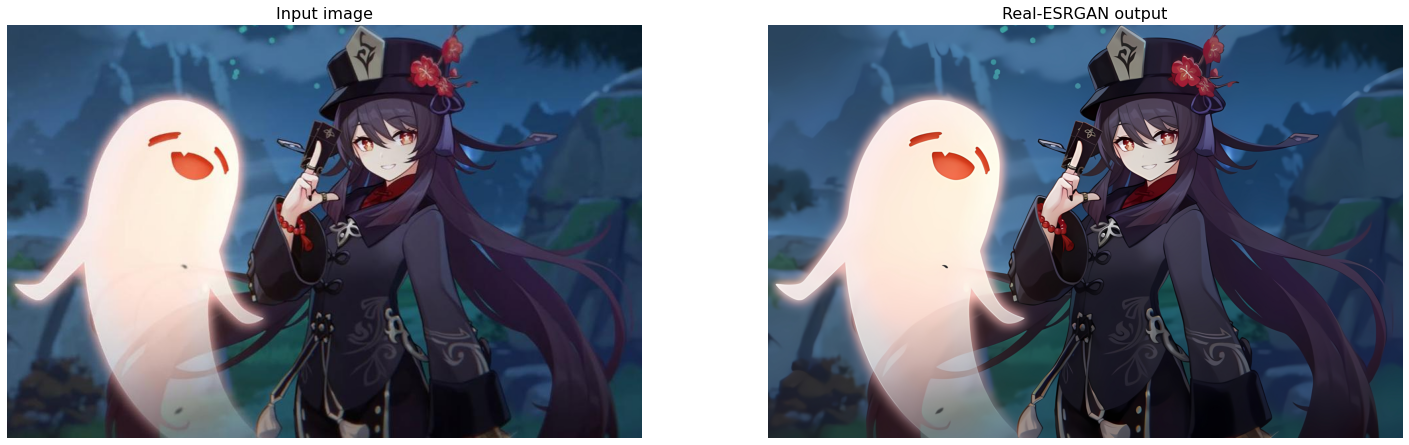

In [4]:
#============================== [FORM] ==============================#
#@markdown ##← [Start] Visualize comparison (optional)
#====================================================================#
#
# Codes below are written by xinntao himself.
# Path variables are of course has been changed.
#
#====================================================================#

working_directory = '/content/Real-ESRGAN'
input_folder = working_directory + '/inputs'
result_folder = working_directory + '/results'

# utils for visualization
import cv2
import matplotlib.pyplot as plt
def display(img1, img2):
  fig = plt.figure(figsize=(25, 10))
  ax1 = fig.add_subplot(1, 2, 1) 
  plt.title('Input image', fontsize=16)
  ax1.axis('off')
  ax2 = fig.add_subplot(1, 2, 2)
  plt.title('Real-ESRGAN output', fontsize=16)
  ax2.axis('off')
  ax1.imshow(img1)
  ax2.imshow(img2)
def imread(img_path):
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img

# display each image in the upload folder
import os
import glob

input_list = sorted(glob.glob(os.path.join(input_folder, '*')))
output_list = sorted(glob.glob(os.path.join(result_folder, '*')))
for input_path, output_path in zip(input_list, output_list):
  img_input = imread(input_path)
  img_output = imread(output_path)
  display(img_input, img_output)

### <font size=6>waifu2xLab</font>

<center><font size=5>GPU runtime is optional, but waifu2x could perform better on GPU.</font></center>

<font size=4>waifu2xLab is a Google Colab implementation of <a href="https://github.com/tsurumeso" target="_blank">tsurumeso</a>'s <a href="https://github.com/tsurumeso/waifu2x-chainer" target="_blank">waifu2x-chainer</a></font>

<center><img src="https://raw.githubusercontent.com/tsurumeso/waifu2x-chainer/master/images/summery.png" height="250" alt="waifu2xLab"></center>

<center><font size=4>2D character picture (Kagamine Rin) is licensed under CC BY-NC by piapro [2].</font></center>

In [ ]:
# ============================= FORM ============================= #
# @markdown <font size=5>← Clone waifu2x-chainer and Install Dependencies</font>
# ================================================================ #

import os
from IPython.display import clear_output


waifu2x_path_1 = "/content/tools/waifu2x"
waifu2x_path_2 = waifu2x_path_1 + "/waifu2x.py"
input_path = "/content/waifu2x/input"
output_path = "/content/waifu2x/output"


if os.path.exists(waifu2x_path_1) and os.path.isdir(waifu2x_path_1) and os.path.exists(waifu2x_path_2) and os.path.isfile(waifu2x_path_2):
    pass
else:
    # Installing the required dependencies
    # !pip install -q cupy-cuda100
    !pip install -q futures
    !pip install -q chainer

    # Cloning waifu2x-chainer from github
    !git clone -l -s https://github.com/tsurumeso/waifu2x-chainer.git /content/tools/waifu2x

    # Creating input and output directory for waifu2x-chainer to work with
    if os.path.exists(input_path) and os.path.exists(output_path):
        pass
    elif not os.path.exists(input_path) and os.path.exists(output_path):
        os.makedirs(input_path)
    elif os.path.exists(input_path) and not os.path.exists(output_path):
        os.makedirs(output_path)
    else:
        os.makedirs(input_path)
        os.makedirs(output_path)

    clear_output()

In [ ]:
# ============================= FORM ============================= #
# @markdown <font size=5>← Upload Image or Get from URL</font>
image_source = "file_upload" #@param ["file_upload", "url"]
url = "" # @param {type:"string"}
# @markdown > For the url, input a direct link to the file. (e.g: <a href="#">https://domain.moe/saber_waifu.jpg</a>)
# ================================================================ #

import os
import IPython
from IPython.display import HTML, clear_output
import google.colab.files


waifu2x_path_1 = "/content/tools/waifu2x"
waifu2x_path_2 = waifu2x_path_1 + "/waifu2x.py"
input_path = "/content/waifu2x/input"
output_path = "/content/waifu2x/output"


def IOFolderCheck():
    if os.path.exists(input_path) and os.path.exists(output_path):
        pass
    elif not os.path.exists(input_path) and os.path.exists(output_path):
        os.makedirs(input_path)
    elif os.path.exists(input_path) and not os.path.exists(output_path):
        os.makedirs(output_path)
    elif not os.path.exists(input_path) and not os.path.exists(output_path):
        os.makedirs(input_path)
        os.makedirs(output_path)


if os.path.exists(waifu2x_path_1) and os.path.isdir(waifu2x_path_1) and os.path.exists(waifu2x_path_2) and os.path.isfile(waifu2x_path_2):
    IOFolderCheck()

    %cd /content/waifu2x/input
    clear_output()


    if image_source == "file_upload":
        uploaded = google.colab.files.upload()
    else:
        if url == "":
            display(HTML("<center><h2 style=\"font-family:Trebuchet MS;color:#ce2121;\">❌ The url field is empty!</h2><br></center>"))
        else:
            !wget -q {url}
            

    %cd /content
    clear_output()
else:
    display(HTML("<center><h2 style=\"font-family:Trebuchet MS;color:#ce2121;\">❌ Unable to locate waifu2x!<br>Make sure you have already run the first cell first!</h2><br></center>"))

In [ ]:
#============================= FORM ============================= #
#@markdown <font size=5>← [Start] waifu2xLab</font>
input = ""  #@param {type:"string"}
#@markdown > If the "input" and "output" fields are empty, waifu2xLab will look for image(s) in "/content/waifu2x/input" and store the processed image(s) into "/content/waifu2x/output".<br>By default, waifu2xLab will process anything inside the "input" folder.</br>To process a single image, type in the absolute path of the file (e.g: /content/downloads/image.jpg).
output = ""  #@param {type:"string"}
#@markdown > If left empty, the default output path will be used: /content/waifu2x/output

#@markdown ---
processor = "CPU" #@param ["CPU", "GPU"]
mode = "De-noise" #@param ["De-noise", "Upscale", "De-noise & Upscale"]
tta = "Disabled" #@param ["Enabled", "Disabled"]
tta_level = "8" #@param ["2", "4", "8"]
# tta_level = 2 #@param {type:"slider", min:2, max:8, step:2}
denoise_level = 0 #@param {type:"slider", min:0, max:3, step:1}
upscale_ratio = 1 #@param {type:"slider", min:1, max:10, step:1}
output_quality = 100 #@param {type:"slider", min:1, max:100, step:1}
color_profile = "RGB" #@param ["RGB", "YUV"]
model = "VGG7" #@param ["VGG7", "UpConv7", "ResNet10", "UpResNet10"]
output_format = "PNG" #@param ["PNG", "WEBP"]
# ================================================================ #

import os
import IPython
from IPython.display import HTML, clear_output
import google.colab.files


waifu2x_path_1 = "/content/tools/waifu2x"
waifu2x_path_2 = waifu2x_path_1 + "/waifu2x.py"
input_path = "/content/waifu2x/input"
output_path = "/content/waifu2x/output"


def IOFolderCheck():
    if os.path.exists(input_path) and os.path.exists(output_path):
        pass
    elif not os.path.exists(input_path) and os.path.exists(output_path):
        os.makedirs(input_path)
    elif os.path.exists(input_path) and not os.path.exists(output_path):
        os.makedirs(output_path)
    elif not os.path.exists(input_path) and not os.path.exists(output_path):
        os.makedirs(input_path)
        os.makedirs(output_path)


# For now, the CPU core is hardcoded to use 4 cores.
# The same goes for GPU, only GPU = 0 will be used.
if processor == "CPU":
    processor = ""
elif processor == "GPU":
    processor = "-g 0"

# Checking for which mode is chosen.
if mode == "De-noise":
    mode = "noise"

    upscale_ratio = 1
elif mode == "Upscale":
    mode = "scale"

    denoise_level = 0
elif mode == "De-noise & Upscale":
    mode = "noise_scale"

# Checking whether TTA is enabled or not.
if tta == "Enabled":
    tta1 = "-t"
    tta2 = "-T"
elif tta == "Disabled":
    tta1 = ""
    tta2 = ""
    tta_level = ""

# Checking for which arch/model is used and convert it into parameter number.
if model == "VGG7":
    model = 0
elif model == "UpConv7":
    model = 1
elif model == "ResNet10":
    model = 2
elif model == "UpResNet10":
    model = 3

# Checking for the chosen color profile and convert it into parameter.
if color_profile == "YUV":
    color_profile = "y"
elif color_profile == "RGB":
    color_profile = "rgb"

# Checking for which output format is chosen and convert it into parameter.
if output_format == "PNG":
    output_format = "png"
elif output_format == "WEBP":
    output_format = "webp"

# Checking whether input and output fields are empty or not
# If they are empty, the default storing path will be used (/content/waifu2x/output/)
if input == "" and output == "":
    input = input_path
    output = output_path
elif input == "" and not output == "":
    input = inpput_path
elif not input == "" and output == "":
    output = output_path


if os.path.exists(waifu2x_path_1) and os.path.isdir(waifu2x_path_1) and os.path.exists(waifu2x_path_2) and os.path.isfile(waifu2x_path_2):
    IOFolderCheck()

    %cd "$waifu2x_path_1"
    clear_output()

    !python waifu2x.py {processor} -m {mode} {tta1} {tta2} {tta_level} -n {denoise_level} -s {upscale_ratio} -c {color_profile} -a {model} -e {output_format} -q {output_quality} -i "{input}" -o "{output}"

    %cd "/content"
    clear_output()
else:
    display(HTML("<center><h2 style=\"font-family:Trebuchet MS;color:#ce2121;\">❌ Unable to locate waifu2x!<br>Make sure you have already run the first cell first!</h2><br></center>"))

## <font size=6>✧ Programming ✧</font>

### <font size=6>Visual Studio Code</font>

In [ ]:
# ============================= FORM ============================= #
# @markdown <p><font size=5px>← [Start] code-server</font></p>
# @markdown <p style="font-size: 6px;">VS Code in the browser. Run VS Code on any machine anywhere and access it in the browser.</p>
# @markdown <hr>
# @markdown <center><h3><font color="#3399ff"><b>⚙️ Install Configuration ⚙️</b></font></h3></center>
TOKEN = "" 
REGION = "AP"
USE_FREE_TOKEN = True #{type:"boolean"}
INSTALL_EXTENSION = "ms-python.python ms-vscode.cpptools ritwickdey.LiveServer sidthesloth.html5-boilerplate tht13.python"  #@param {type:"string"}
USER_DATA_DIR = "/content/tools/code-server/userdata" #@param {type:"string"}
OPEN_FOLDER = "/content/" #@param {type: "string"} 
TAG_NAME = "3.11.1" #@param {type: "string"}
#@markdown > See <a href="https://github.com/cdr/code-server/tags" target="_blank">HERE</a> to get the tag name.
PACKAGES = "amd64" #@param ["x86_64", "amd64"]
RUN_LATEST = True
PORT_FORWARD = "argotunnel" #["ngrok", "localhost", "argotunnel"]
# ================================================================ #

import os,sys, pathlib, zipfile, re, tarfile, shutil
import urllib.request
from IPython.display import HTML, clear_output

HOME = os.path.expanduser("~")

if not os.path.exists(f"{HOME}/.ipython/mixlab.py"):
    hCode = "https://raw.githubusercontent.com/shirooo39/" \
            "MiXLab/master/resources/mixlab.py"
    urllib.request.urlretrieve(hCode, f"{HOME}/.ipython/mixlab.py")

from mixlab import (
    runSh,
    loadingAn,
    PortForward_wrapper,
    findProcess,
    displayUrl,
    findPackageR,
    textAn
)

loadingAn()

os.makedirs('tools/code-server/', exist_ok=True)
os.makedirs('tools/temp', exist_ok=True)
binFile = ''

# Downloading code-server
if not os.path.exists("tools/code-server/README.md"):
    os.system("apt install net-tools -y")

    BASE_URL = r"https://github.com/cdr/code-server/"
    rawRdata = findPackageR("cdr/code-server",
                        f"linux-{PACKAGES}.tar.gz",
                        False if RUN_LATEST else TAG_NAME,
                        all_=True)
    file_name = rawRdata['assets']['name']
    urlF = rawRdata['assets']['browser_download_url']
    output_file = "tools/temp/code-server.tar.gz"

    textAn(f"Installing code-server {rawRdata['tag_name']} ...", ty="twg")
  
    urllib.request.urlretrieve(urlF, output_file)
    with tarfile.open(output_file, 'r:gz') as tar_ref:
        tar_ref.extractall('tools/temp/')
    os.renames("tools/temp/"+file_name[:-7], 'tools/code-server/')
    try:
        pathlib.Path(output_file).unlink()
    except FileNotFoundError:
        pass
    try:
        os.remove('tools/code-server/lib/libstdc++.so.6')
    except FileNotFoundError:
        pass
  
    binList = ['bin/code-server',
               'code-server']
    for b in binList:
        if os.path.exists('tools/code-server/'+b):
            binFile = b
            break
      
    # workspace settings
    configScript = """{
    "workbench.colorTheme": "Default Dark+",
    "editor.minimap.enabled": false
}
"""
    os.makedirs(f'{OPEN_FOLDER}/.vscode', exist_ok=True)
    with open(f'{OPEN_FOLDER}/.vscode/settings.json', 'w') as w:w.write(configScript)

    if INSTALL_EXTENSION:
        perExtension = INSTALL_EXTENSION.split(' ')
        for l in perExtension:
            cmdE = f"./{binFile} " \
            f"--user-data-dir {USER_DATA_DIR}" \
            f" --install-extension {l}"
            runSh(cmdE, cd="tools/code-server", shell=True)


if not findProcess("node", "--extensions-dir"):
    cmdDo = f"./{binFile} --auth none " \
        f" --port 5050 --user-data-dir {USER_DATA_DIR}" \
        " &"
    runSh(cmdDo, 
        cd="tools/code-server",
        shell=True)

clear_output()

server = PortForward_wrapper(
    PORT_FORWARD, TOKEN, USE_FREE_TOKEN, [['code-server', 5050, 'http']], REGION.lower(), 
    [f"{HOME}/.ngrok2/code-server.yml", 30499]
).start('code-server', displayB=False)
displayUrl(server, EcUrl=f"/?folder={OPEN_FOLDER}")

In [ ]:
# ============================= FORM ============================= #
# @markdown <p><font size=5px>← Port Forwarding</font></p>
# @markdown <p><font size=4px>Type in whatever PORT you want and separate them with comma and space. `80, 8080, 4040`</font></p>
USE_FREE_TOKEN = True 
TOKEN = "" 
REGION = "US" #["US", "EU", "AP", "AU", "SA", "JP", "IN"]
PORT_LIST = "" #@param {type:"string"}
PORT_FORWARD = "argotunnel" #["ngrok", "localhost", "argotunnel"]
# ================================================================ #

import os, pathlib, zipfile, re
import urllib.request
from IPython.display import HTML, clear_output

HOME = os.path.expanduser("~")

if not os.path.exists(f"{HOME}/.ipython/mixlab.py"):
    hCode = "https://raw.githubusercontent.com/shirooo39/" \
            "MiXLab/master/resources/mixlab.py"
    urllib.request.urlretrieve(hCode, f"{HOME}/.ipython/mixlab.py")

from mixlab import (
    runSh,
    loadingAn,
    PortForward_wrapper,
    findProcess,
    displayUrl,
    textAn
)

loadingAn()

os.makedirs('tools/', exist_ok=True)

clear_output()

m = []
splitPortList = PORT_LIST.split(',')
for p in splitPortList:
    p = int(p)
    m.append([f"s{p}", p, 'http'])

Server = PortForward_wrapper(
    PORT_FORWARD, TOKEN, USE_FREE_TOKEN, m, REGION.lower(), 
    [f"{HOME}/.ngrok2/randomPortOpen.yml", 45535]
)

for l in m:
    displayUrl(Server.start(l[0], displayB=False, v=False), 
    pNamU=f"{l[0][1:]} -> ", cls=False)

## <font size=6>✧ Remote Connection ✧</font>

<font size=6 color=red><center>**!! NOT FOR CRYPTOCURRENCY MINING !!**</center></font>

### <font size=6>Chrome Remote Desktop</font>

<font eize=5>Original code written by <a href="https://github.com/PradyumnaKrishna/Colab-Hacks/tree/master/Colab%20RDP" target="_blank">PradyumnaKrishna</a></font> (modified for MiXLab use)

In [ ]:
# ============================= FORM ============================= #
# @markdown <font size=5>← Create user</font>
username = "MiXLab" #@param {type:"string"}
password = "123456qwerty" #@param {type:"string"}
# ================================================================ #

import os

print("Creating user and setting it up...")

# Creation of user
os.system(f"useradd -m {username}")

# Add user to sudo group
os.system(f"adduser {username} sudo")
    
# Set password of user to 'root'
os.system(f"echo '{username}:{password}' | sudo chpasswd")

# Change default shell from sh to bash
os.system("sed -i 's/\/bin\/sh/\/bin\/bash/g' /etc/passwd")

print("User created and configured.")

In [ ]:
#============================= FORM ============================= #
#@markdown <font size=5>← [Start] Remote Desktop</font>
#@markdown <ol>
#@markdown 	<li>Click <a href="http://remotedesktop.google.com/headless" target="_blank">HERE</a> (opens in new tab) and set up a computer first.</li>
#@markdown 	<li>After you have done setting up a computer, get the Debian Linux command / authcode and paste it into the field below.</li>
#@markdown 	<li>Run the cell and wait for it to finish.</li>
#@markdown 	<li>Now, go to <a href="http://remotedesktop.google.com/access" target="_blank">HERE</a> (opens in new tab) and you should see a machine pops up in there.</li>
#@markdown 	<li>Click on that machine to remote it and enter the pin.</li>
#@markdown </ol> 
CRP = "" #@param {type:"string"}

#@markdown Enter a PIN that is equal to or more than 6 digits
Pin = 123456 #@param {type: "integer"}

#@markdown > It takes about 4 to 5 minutes for the installation process.
#================================================================ #

import os
import subprocess


class CRD:
    def __init__(self):
        os.system("apt update")
        self.installCRD()
        self.installDesktopEnvironment()
        self.installGoogleChorme()
        self.finish()

    @staticmethod
    def installCRD():
        print("Installing Chrome Remote Desktop...")
        subprocess.run(['wget', 'https://dl.google.com/linux/direct/chrome-remote-desktop_current_amd64.deb'], stdout=subprocess.PIPE)
        subprocess.run(['dpkg', '--install', 'chrome-remote-desktop_current_amd64.deb'], stdout=subprocess.PIPE)
        subprocess.run(['apt', 'install', '--assume-yes', '--fix-broken'], stdout=subprocess.PIPE)

    @staticmethod
    def installDesktopEnvironment():
        print("Installing Desktop Environment...")
        os.system("export DEBIAN_FRONTEND=noninteractive")
        os.system("apt install --assume-yes xfce4 desktop-base xfce4-terminal")
        os.system("bash -c 'echo \"exec /etc/X11/Xsession /usr/bin/xfce4-session\" > /etc/chrome-remote-desktop-session'")
        os.system("apt remove --assume-yes gnome-terminal")
        os.system("apt install --assume-yes xscreensaver")
        os.system("systemctl disable lightdm.service")

    @staticmethod
    def installGoogleChorme():
        print("Installing Google Chrome...")
        subprocess.run(["wget", "https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb"], stdout=subprocess.PIPE)
        subprocess.run(["dpkg", "--install", "google-chrome-stable_current_amd64.deb"], stdout=subprocess.PIPE)
        subprocess.run(['apt', 'install', '--assume-yes', '--fix-broken'], stdout=subprocess.PIPE)

    @staticmethod
    def finish():
        print("Finalizing...")
        os.system(f"adduser {username} chrome-remote-desktop")
        command = f"{CRP} --pin={Pin}"
        os.system(f"su - {username} -c '{command}'")
        os.system("service chrome-remote-desktop start")
        print("Finished Succesfully!")


try:
    if username:
        if CRP == "":
            print("Please enter the authcode from the Chrome Remote Desktop site!")
        elif len(str(Pin)) < 6:
            print("Enter a PIN that is equal to or more than 6 digits!")
        else:
            CRD()
except NameError as e:
    print("Username variable not found! Create a user first!")

#### <font size=6>Optionals</font>

In [ ]:
#@title **Google Drive Mount**
#@markdown Google Drive used as Persistance HDD for files.<br>
#@markdown Mounted at `user` Home directory inside drive folder
#@markdown (If `username` variable not defined then use root as default).

def MountGDrive():
    from google.colab import drive

    ! runuser -l $user -c "yes | python3 -m pip install --user google-colab"  > /dev/null 2>&1

    mount = """from os import environ as env
from google.colab import drive

env['CLOUDSDK_CONFIG']  = '/content/.config'
drive.mount('{}')""".format(mountpoint)

    with open('/content/mount.py', 'w') as script:
        script.write(mount)

    ! runuser -l $user -c "python3 /content/mount.py"

try:
    if username:
        mountpoint = "/home/"+username+"/drive"
        user = username
except NameError:
    print("username variable not found, mounting at `/content/drive' using `root'")
    mountpoint = '/content/drive'
    user = 'root'

MountGDrive()

In [ ]:
#@title **SSH**

! pip install colab_ssh --upgrade &> /dev/null

Ngrok = False #@param {type:'boolean'}
Agro = False #@param {type:'boolean'}


#@markdown Copy authtoken from https://dashboard.ngrok.com/auth (only for ngrok)
ngrokToken = "" #@param {type:'string'}


def runNGROK():
    from colab_ssh import launch_ssh
    from IPython.display import clear_output
    launch_ssh(ngrokToken, password)
    clear_output()

    print("ssh", username, end='@')
    ! curl -s http://localhost:4040/api/tunnels | python3 -c \
            "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'][6:].replace(':', ' -p '))"


def runAgro():
    from colab_ssh import launch_ssh_cloudflared
    launch_ssh_cloudflared(password=password)


try:
    if username:
        pass
    elif password:
        pass
except NameError:
    print("No user found using username and password as 'root'")
    username='root'
    password='root'


if Agro and Ngrok:
    print("You can't do that")
    print("Select only one of them")
elif Agro:
    runAgro()
elif Ngrok:
    if ngrokToken == "":
        print("No ngrokToken Found, Please enter it")
    else:
        runNGROK()
else:
    print("Select one of them")

In [ ]:
#@title Package Installer { vertical-output: true }
run = False #@param {type:"boolean"}
#@markdown *Package management actions (gasp)*
action = "Install" #@param ["Install", "Check Installed", "Remove"] {allow-input: true}

package = "wget" #@param {type:"string"}
system = "apt" #@param ["apt", ""]

def install(package=package, system=system):
  if system == "apt":
    !apt --fix-broken install > /dev/null 2>&1
    !killall apt > /dev/null 2>&1
    !rm /var/lib/dpkg/lock-frontend
    !dpkg --configure -a > /dev/null 2>&1

    !apt-get  install -o Dpkg::Options::="--force-confold" --no-install-recommends -y $package
    
    !dpkg --configure -a > /dev/null 2>&1 
    !apt  update > /dev/null 2>&1

    !apt install $package > /dev/null 2>&1

def check_installed(package=package, system=system):
  if system == "apt":
    !apt list --installed | grep $package

def remove(package=package, system=system):
  if system == "apt":
    !apt remove $package

if run:
  if action == "Install":
    install()
  if action == "Check Installed":
    check_installed()
  if action == "Remove":
    remove()

In [ ]:
#@title **Colab Shutdown**

#@markdown To Kill NGROK Tunnel
NGROK = False #@param {type:'boolean'}

#@markdown To Unmount GDrive
GDrive = False #@param {type:'boolean'}

#@markdown To Sleep Colab
Sleep = True #@param {type:'boolean'}

if NGROK:
    ! killall ngrok

if GDrive:
    with open('/content/unmount.py', 'w') as unmount:
        unmount.write("""from google.colab import drive
drive.flush_and_unmount()""")
    
    try:
        if user:
            ! runuser $user -c 'python3 /content/unmount.py'
    except NameError:
        print("Google Drive not Mounted")

if Sleep:
    from time import sleep
    sleep(43200)

### <img src="https://img.icons8.com/ios/50/000000/remote-desktop.png" height="45" align="left" alt=""/><font size=6>IceMW + noVNC</font>

In [ ]:
# ============================= FORM ============================= #
# @markdown <font size=5>← [Start] IceWM</font>
USE_FREE_TOKEN = True
TOKEN = ""
REGION = "US"
Tunneling = "argo_tunnel_(cloudflare)" #@param ["argo_tunnel_(cloudflare)", "localhost.run", "ngrok"]

if Tunneling == "argo_tunnel_(cloudflare)":
    PORT_FORWARD = "argotunnel"
elif Tunneling == "localhost.run":
    PORT_FORWARD = "localhost"
elif Tunneling == "ngrok":
    PORT_FORWARD = "ngrok"
# ================================================================ #

import os, random, string, urllib.request, time
from IPython.display import HTML, clear_output

HOME = os.path.expanduser("~")
runW = get_ipython()

if not os.path.exists(f"{HOME}/.ipython/mixlab.py"):
    hCode = "https://raw.githubusercontent.com/shirooo39/" \
            "MiXLab/master/resources/mixlab.py"
    urllib.request.urlretrieve(hCode, f"{HOME}/.ipython/mixlab.py")

from mixlab import (
    runSh,
    loadingAn,
    PortForward_wrapper,
    displayUrl,
    findProcess,
    CWD,
    textAn,
)

# Defining Github latest tag so the code can fetch the latest release, if there is any
def latestTag(link):
    import re
    from urllib.request import urlopen
    htmlF = urlopen(link+"/releases/latest").read().decode('UTF-8')
    return re.findall(r'.+\/tag\/([.0-9A-Za-z]+)".+/', htmlF)[0]


loadingAn()

os.makedirs("tools/noVnc", exist_ok=True)

# Generating the password
try:
    print(f"Found old password! : {password}")
except:
    password = ''.join(random.choice(string.ascii_letters + string.digits) for i in range(20))

clear_output()

if not findProcess("Xtightvnc", ":1"):
    textAn("Please wait while noVNC is being prepared...")
    os.makedirs(f'{HOME}/.vnc', exist_ok=True)
    runW.system_raw('apt update -y')
    runW.system_raw('apt install -y icewm firefox tightvncserver autocutsel xterm')
    runW.system_raw(rf'echo "{password}" | vncpasswd -f > ~/.vnc/passwd')
    data = """
#!/bin/bash
xrdb $HOME/.Xresources
xsetroot -solid black -cursor_name left_ptr
autocutsel -fork
icewm-session &
"""
    with open(f'{HOME}/.vnc/xstartup', 'w+') as wNow: wNow.write(data)
    os.chmod(f'{HOME}/.vnc/xstartup', 0o755)
    os.chmod(f'{HOME}/.vnc/passwd', 0o400)
  
    runSh('sudo vncserver :1 -geometry 1440x870 -economictranslate -dontdisconnect &', shell=True)

    BASE_URL = "https://github.com/geek1011/easy-novnc"
    LATEST_TAG = latestTag(BASE_URL)
    output_file = "tools/noVnc/easy-noVnc_linux-64bit"
    file_name = f"easy-novnc_linux-64bit"
    urlF = f"{BASE_URL}/releases/download/{LATEST_TAG}/{file_name}"

    try:
        urllib.request.urlretrieve(urlF, output_file)
    except OSError:
        pass

    os.chmod(output_file, 0o755)

if not findProcess("easy-noVnc_linux-64bit", '--addr "0.0.0.0:6080"'):
    cmdDo = "./easy-noVnc_linux-64bit --addr 0.0.0.0:6080 --port 5901" \
            " &"
    runSh(cmdDo, cd="tools/noVnc/", shell=True)

clear_output()

Server = PortForward_wrapper(PORT_FORWARD, TOKEN, USE_FREE_TOKEN, [['vnc', 6080, 'http']], REGION.lower, [f"{HOME}/.ngrok2/noVNC.yml", 4455])
data = Server.start('vnc', displayB=False)
displayUrl(data, pNamU='noVnc : ', EcUrl=f'/vnc.html?autoconnect=true&password={password}&path=vnc&resize=scale&reconnect=true&show_dot=true')

### <img src="https://www.nomachine.com/NMLogo.png" height="45" align="left" alt=""/><font size=6>NoMachine</font>

In [ ]:
# ============================= FORM ============================= #
# @markdown <font size=5>← [Start] NoMachine</font>
USE_FREE_TOKEN = False
TOKEN = ""  # @param {type:"string"}
REGION = "US"
PORT_FORWARD = "ngrok"
# @markdown > You would need to provide your own ngrok Authtoken.</br>Click <a href="https://dashboard.ngrok.com/signup" target="_blank">here</a> to register for a free ngrok account.</br>Click <a href="https://dashboard.ngrok.com/auth/your-authtoken" target="_blank">here</a> to copy your ngrok Authtoken.</br>Click <a href="https://www.nomachine.com/download" target="_blank">here</a> to download NoMachine.
# ================================================================ #

import os
import tarfile
import urllib.request
import shutil
import time
from IPython.display import HTML, clear_output
from subprocess import Popen

APT_INSTALL = "apt install -y "
HOME = os.path.expanduser("~")
runW = get_ipython()

if not os.path.exists(f"{HOME}/.ipython/mixlab.py"):
    hCode = "https://raw.githubusercontent.com/shirooo39/" \
                "MiXLab/master/resources/mixlab.py"
    urllib.request.urlretrieve(hCode, f"{HOME}/.ipython/mixlab.py")

from mixlab import (
    runSh,
    loadingAn,
    PortForward_wrapper,
    findProcess,
    textAn,
    displayUrl
)

loadingAn()

os.makedirs("tools/nomachine", exist_ok=True)
os.makedirs("/root/.icewm", exist_ok=True)

# password ganarate
try:
  print(f"Found the old password! : {password}")
except:
  password = 'nomachine'

clear_output()

start = time.time()
if not os.path.exists("tools/nomachine/NX/bin/nxserver"):
  textAn("Please wait while noMachine is being prepared...")

  runW.system_raw('apt update --quiet --force-yes')

  # Minimal install 
  runW.system_raw(
      'apt install --quiet --force-yes --no-install-recommends \
      icewm x11-xserver-utils firefox xterm pcmanfm')

  # icewm theme
  with open('/root/.icewm/theme', 'w') as w:
    w.write('Theme="NanoBlue/default.theme"')
  
  # with open('/root/.icewm/toolbar', 'w') as w:
  #   w.write('prog "chromium" ! chromium-browser --no-sandbox')

  # nomachine
  
  staticUrl = "https://raw.githubusercontent.com/shirooo39/MiXLab/master/resources/packages/nomachine/nomachine_6.9.2_1_x86_64.tar.gz"
  configUrl = "https://raw.githubusercontent.com/shirooo39/MiXLab/master/resources/packages/nomachine/NXetc.tar.gz"
  
  output_file = 'tools/nomachine/nm.tar.gz'
  config_file = 'tools/nomachine/etc.tar.gz'
  urllib.request.urlretrieve(staticUrl, output_file)
  urllib.request.urlretrieve(configUrl, config_file)
  
  with tarfile.open(output_file, 'r:gz') as t:t.extractall('tools/nomachine')
  runSh('./nxserver --install', cd='tools/nomachine/NX', shell=True)
  runSh('./nxserver --stop', cd='tools/nomachine/NX/bin', shell=True)
  
  shutil.rmtree('tools/nomachine/NX/etc')
  with tarfile.open(config_file, 'r:gz') as t:t.extractall('tools/nomachine/NX')
  os.remove(config_file)
  
  os.remove(output_file)
  runSh('./nxserver --startup', cd='tools/nomachine/NX/bin', shell=True)
  runW.system_raw("echo root:$password | chpasswd")

end = time.time()

Server = PortForward_wrapper(PORT_FORWARD, TOKEN, USE_FREE_TOKEN, [['nomachine', 4000, 'tcp']], REGION.lower(), [f"{HOME}/.ngrok2/nomachine.yml", 8459])

data = Server.start('nomachine', displayB=False)
host, port = data['url'][7:].split(':')
user = os.popen('whoami').read()

# Colors
bttxt = 'hsla(10, 50%, 85%, 1)'
btcolor = 'hsla(10, 86%, 56%, 1)'
btshado = 'hsla(10, 40%, 52%, .4)'

clear_output()

display(HTML("""<style>@import url('https://fonts.googleapis.com/css?family=Source+Code+Pro:200,900');  :root {   --text-color: """+bttxt+""";   --shadow-color: """+btshado+""";   --btn-color: """+btcolor+""";   --bg-color: #141218; }  * {   box-sizing: border-box; } button { position:relative; padding: 10px 20px;     border: none;   background: none;      font-family: "Source Code Pro";   font-weight: 900;font-size: 100%;     color: var(--text-color);      background-color: var(--btn-color);   box-shadow: var(--shadow-color) 2px 2px 22px;   border-radius: 4px;    z-index: 0;overflow: hidden; -webkit-user-select: text;-moz-user-select: text;-ms-user-select: text;user-select: text;}  button:focus {   outline-color: transparent;   box-shadow: var(--btn-color) 2px 2px 22px; }  .right::after, button::after {   content: var(--content);   display: block;   position: absolute;   white-space: nowrap;   padding: 40px 40px;   pointer-events:none; }  button::after{   font-weight: 200;   top: -30px;   left: -20px; }   .right, .left {   position: absolute;   width: 100%;   height: 100%;   top: 0; } .right {   left: 66%; } .left {   right: 66%; } .right::after {   top: -30px;   left: calc(-66% - 20px);      background-color: var(--bg-color);   color:transparent;   transition: transform .4s ease-out;   transform: translate(0, -90%) rotate(0deg) }  button:hover .right::after {   transform: translate(0, -47%) rotate(0deg) }  button .right:hover::after {   transform: translate(0, -50%) rotate(-7deg) }  button .left:hover ~ .right::after {   transform: translate(0, -50%) rotate(7deg) }  /* bubbles */ button::before {   content: '';   pointer-events: none;   opacity: .6;   background:     radial-gradient(circle at 20% 35%,  transparent 0,  transparent 2px, var(--text-color) 3px, var(--text-color) 4px, transparent 4px),     radial-gradient(circle at 75% 44%, transparent 0,  transparent 2px, var(--text-color) 3px, var(--text-color) 4px, transparent 4px),     radial-gradient(circle at 46% 52%, transparent 0, transparent 4px, var(--text-color) 5px, var(--text-color) 6px, transparent 6px);    width: 100%;   height: 300%;   top: 0;   left: 0;   position: absolute;   animation: bubbles 5s linear infinite both; }  @keyframes bubbles {   from {     transform: translate();   }   to {     transform: translate(0, -66.666%);   } }.zui-table {    border: solid 1px #DDEEEE;    border-collapse: collapse;    border-spacing: 0;    font: normal 13px;}.zui-table thead th {    background-color: #DDEFEF;    border: solid 1px #DDEEEE;    color: #0000009e;    padding: 10px;    text-align: left;}.zui-table tbody td {border: solid 1px #effff97a;color: #ffffffd1;    padding: 10px;}</style><center><button><table class="zui-table blueBG"><p>NoMachine Configuration<p><thead>        <tr><th>Username</th> <th>Password</th><th>Protocol</th>            <th>Host</th>            <th>Port</th>        </tr>    </thead>    <tbody>        <tr><td>"""+user+"""</td><td>"""+password+"""</td><td>NX</td><td>"""+host+"""</td><td>"""+port+"""</td></tr></tbody></table>Click <a target="_blank" style="text-decoration: none;color: hsla(210, 50%, 85%, 1);font-size: 10px;" href="https://raw.githubusercontent.com/biplobsd/OneClickRun/master/img/NoMachine.gif">HERE</a> to see how to use the configuration.</button><center>"""))

### <img src="https://img.icons8.com/ios/50/000000/ssh.png" height="45" align="left" alt=""/><font size=6>SSH + noVNC</font>

In [ ]:
# ============================= FORM ============================= #
# @markdown <font size=5>← [Start] SSH</font>
CREATE_VNC = True #@param {type:"boolean"}
CREATE_SSH = True #@param {type:"boolean"}
USE_FREE_TOKEN = True
TOKEN = ""
#TOKEN = "" #@param {type:"string"}
Tunneling = "argo_tunnel_(cloudflare)" #@param ["argo_tunnel_(cloudflare)", "localhost.run", "ngrok"]

if Tunneling == "argo_tunnel_(cloudflare)":
    PORT_FORWARD = "argotunnel"
elif Tunneling == "localhost.run":
    PORT_FORWARD = "localhost"
elif Tunneling == "ngrok":
    PORT_FORWARD = "ngrok"
# ================================================================ #

import os, random, string, urllib.request, time
from IPython.display import HTML, clear_output

HOME = os.path.expanduser("~")
runW = get_ipython()

if not os.path.exists(f"{HOME}/.ipython/mixlab.py"):
    hCode = "https://raw.githubusercontent.com/shirooo39/" \
                "MiXLab/master/resources/mixlab.py"
    urllib.request.urlretrieve(hCode, f"{HOME}/.ipython/mixlab.py")

from mixlab import (
    runSh,
    loadingAn,
    PortForward_wrapper,
    displayUrl,
    findProcess,
    CWD,
    textAn,
)

loadingAn()

# Generating password
try:
    print(f"Found the old password! : {password}")
except:
    password = ''.join(random.choice(string.ascii_letters + string.digits) for i in range(20))

if CREATE_SSH:
    USE_FREE_TOKEN = False

# Setting up the root password
if CREATE_SSH  and os.path.exists('/var/run/sshd') == False:
    # Setting up the SSH Daemon
    runSh('apt install -qq -o=Dpkg::Use-Pty=0 openssh-server pwgen')
    runW.system_raw("echo root:$password | chpasswd")
    os.makedirs("/var/run/sshd", exist_ok=True)
    runW.system_raw('echo "PermitRootLogin yes" >> /etc/ssh/sshd_config')
    runW.system_raw('echo "PasswordAuthentication yes" >> /etc/ssh/sshd_config')
    runW.system_raw('echo "LD_LIBRARY_PATH=/usr/lib64-nvidia" >> /root/.bashrc')
    runW.system_raw('echo "export LD_LIBRARY_PATH" >> /root/.bashrc')

    # Running the SSH Daemon
    if not findProcess("/usr/sbin/sshd", command="-D"):
        runSh('/usr/sbin/sshd -D &', shell=True)

clear_output()

if CREATE_VNC:
    # Start = time.time()
    textAn("Please wait while noVNC is being prepared...")
    os.makedirs(f'{HOME}/.vnc', exist_ok=True)
    runW.system_raw('add-apt-repository -y ppa:apt-fast/stable < /dev/null')
    runW.system_raw('echo debconf apt-fast/maxdownloads string 16 | debconf-set-selections')
    runW.system_raw('echo debconf apt-fast/dlflag boolean true | debconf-set-selections')
    runW.system_raw('echo debconf apt-fast/aptmanager string apt-get | debconf-set-selections')
    runW.system_raw('apt install -y apt-fast')
    runW.system_raw('apt-fast install -y xfce4 xfce4-goodies firefox tightvncserver autocutsel')
    runW.system_raw(rf'echo "{password}" | vncpasswd -f > ~/.vnc/passwd')
    data = """
#!/bin/bash
xrdb $HOME/.Xresources
autocutsel -fork
startxfce4 &
"""
    with open(f'{HOME}/.vnc/xstartup', 'w+') as wNow: wNow.write(data)
    os.chmod(f'{HOME}/.vnc/xstartup', 0o755)
    os.chmod(f'{HOME}/.vnc/passwd', 0o400)
    runSh('sudo vncserver &', shell=True)
    runSh(f'git clone https://github.com/novnc/noVNC.git {CWD}/noVNC')
    runSh("bash noVNC/utils/launch.sh --listen 6080 --vnc localhost:5901 &", shell=True)
    # End = time.time()

Server = PortForward_wrapper(PORT_FORWARD, TOKEN, USE_FREE_TOKEN, [['ssh', 22, 'tcp'], ['vnc', 6080, 'http']], REGION.lower, [f"{HOME}/.ngrok2/noVNC_SSH.yml", 4455])
data = Server.start('ssh', displayB=False)

clear_output()

Host,port = data['url'][7:].split(':')
data2 = Server.start('vnc', displayB=False)

if CREATE_VNC:
    displayUrl(data2, pNamU='noVnc : ', EcUrl=f'/vnc.html?autoconnect=true&password={password}')
if CREATE_SSH:
    display(HTML("""<style>@import url('https://fonts.googleapis.com/css?family=Source+Code+Pro:200,900');  :root {   --text-color: hsla(210, 50%, 85%, 1);   --shadow-color: hsla(210, 40%, 52%, .4);   --btn-color: hsl(210, 80%, 42%);   --bg-color: #141218; }  * {   box-sizing: border-box; } button { position:relative; padding: 10px 20px;     border: none;   background: none;      font-family: "Source Code Pro";   font-weight: 900;font-size: 100%;     color: var(--text-color);      background-color: var(--btn-color);   box-shadow: var(--shadow-color) 2px 2px 22px;   border-radius: 4px;    z-index: 0;overflow: hidden; -webkit-user-select: text;-moz-user-select: text;-ms-user-select: text;user-select: text;}  button:focus {   outline-color: transparent;   box-shadow: var(--btn-color) 2px 2px 22px; }  .right::after, button::after {   content: var(--content);   display: block;   position: absolute;   white-space: nowrap;   padding: 40px 40px;   pointer-events:none; }  button::after{   font-weight: 200;   top: -30px;   left: -20px; }   .right, .left {   position: absolute;   width: 100%;   height: 100%;   top: 0; } .right {   left: 66%; } .left {   right: 66%; } .right::after {   top: -30px;   left: calc(-66% - 20px);      background-color: var(--bg-color);   color:transparent;   transition: transform .4s ease-out;   transform: translate(0, -90%) rotate(0deg) }  button:hover .right::after {   transform: translate(0, -47%) rotate(0deg) }  button .right:hover::after {   transform: translate(0, -50%) rotate(-7deg) }  button .left:hover ~ .right::after {   transform: translate(0, -50%) rotate(7deg) }  /* bubbles */ button::before {   content: '';   pointer-events: none;   opacity: .6;   background:     radial-gradient(circle at 20% 35%,  transparent 0,  transparent 2px, var(--text-color) 3px, var(--text-color) 4px, transparent 4px),     radial-gradient(circle at 75% 44%, transparent 0,  transparent 2px, var(--text-color) 3px, var(--text-color) 4px, transparent 4px),     radial-gradient(circle at 46% 52%, transparent 0, transparent 4px, var(--text-color) 5px, var(--text-color) 6px, transparent 6px);    width: 100%;   height: 300%;   top: 0;   left: 0;   position: absolute;   animation: bubbles 5s linear infinite both; }  @keyframes bubbles {   from {     transform: translate();   }   to {     transform: translate(0, -66.666%);   } }.zui-table {    border: solid 1px #DDEEEE;    border-collapse: collapse;    border-spacing: 0;    font: normal 13px;}.zui-table thead th {    background-color: #DDEFEF;    border: solid 1px #DDEEEE;    color: #0000009e;    padding: 10px;    text-align: left;}.zui-table tbody td {border: solid 1px #effff97a;color: #ffffffd1;    padding: 10px;}</style><center><button><table class="zui-table blueBG"><p>SSH Configuration<p><thead>        <tr>        <th>Host</th>            <th>Port</th>        <th>Password</th> </tr>    </thead>    <tbody>        <tr><td>"""+Host+"""</td><td>"""+port+"""</td><td>"""+password+"""</td></tr></tbody></table><center><br><table class="zui-table blueBG"><thead>        <tr> <th></th>       <th>Simple SSH Commands</th></tr>    </thead>    <tbody>        <tr><td>Terminal connect</td><td>ssh root@"""+Host+""" -p """+port+"""</td></tr><tr><td>SOCKS5 proxy</td><td>ssh -D 8282 -q -C -N root@"""+Host+""" -p """+port+"""</td></tr></tbody></table></center><p>Click <a target="_blank" style="text-decoration: none;color: hsla(210, 50%, 85%, 1);font-size: 10px;" href="https://raw.githubusercontent.com/biplobsd/OneClickRun/master/img/sshPreview.gif">HERE</a> to see how to use the configuration.</p></button><center>"""))

### <img src="https://img.icons8.com/ios/50/000000/console.png" height="45" align="left" alt=""/><font size=6>WeTTY</font>

In [ ]:
# ============================= FORM ============================= #
# @markdown <font size=6>← [Start] WeTTY</font>
# @markdown Terminal access in browser over HTTP / HTTPS.
USE_FREE_TOKEN = True
TOKEN = ""
REGION = "US"
Tunneling = "argo_tunnel_(cloudflare)" #@param ["argo_tunnel_(cloudflare)", "localhost.run", "ngrok"]

if Tunneling == "argo_tunnel_(cloudflare)":
    PORT_FORWARD = "argotunnel"
elif Tunneling == "localhost.run":
    PORT_FORWARD = "localhost"
elif Tunneling == "ngrok":
    PORT_FORWARD = "ngrok"
# ================================================================ #

import os, tarfile, urllib.request
from IPython.display import clear_output
from subprocess import Popen

HOME = os.path.expanduser("~")

if not os.path.exists(f"{HOME}/.ipython/mixlab.py"):
    hCode = "https://raw.githubusercontent.com/shirooo39/" \
            "MiXLab/master/resources/mixlab.py"
    urllib.request.urlretrieve(hCode, f"{HOME}/.ipython/mixlab.py")

from mixlab import (
    loadingAn,
    PortForward_wrapper,
    findProcess,
    displayUrl
)

loadingAn()
os.makedirs('tools/temp', exist_ok=True)

if not os.path.exists("tools/wetty/wetty"):
    # Build WeTTy from source
    #  os.system("git clone https://github.com/butlerx/wetty.git tools/wetty")
    #  Popen('npm install'.split(), cwd='tools/wetty').wait()
    #  Popen('npm run-script build'.split(), cwd='tools/wetty').wait()
    #  Popen('npm i -g'.split(), cwd='tools/wetty').wait()
    # --------------------------------------------------
    # Download a pre-built WeTTy package from github
    wettyBF = 'https://raw.githubusercontent.com/shirooo39/MiXLab/master/resources/packages/wetty/wetty.tar.gz'
    fileSN = 'tools/temp/wetty.tar.gz'
    urllib.request.urlretrieve(wettyBF, fileSN)
    with tarfile.open(fileSN, 'r:gz') as t:t.extractall('tools/')
    os.remove(fileSN)

if not findProcess("wetty", "--port"):
#    Popen(
#        r'wetty --port 4343 --bypasshelmet \
#        -b "/" -c "/bin/bash"'.split(), 
#        cwd='/content')
    Popen(
        r'tools/wetty/wetty --port 4343 --bypasshelmet \
        -b "/" -c "/bin/bash"'.split(), 
        cwd='/content')

clear_output()

server = PortForward_wrapper(PORT_FORWARD, TOKEN, USE_FREE_TOKEN, [['wetty', '4343', 'http']], REGION.lower, [f"{HOME}/.ngrok2/wetty.yml", 31199]).start('wetty', displayB=True)
displayUrl(server, pNamU='WeTTy : ')

## <font size=6>✧ System Tools ✧</font>

### <img src="https://nicolargo.github.io/glances/public/images/glances.png" height="45" align="left"/><font size=6>Glances</font>

In [ ]:
# ============================= FORM ============================= #
# @markdown <font size=5>← [Start] Glances</font>
# @markdown <p>Glances is a cross-platform system monitoring tool written in Python.</p>
USE_FREE_TOKEN = True
TOKEN = ""
REGION = "US"
Tunneling = "argo_tunnel_(cloudflare)" #@param ["argo_tunnel_(cloudflare)", "localhost.run", "ngrok"]

if Tunneling == "argo_tunnel_(cloudflare)":
    PORT_FORWARD = "argotunnel"
elif Tunneling == "localhost.run":
    PORT_FORWARD = "localhost"
elif Tunneling == "ngrok":
    PORT_FORWARD = "ngrok"
# ================================================================ #

import os, urllib.request
from IPython.display import clear_output
from subprocess import Popen

HOME = os.path.expanduser("~")

if not os.path.exists(f"{HOME}/.ipython/mixlab.py"):
    hCode = "https://raw.githubusercontent.com/shirooo39/" \
            "MiXLab/master/resources/mixlab.py"
    urllib.request.urlretrieve(hCode, f"{HOME}/.ipython/mixlab.py")

from mixlab import (
    loadingAn,
    PortForward_wrapper,
    findProcess,
    displayUrl
)

loadingAn()

if not os.path.exists("/usr/local/bin/glances"):
    os.system("pip3 install https://github.com/nicolargo/glances/archive/master.zip")
    os.system('pip3 install Bottle')
    os.system("pip3 install 'glances[gpu,ip]'")

if not findProcess("glances", "--webserver"):
    Popen(
          'glances --webserver --port 61208 --time 0 --enable-process-extended \
          --byte --diskio-show-ramfs --fs-free-space \
          --disable-check-update'.split()
          )

clear_output()

server = PortForward_wrapper(PORT_FORWARD, TOKEN, USE_FREE_TOKEN, [['glances', '61208', 'http']], REGION.lower(), [f"{HOME}/.ngrok2/Glances.yml", 31499]).start('glances', displayB=True)
displayUrl(server, pNamU='Glances : ')

### <font size=6>netdata</font>

In [ ]:
# ============================= FORM ============================= #
# @markdown <font size=5>← [Start] netdata</font>
# @markdown <p>netdata is a real-time system performance monitoring utility.</p>
USE_FREE_TOKEN = True
TOKEN = ""
REGION = "US"
Tunneling = "argo_tunnel_(cloudflare)" #@param ["argo_tunnel_(cloudflare)", "localhost.run", "ngrok"]

if Tunneling == "argo_tunnel_(cloudflare)":
    PORT_FORWARD = "argotunnel"
elif Tunneling == "localhost.run":
    PORT_FORWARD = "localhost"
elif Tunneling == "ngrok":
    PORT_FORWARD = "ngrok"
# ================================================================ #

import os, psutil, subprocess, shlex
from IPython.display import HTML, clear_output
import time

HOME = os.path.expanduser("~")

if not os.path.exists(f"{HOME}/.ipython/mixlab.py"):
    shellCmd = "wget -qq https://raw.githubusercontent.com/shirooo39/" \
               "MiXLab/master/resources/mixlab.py" \
               f" -O {HOME}/.ipython/mixlab.py"
    subprocess.run(shlex.split(shellCmd))

from mixlab import (
    loadingAn,
    PortForward_wrapper,
    runSh,
    displayUrl,
    textAn
)

def CheckProcess(process, command):
    for pid in psutil.pids():
        try:
            p = psutil.Process(pid)
            if process in p.name():
                for arg in p.cmdline():
                    if command in str(arg):  
                        return True
                    else:
                        pass
            else:
                pass
        except:
            continue

def Start_ServerMT():
    if CheckProcess("netdata", "") != True:
        runSh('/usr/sbin/netdata', shell=True)

loadingAn()      

if not os.path.isfile("/usr/sbin/netdata"):
    clear_output(wait=True)
    textAn("Installing netdata...")
    # Start = time.time()
    get_ipython().system_raw("bash <(curl -Ss https://my-netdata.io/kickstart.sh) --dont-wait --dont-start-it")
    # End = time.time()
    Start_ServerMT()

clear_output()

server = PortForward_wrapper(PORT_FORWARD, TOKEN, USE_FREE_TOKEN, [['netdata', 19999, 'http']], REGION.lower, [f"{HOME}/.ngrok2/netdata.yml", 7044]).start('netdata', 'g')
displayUrl(server, pNamU='netdata : ')

### <font size=6>speedtest</font>

In [ ]:
# ============================= FORM ============================= #
# @markdown <font size=5>← [Start] speedtest</font>
# ================================================================ #

import os
import re
import csv
import sys
import math
import errno
import signal
import socket
import timeit
import datetime
import platform
import threading
import xml.parsers.expat

try:
    import gzip
    GZIP_BASE = gzip.GzipFile
except ImportError:
    gzip = None
    GZIP_BASE = object

__version__ = '2.1.1'

class FakeShutdownEvent(object):
    """Class to fake a threading.Event.isSet so that users of this module
    are not required to register their own threading.Event()
    """

    @staticmethod
    def isSet():
        "Dummy method to always return false"""
        return False

# Some global variables we use
DEBUG = False
_GLOBAL_DEFAULT_TIMEOUT = object()

# Begin import game to handle Python 2 and Python 3
try:
    import json
except ImportError:
    try:
        import simplejson as json
    except ImportError:
        json = None

try:
    import xml.etree.cElementTree as ET
except ImportError:
    try:
        import xml.etree.ElementTree as ET
    except ImportError:
        from xml.dom import minidom as DOM
        from xml.parsers.expat import ExpatError
        ET = None

try:
    from urllib2 import (urlopen, Request, HTTPError, URLError,
                         AbstractHTTPHandler, ProxyHandler,
                         HTTPDefaultErrorHandler, HTTPRedirectHandler,
                         HTTPErrorProcessor, OpenerDirector)
except ImportError:
    from urllib.request import (urlopen, Request, HTTPError, URLError,
                                AbstractHTTPHandler, ProxyHandler,
                                HTTPDefaultErrorHandler, HTTPRedirectHandler,
                                HTTPErrorProcessor, OpenerDirector)

try:
    from httplib import HTTPConnection, BadStatusLine
except ImportError:
    from http.client import HTTPConnection, BadStatusLine

try:
    from httplib import HTTPSConnection
except ImportError:
    try:
        from http.client import HTTPSConnection
    except ImportError:
        HTTPSConnection = None

try:
    from httplib import FakeSocket
except ImportError:
    FakeSocket = None

try:
    from Queue import Queue
except ImportError:
    from queue import Queue

try:
    from urlparse import urlparse
except ImportError:
    from urllib.parse import urlparse

try:
    from urlparse import parse_qs
except ImportError:
    try:
        from urllib.parse import parse_qs
    except ImportError:
        from cgi import parse_qs

try:
    from hashlib import md5
except ImportError:
    from md5 import md5

try:
    from argparse import ArgumentParser as ArgParser
    from argparse import SUPPRESS as ARG_SUPPRESS
    PARSER_TYPE_INT = int
    PARSER_TYPE_STR = str
    PARSER_TYPE_FLOAT = float
except ImportError:
    from optparse import OptionParser as ArgParser
    from optparse import SUPPRESS_HELP as ARG_SUPPRESS
    PARSER_TYPE_INT = 'int'
    PARSER_TYPE_STR = 'string'
    PARSER_TYPE_FLOAT = 'float'

try:
    from cStringIO import StringIO
    BytesIO = None
except ImportError:
    try:
        from StringIO import StringIO
        BytesIO = None
    except ImportError:
        from io import StringIO, BytesIO

try:
    import __builtin__
except ImportError:
    import builtins
    from io import TextIOWrapper, FileIO

    class _Py3Utf8Output(TextIOWrapper):
        """UTF-8 encoded wrapper around stdout for py3, to override
        ASCII stdout
        """
        def __init__(self, f, **kwargs):
            buf = FileIO(f.fileno(), 'w')
            super(_Py3Utf8Output, self).__init__(
                buf,
                encoding='utf8',
                errors='strict'
            )

        def write(self, s):
            super(_Py3Utf8Output, self).write(s)
            self.flush()

    _py3_print = getattr(builtins, 'print')
    try:
        _py3_utf8_stdout = _Py3Utf8Output(sys.stdout)
        _py3_utf8_stderr = _Py3Utf8Output(sys.stderr)
    except OSError:
        # sys.stdout/sys.stderr is not a compatible stdout/stderr object
        # just use it and hope things go ok
        _py3_utf8_stdout = sys.stdout
        _py3_utf8_stderr = sys.stderr

    def to_utf8(v):
        """No-op encode to utf-8 for py3"""
        return v

    def print_(*args, **kwargs):
        """Wrapper function for py3 to print, with a utf-8 encoded stdout"""
        if kwargs.get('file') == sys.stderr:
            kwargs['file'] = _py3_utf8_stderr
        else:
            kwargs['file'] = kwargs.get('file', _py3_utf8_stdout)
        _py3_print(*args, **kwargs)
else:
    del __builtin__

    def to_utf8(v):
        """Encode value to utf-8 if possible for py2"""
        try:
            return v.encode('utf8', 'strict')
        except AttributeError:
            return v

    def print_(*args, **kwargs):
        """The new-style print function for Python 2.4 and 2.5.
        Taken from https://pypi.python.org/pypi/six/
        Modified to set encoding to UTF-8 always, and to flush after write
        """
        fp = kwargs.pop("file", sys.stdout)
        if fp is None:
            return

        def write(data):
            if not isinstance(data, basestring):
                data = str(data)
            # If the file has an encoding, encode unicode with it.
            encoding = 'utf8'  # Always trust UTF-8 for output
            if (isinstance(fp, file) and
                    isinstance(data, unicode) and
                    encoding is not None):
                errors = getattr(fp, "errors", None)
                if errors is None:
                    errors = "strict"
                data = data.encode(encoding, errors)
            fp.write(data)
            fp.flush()
        want_unicode = False
        sep = kwargs.pop("sep", None)
        if sep is not None:
            if isinstance(sep, unicode):
                want_unicode = True
            elif not isinstance(sep, str):
                raise TypeError("sep must be None or a string")
        end = kwargs.pop("end", None)
        if end is not None:
            if isinstance(end, unicode):
                want_unicode = True
            elif not isinstance(end, str):
                raise TypeError("end must be None or a string")
        if kwargs:
            raise TypeError("invalid keyword arguments to print()")
        if not want_unicode:
            for arg in args:
                if isinstance(arg, unicode):
                    want_unicode = True
                    break
        if want_unicode:
            newline = unicode("\n")
            space = unicode(" ")
        else:
            newline = "\n"
            space = " "
        if sep is None:
            sep = space
        if end is None:
            end = newline
        for i, arg in enumerate(args):
            if i:
                write(sep)
            write(arg)
        write(end)


# Exception "constants" to support Python 2 through Python 3
try:
    import ssl
    try:
        CERT_ERROR = (ssl.CertificateError,)
    except AttributeError:
        CERT_ERROR = tuple()

    HTTP_ERRORS = (
        (HTTPError, URLError, socket.error, ssl.SSLError, BadStatusLine) +
        CERT_ERROR
    )
except ImportError:
    ssl = None
    HTTP_ERRORS = (HTTPError, URLError, socket.error, BadStatusLine)


class SpeedtestException(Exception):
    """Base exception for this module"""


class SpeedtestCLIError(SpeedtestException):
    """Generic exception for raising errors during CLI operation"""


class SpeedtestHTTPError(SpeedtestException):
    """Base HTTP exception for this module"""


class SpeedtestConfigError(SpeedtestException):
    """Configuration XML is invalid"""


class SpeedtestServersError(SpeedtestException):
    """Servers XML is invalid"""


class ConfigRetrievalError(SpeedtestHTTPError):
    """Could not retrieve config.php"""


class ServersRetrievalError(SpeedtestHTTPError):
    """Could not retrieve speedtest-servers.php"""


class InvalidServerIDType(SpeedtestException):
    """Server ID used for filtering was not an integer"""


class NoMatchedServers(SpeedtestException):
    """No servers matched when filtering"""


class SpeedtestMiniConnectFailure(SpeedtestException):
    """Could not connect to the provided speedtest mini server"""


class InvalidSpeedtestMiniServer(SpeedtestException):
    """Server provided as a speedtest mini server does not actually appear
    to be a speedtest mini server
    """


class ShareResultsConnectFailure(SpeedtestException):
    """Could not connect to speedtest.net API to POST results"""


class ShareResultsSubmitFailure(SpeedtestException):
    """Unable to successfully POST results to speedtest.net API after
    connection
    """


class SpeedtestUploadTimeout(SpeedtestException):
    """testlength configuration reached during upload
    Used to ensure the upload halts when no additional data should be sent
    """


class SpeedtestBestServerFailure(SpeedtestException):
    """Unable to determine best server"""


class SpeedtestMissingBestServer(SpeedtestException):
    """get_best_server not called or not able to determine best server"""


def create_connection(address, timeout=_GLOBAL_DEFAULT_TIMEOUT,
                      source_address=None):
    """Connect to *address* and return the socket object.
    Convenience function.  Connect to *address* (a 2-tuple ``(host,
    port)``) and return the socket object.  Passing the optional
    *timeout* parameter will set the timeout on the socket instance
    before attempting to connect.  If no *timeout* is supplied, the
    global default timeout setting returned by :func:`getdefaulttimeout`
    is used.  If *source_address* is set it must be a tuple of (host, port)
    for the socket to bind as a source address before making the connection.
    An host of '' or port 0 tells the OS to use the default.
    Largely vendored from Python 2.7, modified to work with Python 2.4
    """

    host, port = address
    err = None
    for res in socket.getaddrinfo(host, port, 0, socket.SOCK_STREAM):
        af, socktype, proto, canonname, sa = res
        sock = None
        try:
            sock = socket.socket(af, socktype, proto)
            if timeout is not _GLOBAL_DEFAULT_TIMEOUT:
                sock.settimeout(float(timeout))
            if source_address:
                sock.bind(source_address)
            sock.connect(sa)
            return sock

        except socket.error:
            err = get_exception()
            if sock is not None:
                sock.close()

    if err is not None:
        raise err
    else:
        raise socket.error("getaddrinfo returns an empty list")


class SpeedtestHTTPConnection(HTTPConnection):
    """Custom HTTPConnection to support source_address across
    Python 2.4 - Python 3
    """
    def __init__(self, *args, **kwargs):
        source_address = kwargs.pop('source_address', None)
        timeout = kwargs.pop('timeout', 10)

        HTTPConnection.__init__(self, *args, **kwargs)

        self.source_address = source_address
        self.timeout = timeout

    def connect(self):
        """Connect to the host and port specified in __init__."""
        try:
            self.sock = socket.create_connection(
                (self.host, self.port),
                self.timeout,
                self.source_address
            )
        except (AttributeError, TypeError):
            self.sock = create_connection(
                (self.host, self.port),
                self.timeout,
                self.source_address
            )


if HTTPSConnection:
    class SpeedtestHTTPSConnection(HTTPSConnection,
                                   SpeedtestHTTPConnection):
        """Custom HTTPSConnection to support source_address across
        Python 2.4 - Python 3
        """
        def __init__(self, *args, **kwargs):
            source_address = kwargs.pop('source_address', None)
            timeout = kwargs.pop('timeout', 10)

            HTTPSConnection.__init__(self, *args, **kwargs)

            self.timeout = timeout
            self.source_address = source_address

        def connect(self):
            "Connect to a host on a given (SSL) port."

            SpeedtestHTTPConnection.connect(self)

            if ssl:
                try:
                    kwargs = {}
                    if hasattr(ssl, 'SSLContext'):
                        kwargs['server_hostname'] = self.host
                    self.sock = self._context.wrap_socket(self.sock, **kwargs)
                except AttributeError:
                    self.sock = ssl.wrap_socket(self.sock)
                    try:
                        self.sock.server_hostname = self.host
                    except AttributeError:
                        pass
            elif FakeSocket:
                # Python 2.4/2.5 support
                try:
                    self.sock = FakeSocket(self.sock, socket.ssl(self.sock))
                except AttributeError:
                    raise SpeedtestException(
                        'This version of Python does not support HTTPS/SSL '
                        'functionality'
                    )
            else:
                raise SpeedtestException(
                    'This version of Python does not support HTTPS/SSL '
                    'functionality'
                )


def _build_connection(connection, source_address, timeout, context=None):
    """Cross Python 2.4 - Python 3 callable to build an ``HTTPConnection`` or
    ``HTTPSConnection`` with the args we need
    Called from ``http(s)_open`` methods of ``SpeedtestHTTPHandler`` or
    ``SpeedtestHTTPSHandler``
    """
    def inner(host, **kwargs):
        kwargs.update({
            'source_address': source_address,
            'timeout': timeout
        })
        if context:
            kwargs['context'] = context
        return connection(host, **kwargs)
    return inner


class SpeedtestHTTPHandler(AbstractHTTPHandler):
    """Custom ``HTTPHandler`` that can build a ``HTTPConnection`` with the
    args we need for ``source_address`` and ``timeout``
    """
    def __init__(self, debuglevel=0, source_address=None, timeout=10):
        AbstractHTTPHandler.__init__(self, debuglevel)
        self.source_address = source_address
        self.timeout = timeout

    def http_open(self, req):
        return self.do_open(
            _build_connection(
                SpeedtestHTTPConnection,
                self.source_address,
                self.timeout
            ),
            req
        )

    http_request = AbstractHTTPHandler.do_request_


class SpeedtestHTTPSHandler(AbstractHTTPHandler):
    """Custom ``HTTPSHandler`` that can build a ``HTTPSConnection`` with the
    args we need for ``source_address`` and ``timeout``
    """
    def __init__(self, debuglevel=0, context=None, source_address=None,
                 timeout=10):
        AbstractHTTPHandler.__init__(self, debuglevel)
        self._context = context
        self.source_address = source_address
        self.timeout = timeout

    def https_open(self, req):
        return self.do_open(
            _build_connection(
                SpeedtestHTTPSConnection,
                self.source_address,
                self.timeout,
                context=self._context,
            ),
            req
        )

    https_request = AbstractHTTPHandler.do_request_


def build_opener(source_address=None, timeout=10):
    """Function similar to ``urllib2.build_opener`` that will build
    an ``OpenerDirector`` with the explicit handlers we want,
    ``source_address`` for binding, ``timeout`` and our custom
    `User-Agent`
    """

    printer('Timeout set to %d' % timeout, debug=True)

    if source_address:
        source_address_tuple = (source_address, 0)
        printer('Binding to source address: %r' % (source_address_tuple,),
                debug=True)
    else:
        source_address_tuple = None

    handlers = [
        ProxyHandler(),
        SpeedtestHTTPHandler(source_address=source_address_tuple,
                             timeout=timeout),
        SpeedtestHTTPSHandler(source_address=source_address_tuple,
                              timeout=timeout),
        HTTPDefaultErrorHandler(),
        HTTPRedirectHandler(),
        HTTPErrorProcessor()
    ]

    opener = OpenerDirector()
    opener.addheaders = [('User-agent', build_user_agent())]

    for handler in handlers:
        opener.add_handler(handler)

    return opener


class GzipDecodedResponse(GZIP_BASE):
    """A file-like object to decode a response encoded with the gzip
    method, as described in RFC 1952.
    Largely copied from ``xmlrpclib``/``xmlrpc.client`` and modified
    to work for py2.4-py3
    """
    def __init__(self, response):
        # response doesn't support tell() and read(), required by
        # GzipFile
        if not gzip:
            raise SpeedtestHTTPError('HTTP response body is gzip encoded, '
                                     'but gzip support is not available')
        IO = BytesIO or StringIO
        self.io = IO()
        while 1:
            chunk = response.read(1024)
            if len(chunk) == 0:
                break
            self.io.write(chunk)
        self.io.seek(0)
        gzip.GzipFile.__init__(self, mode='rb', fileobj=self.io)

    def close(self):
        try:
            gzip.GzipFile.close(self)
        finally:
            self.io.close()


def get_exception():
    """Helper function to work with py2.4-py3 for getting the current
    exception in a try/except block
    """
    return sys.exc_info()[1]


def distance(origin, destination):
    """Determine distance between 2 sets of [lat,lon] in km"""

    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) *
         math.cos(math.radians(lat2)) * math.sin(dlon / 2) *
         math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d


def build_user_agent():
    """Build a Mozilla/5.0 compatible User-Agent string"""

    ua_tuple = (
        'Mozilla/5.0',
        '(%s; U; %s; en-us)' % (platform.platform(),
                                platform.architecture()[0]),
        'Python/%s' % platform.python_version(),
        '(KHTML, like Gecko)',
        'speedtest-cli/%s' % __version__
    )
    user_agent = ' '.join(ua_tuple)
    printer('User-Agent: %s' % user_agent, debug=True)
    return user_agent


def build_request(url, data=None, headers=None, bump='0', secure=False):
    """Build a urllib2 request object
    This function automatically adds a User-Agent header to all requests
    """

    if not headers:
        headers = {}

    if url[0] == ':':
        scheme = ('http', 'https')[bool(secure)]
        schemed_url = '%s%s' % (scheme, url)
    else:
        schemed_url = url

    if '?' in url:
        delim = '&'
    else:
        delim = '?'

    # WHO YOU GONNA CALL? CACHE BUSTERS!
    final_url = '%s%sx=%s.%s' % (schemed_url, delim,
                                 int(timeit.time.time() * 1000),
                                 bump)

    headers.update({
        'Cache-Control': 'no-cache',
    })

    printer('%s %s' % (('GET', 'POST')[bool(data)], final_url),
            debug=True)

    return Request(final_url, data=data, headers=headers)


def catch_request(request, opener=None):
    """Helper function to catch common exceptions encountered when
    establishing a connection with a HTTP/HTTPS request
    """

    if opener:
        _open = opener.open
    else:
        _open = urlopen

    try:
        uh = _open(request)
        if request.get_full_url() != uh.geturl():
            printer('Redirected to %s' % uh.geturl(), debug=True)
        return uh, False
    except HTTP_ERRORS:
        e = get_exception()
        return None, e


def get_response_stream(response):
    """Helper function to return either a Gzip reader if
    ``Content-Encoding`` is ``gzip`` otherwise the response itself
    """

    try:
        getheader = response.headers.getheader
    except AttributeError:
        getheader = response.getheader

    if getheader('content-encoding') == 'gzip':
        return GzipDecodedResponse(response)

    return response


def get_attributes_by_tag_name(dom, tag_name):
    """Retrieve an attribute from an XML document and return it in a
    consistent format
    Only used with xml.dom.minidom, which is likely only to be used
    with python versions older than 2.5
    """
    elem = dom.getElementsByTagName(tag_name)[0]
    return dict(list(elem.attributes.items()))


def print_dots(shutdown_event):
    """Built in callback function used by Thread classes for printing
    status
    """
    def inner(current, total, start=False, end=False):
        if shutdown_event.isSet():
            return

        sys.stdout.write('.')
        if current + 1 == total and end is True:
            sys.stdout.write('\n')
        sys.stdout.flush()
    return inner


def do_nothing(*args, **kwargs):
    pass


class HTTPDownloader(threading.Thread):
    """Thread class for retrieving a URL"""

    def __init__(self, i, request, start, timeout, opener=None,
                 shutdown_event=None):
        threading.Thread.__init__(self)
        self.request = request
        self.result = [0]
        self.starttime = start
        self.timeout = timeout
        self.i = i
        if opener:
            self._opener = opener.open
        else:
            self._opener = urlopen

        if shutdown_event:
            self._shutdown_event = shutdown_event
        else:
            self._shutdown_event = FakeShutdownEvent()

    def run(self):
        try:
            if (timeit.default_timer() - self.starttime) <= self.timeout:
                f = self._opener(self.request)
                while (not self._shutdown_event.isSet() and
                        (timeit.default_timer() - self.starttime) <=
                        self.timeout):
                    self.result.append(len(f.read(10240)))
                    if self.result[-1] == 0:
                        break
                f.close()
        except IOError:
            pass


class HTTPUploaderData(object):
    """File like object to improve cutting off the upload once the timeout
    has been reached
    """

    def __init__(self, length, start, timeout, shutdown_event=None):
        self.length = length
        self.start = start
        self.timeout = timeout

        if shutdown_event:
            self._shutdown_event = shutdown_event
        else:
            self._shutdown_event = FakeShutdownEvent()

        self._data = None

        self.total = [0]

    def pre_allocate(self):
        chars = '0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ'
        multiplier = int(round(int(self.length) / 36.0))
        IO = BytesIO or StringIO
        try:
            self._data = IO(
                ('content1=%s' %
                 (chars * multiplier)[0:int(self.length) - 9]
                 ).encode()
            )
        except MemoryError:
            raise SpeedtestCLIError(
                'Insufficient memory to pre-allocate upload data. Please '
                'use --no-pre-allocate'
            )

    @property
    def data(self):
        if not self._data:
            self.pre_allocate()
        return self._data

    def read(self, n=10240):
        if ((timeit.default_timer() - self.start) <= self.timeout and
                not self._shutdown_event.isSet()):
            chunk = self.data.read(n)
            self.total.append(len(chunk))
            return chunk
        else:
            raise SpeedtestUploadTimeout()

    def __len__(self):
        return self.length


class HTTPUploader(threading.Thread):
    """Thread class for putting a URL"""

    def __init__(self, i, request, start, size, timeout, opener=None,
                 shutdown_event=None):
        threading.Thread.__init__(self)
        self.request = request
        self.request.data.start = self.starttime = start
        self.size = size
        self.result = None
        self.timeout = timeout
        self.i = i

        if opener:
            self._opener = opener.open
        else:
            self._opener = urlopen

        if shutdown_event:
            self._shutdown_event = shutdown_event
        else:
            self._shutdown_event = FakeShutdownEvent()

    def run(self):
        request = self.request
        try:
            if ((timeit.default_timer() - self.starttime) <= self.timeout and
                    not self._shutdown_event.isSet()):
                try:
                    f = self._opener(request)
                except TypeError:
                    # PY24 expects a string or buffer
                    # This also causes issues with Ctrl-C, but we will concede
                    # for the moment that Ctrl-C on PY24 isn't immediate
                    request = build_request(self.request.get_full_url(),
                                            data=request.data.read(self.size))
                    f = self._opener(request)
                f.read(11)
                f.close()
                self.result = sum(self.request.data.total)
            else:
                self.result = 0
        except (IOError, SpeedtestUploadTimeout):
            self.result = sum(self.request.data.total)


class SpeedtestResults(object):
    """Class for holding the results of a speedtest, including:
    Download speed
    Upload speed
    Ping/Latency to test server
    Data about server that the test was run against
    Additionally this class can return a result data as a dictionary or CSV,
    as well as submit a POST of the result data to the speedtest.net API
    to get a share results image link.
    """

    def __init__(self, download=0, upload=0, ping=0, server=None, client=None,
                 opener=None, secure=False):
        self.download = download
        self.upload = upload
        self.ping = ping
        if server is None:
            self.server = {}
        else:
            self.server = server
        self.client = client or {}

        self._share = None
        self.timestamp = '%sZ' % datetime.datetime.utcnow().isoformat()
        self.bytes_received = 0
        self.bytes_sent = 0

        if opener:
            self._opener = opener
        else:
            self._opener = build_opener()

        self._secure = secure

    def __repr__(self):
        return repr(self.dict())

    def share(self):
        """POST data to the speedtest.net API to obtain a share results
        link
        """

        if self._share:
            return self._share

        download = int(round(self.download / 1000.0, 0))
        ping = int(round(self.ping, 0))
        upload = int(round(self.upload / 1000.0, 0))

        # Build the request to send results back to speedtest.net
        # We use a list instead of a dict because the API expects parameters
        # in a certain order
        api_data = [
            'recommendedserverid=%s' % self.server['id'],
            'ping=%s' % ping,
            'screenresolution=',
            'promo=',
            'download=%s' % download,
            'screendpi=',
            'upload=%s' % upload,
            'testmethod=http',
            'hash=%s' % md5(('%s-%s-%s-%s' %
                             (ping, upload, download, '297aae72'))
                            .encode()).hexdigest(),
            'touchscreen=none',
            'startmode=pingselect',
            'accuracy=1',
            'bytesreceived=%s' % self.bytes_received,
            'bytessent=%s' % self.bytes_sent,
            'serverid=%s' % self.server['id'],
        ]

        headers = {'Referer': 'http://c.speedtest.net/flash/speedtest.swf'}
        request = build_request('://www.speedtest.net/api/api.php',
                                data='&'.join(api_data).encode(),
                                headers=headers, secure=self._secure)
        f, e = catch_request(request, opener=self._opener)
        if e:
            raise ShareResultsConnectFailure(e)

        response = f.read()
        code = f.code
        f.close()

        if int(code) != 200:
            raise ShareResultsSubmitFailure('Could not submit results to '
                                            'speedtest.net')

        qsargs = parse_qs(response.decode())
        resultid = qsargs.get('resultid')
        if not resultid or len(resultid) != 1:
            raise ShareResultsSubmitFailure('Could not submit results to '
                                            'speedtest.net')

        self._share = 'http://www.speedtest.net/result/%s.png' % resultid[0]

        return self._share

    def dict(self):
        """Return dictionary of result data"""

        return {
            'download': self.download,
            'upload': self.upload,
            'ping': self.ping,
            'server': self.server,
            'timestamp': self.timestamp,
            'bytes_sent': self.bytes_sent,
            'bytes_received': self.bytes_received,
            'share': self._share,
            'client': self.client,
        }

    @staticmethod
    def csv_header(delimiter=','):
        """Return CSV Headers"""

        row = ['Server ID', 'Sponsor', 'Server Name', 'Timestamp', 'Distance',
               'Ping', 'Download', 'Upload', 'Share', 'IP Address']
        out = StringIO()
        writer = csv.writer(out, delimiter=delimiter, lineterminator='')
        writer.writerow([to_utf8(v) for v in row])
        return out.getvalue()

    def csv(self, delimiter=','):
        """Return data in CSV format"""

        data = self.dict()
        out = StringIO()
        writer = csv.writer(out, delimiter=delimiter, lineterminator='')
        row = [data['server']['id'], data['server']['sponsor'],
               data['server']['name'], data['timestamp'],
               data['server']['d'], data['ping'], data['download'],
               data['upload'], self._share or '', self.client['ip']]
        writer.writerow([to_utf8(v) for v in row])
        return out.getvalue()

    def json(self, pretty=False):
        """Return data in JSON format"""

        kwargs = {}
        if pretty:
            kwargs.update({
                'indent': 4,
                'sort_keys': True
            })
        return json.dumps(self.dict(), **kwargs)


class Speedtest(object):
    """Class for performing standard speedtest.net testing operations"""

    def __init__(self, config=None, source_address=None, timeout=10,
                 secure=False, shutdown_event=None):
        self.config = {}

        self._source_address = source_address
        self._timeout = timeout
        self._opener = build_opener(source_address, timeout)

        self._secure = secure

        if shutdown_event:
            self._shutdown_event = shutdown_event
        else:
            self._shutdown_event = FakeShutdownEvent()

        self.get_config()
        if config is not None:
            self.config.update(config)

        self.servers = {}
        self.closest = []
        self._best = {}

        self.results = SpeedtestResults(
            client=self.config['client'],
            opener=self._opener,
            secure=secure,
        )

    @property
    def best(self):
        if not self._best:
            self.get_best_server()
        return self._best

    def get_config(self):
        """Download the speedtest.net configuration and return only the data
        we are interested in
        """

        headers = {}
        if gzip:
            headers['Accept-Encoding'] = 'gzip'
        request = build_request('://www.speedtest.net/speedtest-config.php',
                                headers=headers, secure=self._secure)
        uh, e = catch_request(request, opener=self._opener)
        if e:
            raise ConfigRetrievalError(e)
        configxml_list = []

        stream = get_response_stream(uh)

        while 1:
            try:
                configxml_list.append(stream.read(1024))
            except (OSError, EOFError):
                raise ConfigRetrievalError(get_exception())
            if len(configxml_list[-1]) == 0:
                break
        stream.close()
        uh.close()

        if int(uh.code) != 200:
            return None

        configxml = ''.encode().join(configxml_list)

        printer('Config XML:\n%s' % configxml, debug=True)

        try:
            try:
                root = ET.fromstring(configxml)
            except ET.ParseError:
                e = get_exception()
                raise SpeedtestConfigError(
                    'Malformed speedtest.net configuration: %s' % e
                )
            server_config = root.find('server-config').attrib
            download = root.find('download').attrib
            upload = root.find('upload').attrib
            # times = root.find('times').attrib
            client = root.find('client').attrib

        except AttributeError:
            try:
                root = DOM.parseString(configxml)
            except ExpatError:
                e = get_exception()
                raise SpeedtestConfigError(
                    'Malformed speedtest.net configuration: %s' % e
                )
            server_config = get_attributes_by_tag_name(root, 'server-config')
            download = get_attributes_by_tag_name(root, 'download')
            upload = get_attributes_by_tag_name(root, 'upload')
            # times = get_attributes_by_tag_name(root, 'times')
            client = get_attributes_by_tag_name(root, 'client')

        ignore_servers = list(
            map(int, server_config['ignoreids'].split(','))
        )

        ratio = int(upload['ratio'])
        upload_max = int(upload['maxchunkcount'])
        up_sizes = [32768, 65536, 131072, 262144, 524288, 1048576, 7340032]
        sizes = {
            'upload': up_sizes[ratio - 1:],
            'download': [350, 500, 750, 1000, 1500, 2000, 2500,
                         3000, 3500, 4000]
        }

        size_count = len(sizes['upload'])

        upload_count = int(math.ceil(upload_max / size_count))

        counts = {
            'upload': upload_count,
            'download': int(download['threadsperurl'])
        }

        threads = {
            'upload': int(upload['threads']),
            'download': int(server_config['threadcount']) * 2
        }

        length = {
            'upload': int(upload['testlength']),
            'download': int(download['testlength'])
        }

        self.config.update({
            'client': client,
            'ignore_servers': ignore_servers,
            'sizes': sizes,
            'counts': counts,
            'threads': threads,
            'length': length,
            'upload_max': upload_count * size_count
        })

        try:
            self.lat_lon = (float(client['lat']), float(client['lon']))
        except ValueError:
            raise SpeedtestConfigError(
                'Unknown location: lat=%r lon=%r' %
                (client.get('lat'), client.get('lon'))
            )

        printer('Config:\n%r' % self.config, debug=True)

        return self.config

    def get_servers(self, servers=None, exclude=None):
        """Retrieve a the list of speedtest.net servers, optionally filtered
        to servers matching those specified in the ``servers`` argument
        """
        if servers is None:
            servers = []

        if exclude is None:
            exclude = []

        self.servers.clear()

        for server_list in (servers, exclude):
            for i, s in enumerate(server_list):
                try:
                    server_list[i] = int(s)
                except ValueError:
                    raise InvalidServerIDType(
                        '%s is an invalid server type, must be int' % s
                    )

        urls = [
            '://www.speedtest.net/speedtest-servers-static.php',
            'http://c.speedtest.net/speedtest-servers-static.php',
            '://www.speedtest.net/speedtest-servers.php',
            'http://c.speedtest.net/speedtest-servers.php',
        ]

        headers = {}
        if gzip:
            headers['Accept-Encoding'] = 'gzip'

        errors = []
        for url in urls:
            try:
                request = build_request(
                    '%s?threads=%s' % (url,
                                       self.config['threads']['download']),
                    headers=headers,
                    secure=self._secure
                )
                uh, e = catch_request(request, opener=self._opener)
                if e:
                    errors.append('%s' % e)
                    raise ServersRetrievalError()

                stream = get_response_stream(uh)

                serversxml_list = []
                while 1:
                    try:
                        serversxml_list.append(stream.read(1024))
                    except (OSError, EOFError):
                        raise ServersRetrievalError(get_exception())
                    if len(serversxml_list[-1]) == 0:
                        break

                stream.close()
                uh.close()

                if int(uh.code) != 200:
                    raise ServersRetrievalError()

                serversxml = ''.encode().join(serversxml_list)

                printer('Servers XML:\n%s' % serversxml, debug=True)

                try:
                    try:
                        try:
                            root = ET.fromstring(serversxml)
                        except ET.ParseError:
                            e = get_exception()
                            raise SpeedtestServersError(
                                'Malformed speedtest.net server list: %s' % e
                            )
                        elements = root.getiterator('server')
                    except AttributeError:
                        try:
                            root = DOM.parseString(serversxml)
                        except ExpatError:
                            e = get_exception()
                            raise SpeedtestServersError(
                                'Malformed speedtest.net server list: %s' % e
                            )
                        elements = root.getElementsByTagName('server')
                except (SyntaxError, xml.parsers.expat.ExpatError):
                    raise ServersRetrievalError()

                for server in elements:
                    try:
                        attrib = server.attrib
                    except AttributeError:
                        attrib = dict(list(server.attributes.items()))

                    if servers and int(attrib.get('id')) not in servers:
                        continue

                    if (int(attrib.get('id')) in self.config['ignore_servers']
                            or int(attrib.get('id')) in exclude):
                        continue

                    try:
                        d = distance(self.lat_lon,
                                     (float(attrib.get('lat')),
                                      float(attrib.get('lon'))))
                    except Exception:
                        continue

                    attrib['d'] = d

                    try:
                        self.servers[d].append(attrib)
                    except KeyError:
                        self.servers[d] = [attrib]

                break

            except ServersRetrievalError:
                continue

        if (servers or exclude) and not self.servers:
            raise NoMatchedServers()

        return self.servers

    def set_mini_server(self, server):
        """Instead of querying for a list of servers, set a link to a
        speedtest mini server
        """

        urlparts = urlparse(server)

        name, ext = os.path.splitext(urlparts[2])
        if ext:
            url = os.path.dirname(server)
        else:
            url = server

        request = build_request(url)
        uh, e = catch_request(request, opener=self._opener)
        if e:
            raise SpeedtestMiniConnectFailure('Failed to connect to %s' %
                                              server)
        else:
            text = uh.read()
            uh.close()

        extension = re.findall('upload_?[Ee]xtension: "([^"]+)"',
                               text.decode())
        if not extension:
            for ext in ['php', 'asp', 'aspx', 'jsp']:
                try:
                    f = self._opener.open(
                        '%s/speedtest/upload.%s' % (url, ext)
                    )
                except Exception:
                    pass
                else:
                    data = f.read().strip().decode()
                    if (f.code == 200 and
                            len(data.splitlines()) == 1 and
                            re.match('size=[0-9]', data)):
                        extension = [ext]
                        break
        if not urlparts or not extension:
            raise InvalidSpeedtestMiniServer('Invalid Speedtest Mini Server: '
                                             '%s' % server)

        self.servers = [{
            'sponsor': 'Speedtest Mini',
            'name': urlparts[1],
            'd': 0,
            'url': '%s/speedtest/upload.%s' % (url.rstrip('/'), extension[0]),
            'latency': 0,
            'id': 0
        }]

        return self.servers

    def get_closest_servers(self, limit=5):
        """Limit servers to the closest speedtest.net servers based on
        geographic distance
        """

        if not self.servers:
            self.get_servers()

        for d in sorted(self.servers.keys()):
            for s in self.servers[d]:
                self.closest.append(s)
                if len(self.closest) == limit:
                    break
            else:
                continue
            break

        printer('Closest Servers:\n%r' % self.closest, debug=True)
        return self.closest

    def get_best_server(self, servers=None):
        """Perform a speedtest.net "ping" to determine which speedtest.net
        server has the lowest latency
        """

        if not servers:
            if not self.closest:
                servers = self.get_closest_servers()
            servers = self.closest

        if self._source_address:
            source_address_tuple = (self._source_address, 0)
        else:
            source_address_tuple = None

        user_agent = build_user_agent()

        results = {}
        for server in servers:
            cum = []
            url = os.path.dirname(server['url'])
            stamp = int(timeit.time.time() * 1000)
            latency_url = '%s/latency.txt?x=%s' % (url, stamp)
            for i in range(0, 3):
                this_latency_url = '%s.%s' % (latency_url, i)
                printer('%s %s' % ('GET', this_latency_url),
                        debug=True)
                urlparts = urlparse(latency_url)
                try:
                    if urlparts[0] == 'https':
                        h = SpeedtestHTTPSConnection(
                            urlparts[1],
                            source_address=source_address_tuple
                        )
                    else:
                        h = SpeedtestHTTPConnection(
                            urlparts[1],
                            source_address=source_address_tuple
                        )
                    headers = {'User-Agent': user_agent}
                    path = '%s?%s' % (urlparts[2], urlparts[4])
                    start = timeit.default_timer()
                    h.request("GET", path, headers=headers)
                    r = h.getresponse()
                    total = (timeit.default_timer() - start)
                except HTTP_ERRORS:
                    e = get_exception()
                    printer('ERROR: %r' % e, debug=True)
                    cum.append(3600)
                    continue

                text = r.read(9)
                if int(r.status) == 200 and text == 'test=test'.encode():
                    cum.append(total)
                else:
                    cum.append(3600)
                h.close()

            avg = round((sum(cum) / 6) * 1000.0, 3)
            results[avg] = server

        try:
            fastest = sorted(results.keys())[0]
        except IndexError:
            raise SpeedtestBestServerFailure('Unable to connect to servers to '
                                             'test latency.')
        best = results[fastest]
        best['latency'] = fastest

        self.results.ping = fastest
        self.results.server = best

        self._best.update(best)
        printer('Best Server:\n%r' % best, debug=True)
        return best

    def download(self, callback=do_nothing, threads=None):
        """Test download speed against speedtest.net
        A ``threads`` value of ``None`` will fall back to those dictated
        by the speedtest.net configuration
        """

        urls = []
        for size in self.config['sizes']['download']:
            for _ in range(0, self.config['counts']['download']):
                urls.append('%s/random%sx%s.jpg' %
                            (os.path.dirname(self.best['url']), size, size))

        request_count = len(urls)
        requests = []
        for i, url in enumerate(urls):
            requests.append(
                build_request(url, bump=i, secure=self._secure)
            )

        def producer(q, requests, request_count):
            for i, request in enumerate(requests):
                thread = HTTPDownloader(
                    i,
                    request,
                    start,
                    self.config['length']['download'],
                    opener=self._opener,
                    shutdown_event=self._shutdown_event
                )
                thread.start()
                q.put(thread, True)
                callback(i, request_count, start=True)

        finished = []

        def consumer(q, request_count):
            while len(finished) < request_count:
                thread = q.get(True)
                while thread.isAlive():
                    thread.join(timeout=0.1)
                finished.append(sum(thread.result))
                callback(thread.i, request_count, end=True)

        q = Queue(threads or self.config['threads']['download'])
        prod_thread = threading.Thread(target=producer,
                                       args=(q, requests, request_count))
        cons_thread = threading.Thread(target=consumer,
                                       args=(q, request_count))
        start = timeit.default_timer()
        prod_thread.start()
        cons_thread.start()
        while prod_thread.isAlive():
            prod_thread.join(timeout=0.1)
        while cons_thread.isAlive():
            cons_thread.join(timeout=0.1)

        stop = timeit.default_timer()
        self.results.bytes_received = sum(finished)
        self.results.download = (
            (self.results.bytes_received / (stop - start)) * 8.0
        )
        if self.results.download > 100000:
            self.config['threads']['upload'] = 8
        return self.results.download

    def upload(self, callback=do_nothing, pre_allocate=True, threads=None):
        """Test upload speed against speedtest.net
        A ``threads`` value of ``None`` will fall back to those dictated
        by the speedtest.net configuration
        """

        sizes = []

        for size in self.config['sizes']['upload']:
            for _ in range(0, self.config['counts']['upload']):
                sizes.append(size)

        # request_count = len(sizes)
        request_count = self.config['upload_max']

        requests = []
        for i, size in enumerate(sizes):
            # We set ``0`` for ``start`` and handle setting the actual
            # ``start`` in ``HTTPUploader`` to get better measurements
            data = HTTPUploaderData(
                size,
                0,
                self.config['length']['upload'],
                shutdown_event=self._shutdown_event
            )
            if pre_allocate:
                data.pre_allocate()

            headers = {'Content-length': size}
            requests.append(
                (
                    build_request(self.best['url'], data, secure=self._secure,
                                  headers=headers),
                    size
                )
            )

        def producer(q, requests, request_count):
            for i, request in enumerate(requests[:request_count]):
                thread = HTTPUploader(
                    i,
                    request[0],
                    start,
                    request[1],
                    self.config['length']['upload'],
                    opener=self._opener,
                    shutdown_event=self._shutdown_event
                )
                thread.start()
                q.put(thread, True)
                callback(i, request_count, start=True)

        finished = []

        def consumer(q, request_count):
            while len(finished) < request_count:
                thread = q.get(True)
                while thread.isAlive():
                    thread.join(timeout=0.1)
                finished.append(thread.result)
                callback(thread.i, request_count, end=True)

        q = Queue(threads or self.config['threads']['upload'])
        prod_thread = threading.Thread(target=producer,
                                       args=(q, requests, request_count))
        cons_thread = threading.Thread(target=consumer,
                                       args=(q, request_count))
        start = timeit.default_timer()
        prod_thread.start()
        cons_thread.start()
        while prod_thread.isAlive():
            prod_thread.join(timeout=0.1)
        while cons_thread.isAlive():
            cons_thread.join(timeout=0.1)

        stop = timeit.default_timer()
        self.results.bytes_sent = sum(finished)
        self.results.upload = (
            (self.results.bytes_sent / (stop - start)) * 8.0
        )
        return self.results.upload


def ctrl_c(shutdown_event):
    """Catch Ctrl-C key sequence and set a SHUTDOWN_EVENT for our threaded
    operations
    """
    def inner(signum, frame):
        shutdown_event.set()
        printer('\nCancelling...', error=True)
        sys.exit(0)
    return inner


def version():
    """Print the version"""

    printer('speedtest-cli %s' % __version__)
    printer('Python %s' % sys.version.replace('\n', ''))
    sys.exit(0)


def csv_header(delimiter=','):
    """Print the CSV Headers"""

    printer(SpeedtestResults.csv_header(delimiter=delimiter))
    sys.exit(0)


def parse_args():
    """Function to handle building and parsing of command line arguments"""
    description = (
        'Command line interface for testing internet bandwidth using '
        'speedtest.net.\n'
        '------------------------------------------------------------'
        '--------------\n'
        'https://github.com/sivel/speedtest-cli')

    parser = ArgParser(description=description)
    # Give optparse.OptionParser an `add_argument` method for
    # compatibility with argparse.ArgumentParser
    try:
        parser.add_argument = parser.add_option
    except AttributeError:
        pass
    parser.add_argument('--no-download', dest='download', default=True,
                        action='store_const', const=False,
                        help='Do not perform download test')
    parser.add_argument('--no-upload', dest='upload', default=True,
                        action='store_const', const=False,
                        help='Do not perform upload test')
    parser.add_argument('--single', default=False, action='store_true',
                        help='Only use a single connection instead of '
                             'multiple. This simulates a typical file '
                             'transfer.')
    parser.add_argument('--bytes', dest='units', action='store_const',
                        const=('byte', 8), default=('bit', 1),
                        help='Display values in bytes instead of bits. Does '
                             'not affect the image generated by --share, nor '
                             'output from --json or --csv')
    parser.add_argument('--share', action='store_true',
                        help='Generate and provide a URL to the speedtest.net '
                             'share results image, not displayed with --csv')
    parser.add_argument('--simple', action='store_true', default=False,
                        help='Suppress verbose output, only show basic '
                             'information')
    parser.add_argument('--csv', action='store_true', default=False,
                        help='Suppress verbose output, only show basic '
                             'information in CSV format. Speeds listed in '
                             'bit/s and not affected by --bytes')
    parser.add_argument('--csv-delimiter', default=',', type=PARSER_TYPE_STR,
                        help='Single character delimiter to use in CSV '
                             'output. Default ","')
    parser.add_argument('--csv-header', action='store_true', default=False,
                        help='Print CSV headers')
    parser.add_argument('--json', action='store_true', default=False,
                        help='Suppress verbose output, only show basic '
                             'information in JSON format. Speeds listed in '
                             'bit/s and not affected by --bytes')
    parser.add_argument('--list', action='store_true',
                        help='Display a list of speedtest.net servers '
                             'sorted by distance')
    parser.add_argument('--server', type=PARSER_TYPE_INT, action='append',
                        help='Specify a server ID to test against. Can be '
                             'supplied multiple times')
    parser.add_argument('--exclude', type=PARSER_TYPE_INT, action='append',
                        help='Exclude a server from selection. Can be '
                             'supplied multiple times')
    parser.add_argument('--mini', help='URL of the Speedtest Mini server')
    parser.add_argument('--source', help='Source IP address to bind to')
    parser.add_argument('--timeout', default=10, type=PARSER_TYPE_FLOAT,
                        help='HTTP timeout in seconds. Default 10')
    parser.add_argument('--secure', action='store_true',
                        help='Use HTTPS instead of HTTP when communicating '
                             'with speedtest.net operated servers')
    parser.add_argument('--no-pre-allocate', dest='pre_allocate',
                        action='store_const', default=True, const=False,
                        help='Do not pre allocate upload data. Pre allocation '
                             'is enabled by default to improve upload '
                             'performance. To support systems with '
                             'insufficient memory, use this option to avoid a '
                             'MemoryError')
    parser.add_argument('--version', action='store_true',
                        help='Show the version number and exit')
    parser.add_argument('--debug', action='store_true',
                        help=ARG_SUPPRESS, default=ARG_SUPPRESS)

    options = parser.parse_args(args=[])
    if isinstance(options, tuple):
        args = options[0]
    else:
        args = options
    return args


def validate_optional_args(args):
    """Check if an argument was provided that depends on a module that may
    not be part of the Python standard library.
    If such an argument is supplied, and the module does not exist, exit
    with an error stating which module is missing.
    """
    optional_args = {
        'json': ('json/simplejson python module', json),
        'secure': ('SSL support', HTTPSConnection),
    }

    for arg, info in optional_args.items():
        if getattr(args, arg, False) and info[1] is None:
            raise SystemExit('%s is not installed. --%s is '
                             'unavailable' % (info[0], arg))


def printer(string, quiet=False, debug=False, error=False, **kwargs):
    """Helper function print a string with various features"""

    if debug and not DEBUG:
        return

    if debug:
        if sys.stdout.isatty():
            out = '\033[1;30mDEBUG: %s\033[0m' % string
        else:
            out = 'DEBUG: %s' % string
    else:
        out = string

    if error:
        kwargs['file'] = sys.stderr

    if not quiet:
        print_(out, **kwargs)


def shell():
    """Run the full speedtest.net test"""

    global DEBUG
    shutdown_event = threading.Event()

    signal.signal(signal.SIGINT, ctrl_c(shutdown_event))

    args = parse_args()

    # Print the version and exit
    if args.version:
        version()

    if not args.download and not args.upload:
        raise SpeedtestCLIError('Cannot supply both --no-download and '
                                '--no-upload')

    if len(args.csv_delimiter) != 1:
        raise SpeedtestCLIError('--csv-delimiter must be a single character')

    if args.csv_header:
        csv_header(args.csv_delimiter)

    validate_optional_args(args)

    debug = getattr(args, 'debug', False)
    if debug == 'SUPPRESSHELP':
        debug = False
    if debug:
        DEBUG = True

    if args.simple or args.csv or args.json:
        quiet = True
    else:
        quiet = False

    if args.csv or args.json:
        machine_format = True
    else:
        machine_format = False

    # Don't set a callback if we are running quietly
    if quiet or debug:
        callback = do_nothing
    else:
        callback = print_dots(shutdown_event)

    printer('Retrieving speedtest.net configuration...', quiet)
    try:
        speedtest = Speedtest(
            source_address=args.source,
            timeout=args.timeout,
            secure=args.secure
        )
    except (ConfigRetrievalError,) + HTTP_ERRORS:
        printer('Cannot retrieve speedtest configuration', error=True)
        raise SpeedtestCLIError(get_exception())

    if args.list:
        try:
            speedtest.get_servers()
        except (ServersRetrievalError,) + HTTP_ERRORS:
            printer('Cannot retrieve speedtest server list', error=True)
            raise SpeedtestCLIError(get_exception())

        for _, servers in sorted(speedtest.servers.items()):
            for server in servers:
                line = ('%(id)5s) %(sponsor)s (%(name)s, %(country)s) '
                        '[%(d)0.2f km]' % server)
                try:
                    printer(line)
                except IOError:
                    e = get_exception()
                    if e.errno != errno.EPIPE:
                        raise
        sys.exit(0)

    printer('Testing from %(isp)s (%(ip)s)...' % speedtest.config['client'],
            quiet)

    if not args.mini:
        printer('Retrieving speedtest.net server list...', quiet)
        try:
            speedtest.get_servers(servers=args.server, exclude=args.exclude)
        except NoMatchedServers:
            raise SpeedtestCLIError(
                'No matched servers: %s' %
                ', '.join('%s' % s for s in args.server)
            )
        except (ServersRetrievalError,) + HTTP_ERRORS:
            printer('Cannot retrieve speedtest server list', error=True)
            raise SpeedtestCLIError(get_exception())
        except InvalidServerIDType:
            raise SpeedtestCLIError(
                '%s is an invalid server type, must '
                'be an int' % ', '.join('%s' % s for s in args.server)
            )

        if args.server and len(args.server) == 1:
            printer('Retrieving information for the selected server...', quiet)
        else:
            printer('Selecting best server based on ping...', quiet)
        speedtest.get_best_server()
    elif args.mini:
        speedtest.get_best_server(speedtest.set_mini_server(args.mini))

    results = speedtest.results

    printer('Hosted by %(sponsor)s (%(name)s) [%(d)0.2f km]: '
            '%(latency)s ms' % results.server, quiet)

    if args.download:
        printer('Testing download speed', quiet,
                end=('', '\n')[bool(debug)])
        speedtest.download(
            callback=callback,
            threads=(None, 1)[args.single]
        )
        printer('Download: %0.2f M%s/s' %
                ((results.download / 1000.0 / 1000.0) / args.units[1],
                 args.units[0]),
                quiet)
    else:
        printer('Skipping download test', quiet)

    if args.upload:
        printer('Testing upload speed', quiet,
                end=('', '\n')[bool(debug)])
        speedtest.upload(
            callback=callback,
            pre_allocate=args.pre_allocate,
            threads=(None, 1)[args.single]
        )
        printer('Upload: %0.2f M%s/s' %
                ((results.upload / 1000.0 / 1000.0) / args.units[1],
                 args.units[0]),
                quiet)
    else:
        printer('Skipping upload test', quiet)

    printer('Results:\n%r' % results.dict(), debug=True)

    if not args.simple and args.share:
        results.share()

    if args.simple:
        printer('Ping: %s ms\nDownload: %0.2f M%s/s\nUpload: %0.2f M%s/s' %
                (results.ping,
                 (results.download / 1000.0 / 1000.0) / args.units[1],
                 args.units[0],
                 (results.upload / 1000.0 / 1000.0) / args.units[1],
                 args.units[0]))
    elif args.csv:
        printer(results.csv(delimiter=args.csv_delimiter))
    elif args.json:
        printer(results.json())

    if args.share and not machine_format:
        printer('Share results: %s' % results.share())


def main():
    try:
        shell()
    except KeyboardInterrupt:
        printer('\nCancelling...', error=True)
    except (SpeedtestException, SystemExit):
        e = get_exception()
        # Ignore a successful exit, or argparse exit
        if getattr(e, 'code', 1) not in (0, 2):
            msg = '%s' % e
            if not msg:
                msg = '%r' % e
            raise SystemExit('ERROR: %s' % msg)


if __name__ == '__main__':
    main()

### <font size=6>Virtual Machine</font>

In [ ]:
# ============================= FORM ============================= #
# @markdown <font size=5>← Ubuntu VM updater</font>
# ================================================================ #

from IPython.display import HTML

!apt update -qq -y &> /dev/null
!apt upgrade -qq -y &> /dev/null
!npm i -g npm &> /dev/null

display(HTML("<center><h2 style=\"font-family:Trebuchet MS;color:#446785;\">The system has been updated!</h2><br></center>"))

In [ ]:
# ============================= FORM ============================= #
# @markdown <font size=5>← Check VM status</font>
Check_IP = True #@param {type:"boolean"}
Loop_Check = False #@param {type:"boolean"}
Loop_Interval = 4 #@param {type:"slider", min:1, max:15, step:1}
# ================================================================ #

import time, requests
from IPython.display import clear_output
Loop = True

try:
  while Loop == True:
    clear_output(wait=True)
    !top -bcn1 -w512
    if Check_IP: print("\nYour Public IP: " + requests.get('http://ip.42.pl/raw').text)
    if Loop_Check == False:
      Loop = False
    else:
      time.sleep(Loop_Interval)
except:
  clear_output()

In [ ]:
# ============================= FORM ============================= #
# @markdown <font size=5>← Get VM specification</font>
Output_Format = "TEXT" #@param ["TEXT", "HTML", "XML", "JSON"]
Short_Output = True #@param {type:"boolean"}
# ================================================================ #

import os
from google.colab import files
from IPython.display import HTML, clear_output

try:
  Output_Format_Ext
except NameError:
  get_ipython().system_raw("apt install lshw -qq -y")

if Short_Output:
  Output_Format = "txt"
  Output_Format2 = "-short"
  Output_Format_Ext = "txt"
elif Output_Format == "TEXT":
  Output_Format = "txt"
  Output_Format2 = ""
  Output_Format_Ext = "txt"
else:
  Output_Format = Output_Format.lower()
  Output_Format2 = "-"+Output_Format.lower()
  Output_Format_Ext = Output_Format.lower()

get_ipython().system_raw("lshw " + Output_Format2 + " > Specification." + Output_Format)
files.download("/content/Specification." + Output_Format_Ext)
get_ipython().system_raw("rm -f /content/Specification.$outputformatC")
display(HTML("<center><h2 style=\"font-family:Trebuchet MS;color:#4f8bd6;\">Sending log to your browser...</h2><br></center>"))

In [ ]:
# ============================= FORM ============================= #
# @markdown <font size=5>← Check for GPU (GPU runtime is needed)</font>
# @markdown <font color=red>You should never ever connect to GPU runtime if you do not have any use for GPU at all!</font>
# ================================================================ #

gpu = !nvidia-smi --query-gpu=gpu_name,driver_version,memory.total --format=csv

print("")
print(gpu[1])
print("")
print("(If the output shows nothing, that means you are not connected to GPU runtime)")
print("----------------------------------------------------------------------------------------------------")
print("The Tesla T4 and P100 are fast and support hardware encoding. The K80 and P4 are slower.")
print("Sometimes resetting the instance in the 'runtime' tab will give you a different GPU.")

In [ ]:
# ============================= FORM ============================= #
# @markdown <font size=5>← Crash the VM</font>
# @markdown <p>Run this cell to crash the VM. <font color=red>ONLY when needed!</font></p>
# @markdown > You might need to run this cell when the VM is out of disk due to rclone caching.
# ================================================================ #

some_str = ' ' * 5120000000000

# <font size=6 color=red><center>✦ *EXPERIMENTAL* ✦</center></font>

<font size=4 color=red><center>**Everything in this section is in EXPERIMENTAL state and/or UNFINISHED and/or LEFT AS IS!
</br>
Any issue regarding this section will be IGNORED!**</center></font>

## <font size=6>FFMPEG 1</font>
<font size=4 color=red>GPU runtime needed!</font>

### ***Required to use Scripts:*** Install FFmpeg, VCSI & Mkvtoolnix

In [ ]:
#@markdown <h3>← Click Here to Install FFmpeg, VCSI, Mkvtoolnix, Firefox, Furiousmount & Handbrake</h3>

#@title <font size="5">← ឵឵<i>Upgrade FFmpeg to v4.2.2</font> { vertical-output: true }
from IPython.display import clear_output
import os, urllib.request
HOME = os.path.expanduser("~")
pathDoneCMD = f'{HOME}/doneCMD.sh'
if not os.path.exists(f"{HOME}/.ipython/ttmg.py"):
    hCode = "https://raw.githubusercontent.com/totalleecher/" \
                "Google-Colab-CloudTorrent/master/res/ttmg.py"
    urllib.request.urlretrieve(hCode, f"{HOME}/.ipython/ttmg.py")

from ttmg import (
    loadingAn,
    textAn,
)

loadingAn(name="lds")
textAn("Installing Dependencies...", ty='twg')
#os.system('pip install git+git://github.com/AWConant/jikanpy.git') //GPU Not supported
#os.system('add-apt-repository -y ppa:jonathonf/ffmpeg-4') //GPU Not supported
os.system('apt-get update')
os.system('apt-get install ffmpeg')
os.system('apt-get install mkvtoolnix')
os.system('pip install vcsi')
#os.system('sudo apt-get install synaptic')
#os.system('sudo apt install firefox')
os.system('sudo add-apt-repository ppa:stebbins/handbrake-releases -y')
os.system('sudo apt update -y')
os.system('sudo apt install --install-recommends handbrake-gtk handbrake-cli')
#os.system('sudo apt-get install furiusisomount')

clear_output()
print("Install Finished")

### » Re-encode a Video to a Different Resolution (*H265*) - Need GPU - Nvidia Telsa P100 or T4 (Support Both Single & Batch Processing)

In [ ]:
#@title Check GPU
#@markdown Run this to connect to a Colab Instance, and see what GPU Google gave you.

gpu = !nvidia-smi --query-gpu=gpu_name --format=csv
print(gpu[1])
print("The Tesla T4 and P100 are fast and support hardware encoding. The K80 and P4 are slower.")
print("Sometimes resetting the instance in the 'runtime' tab will give you a different GPU.")

In [ ]:
path = "" #@param {type:"string"}
save_txt = False #@param {type:"boolean"}
import os, uuid, re, IPython
import ipywidgets as widgets
import time

from glob import glob
from IPython.display import HTML, clear_output
from google.colab import output, drive

def mediainfo():
  display(HTML("<br>"))
#   print(path.split("/")[::-1][0])
  display(HTML("<br>"))
#   media = !mediainfo "$path"
#   media = "\n".join(media).replace(os.path.dirname(path)+"/", "")
  get_ipython().system_raw("""mediainfo --LogFile="/root/.nfo" "$path" """)
  with open('/root/.nfo', 'r') as file:
    media = file.read()
    media = media.replace(os.path.dirname(path)+"/", "")
  print(media)
  get_ipython().system_raw("rm -f '/root/.nfo'")
  
  if save_txt:
    txt = path.rpartition('.')[0] + ".txt"
    if os.path.exists(txt):
      get_ipython().system_raw("rm -f '$txt'")
    !curl -s https://pastebin.com/raw/TApKLQfM -o "$txt"
    with open(txt, 'a+') as file:
      file.write("\n\n")
      file.write(media)

while not os.path.exists("/content/drive"):
  try:
    drive.mount("/content/drive")
    clear_output(wait=True)
  except:
    clear_output()
    
if not os.path.exists("/usr/bin/mediainfo"):
  get_ipython().system_raw("apt-get install mediainfo")
  
mediainfo()

In [ ]:
import os, sys, re
#@markdown <b>Encoder</b>
Encoder = "CPU" #@param ["GPU", "CPU"]
codec = "x264" #@param ["x264", "x265"]
#@markdown <b>Encoding all videos in folder</b>
video_folder_path = '' #@param {type:"string"}
#@markdown ---
#@markdown <b>Encoding selected videos</b>
video_file_path1 = '' #@param {type:"string"}
video_file_path2 = '' #@param {type:"string"}
video_file_path3 = '' #@param {type:"string"}
video_file_path4 = '' #@param {type:"string"}
video_file_path5 = '' #@param {type:"string"}

#counting
if video_file_path1 != "":
  coa = 1
else:
  coa = 0

if video_file_path2 != "":
  cob = 1
else:
  cob = 0

if video_file_path3 != "":
  coc = 1
else:
  coc = 0

if video_file_path4 != "":
  cod = 1
else:
  cod = 0

if video_file_path5 != "":
  coe = 1
else:
  coe = 0

#@markdown ---
resolution = '360p' #@param ["2160p","1440p","1080p", "720p", "480p", "360p", "240p", "same as input"]
encode_setting = 'Advance' #@param ["Advance", "HEVC", "HEVC 10 Bit"]
file_type = 'mkv' #@param ["mkv", "mp4"]
rip_audio = False #@param {type:"boolean"}
rip_subtitle = False #@param {type:"boolean"}

if rip_audio == False:
  rip_audio_string =  "-acodec copy"
else:
  rip_audio_string =  "-an"

if rip_subtitle == False:
  rip_subtitle_string = "-scodec copy"
else:
  rip_subtitle_string = "-sn"


if resolution == '2160p':
   w = '3840'
elif resolution == '1440p':
   w = '2560'
elif resolution == '1080p':
   w = '1980'
elif resolution == '720p':
   w = '1280'
elif resolution == '480p':
   w = '854'
elif resolution == '360p':
   w = '640'
elif resolution == '240p':
   w = '426'
else:
   w = ''

if  (w == '3840' or w == '2560' or w == '1980' or w == '1280' or w == '854' or w == '640' or w == '426'):
  scale_string = "-vf  scale="+(w)+":-1:flags=lanczos" 
else:
  scale_string = ""

ext = ".mp4",".MP4",".MTS",".mts",".m2ts",".mkv",".avi",".MOV",".mov",".wmv",".WMV",".flv",".mpg",".webm",".WEBM"
# As file at filePath is deleted now, so we should check if file exists or not not before deleting them
filePath = "ffmpeg.txt"
if os.path.exists(filePath):
     os.remove(filePath)

if video_folder_path == "":
 #try:
  f = open("ffmpeg.txt", "+w")
  x = (video_file_path1) + "\n" + (video_file_path2) + "\n" +(video_file_path3) + "\n" +(video_file_path4) +"\n" + (video_file_path5)
  f.write(x)
  f.close()
  count = coa+cob+coc+cod+coe
 #except:
  #err = 1

else:
#writing temp file
 for file in os.listdir(video_folder_path):
    if file.endswith(tuple(ext)):
        
     x = os.path.join(video_folder_path, file) 
     #print(x)
     print(x, file=open("ffmpeg.txt", "+a"))    

#counting line
 thefilepath = "ffmpeg.txt"
 count = len(open(thefilepath).readlines(  ))

#@markdown ---
#@markdown <h4>Advance Settings</h4>
#@markdown <b>Video Setting</b>
preset = 'slow' #@param ["slow", "medium", "fast", "hq", "hp", "bd", "ll", "llhq", "llhp", "lossless", "losslesshp"]
level = '5.2' #@param ["default","4.1", "5.1", "5.2", "6.2"]
tier = 'main' #@param ["default","main", "high"]
#@markdown <code>Setting only for GPU Encoding</code>
profile = 'main' #@param ["main", "main10", "rext"]
pixfmt = 'p010le' #@param ["nv12", "yuv420p", "p010le", "yuv444p", "p016le", "yuv444p16le"]
rc = 'vbr_hq' #@param ["vbr", "cbr", "vbr_2pass", "ll_2pass_size", "vbr_hq", "cbr_hq"]
rcla = '32' #@param ["8", "16", "32", "64"]
overall_bitrate = 2500 #@param {type:"slider", min:500, max:10000, step:100}
max_bitrate = 20000 #@param {type:"slider", min:500, max:50000, step:100}
buffer_size = 60000 #@param {type:"slider", min:500, max:90000, step:100}
deblock = -3 #@param {type:"slider", min:-6, max:6, step:1}
reframe = 5 #@param {type:"slider", min:1, max:6, step:1}
surfaces = 64 #@param {type:"slider", min:0, max:64, step:1}
#@markdown <code>Setting only for CPU Encoding</code>
profile_cpu = 'main10' #@param ["main10"]
pixfmt_cpu = 'yuv420p10le' #@param ["yuv420p","yuv420p10le","yuv444p","yuv444p16le"]
threads = 16 #@param {type:"slider", min:0, max:16, step:1}
crf = 28 #@param {type:"slider", min:0, max:30, step:1}


if level != "default":
  l_string =  "-level "+str(level)
else:
  l_string =""

if tier != "default":
 t_string =  "-tier "+str(tier)
else:
 t_string = ""

#tp = '1' #@param ["0", "1"]
#cq = '21' #@param {type:"string"}
#qm ='21' #@param {type:"string"}
#qmx = '27' #@param {type:"string"}
#qp = '23' #@param {type:"string"}
#qb = '25' #@param {type:"string"}
#qi = '21' #@param {type:"string"}

#@markdown <b>Audio Setting</b>

audio_output = 'No audio' #@param ["None", "copy", "flac", "aac", "libopus", "eac3", "No audio", "same as input"]
channel = 'same as input' #@param ["DownMix 2CH", "same as input"]

if audio_output == "same as input":
  audio_string = "-acodec copy"
elif audio_output == "No audio":
  audio_string = "-an"
elif audio_output == "None":
  audio_string = ""
else:
  audio_string = "-c:a "+(audio_output)

if channel == "DownMix 2CH":
  channel_string ="-ac 2"
else:
  channel_string =""

#@markdown <b>Subtitle Setting</b>
#@markdown <h5>Please use <code>ass</code> file for hardsub</h5>
hardsub = False #@param {type:"boolean"}
subtitle_option = 'same as input' #@param ["None","No sub", "Add custom sub","same as input"]
custom_subtitle_path = "" #@param {type:"string"}

#@markdown <b>Custom Added Setting</b>
custom_command = "" #@param {type:"string"}


if hardsub == False:

 if subtitle_option == "No sub":
  subtitle_string = "-sn"
 elif subtitle_option == "same as input":
  subtitle_string = "-scodec copy"
 elif subtitle_option == "None":
  subtitle_string = ""
 else:
  subtitle_string = "-i "+(custom_subtitle_path)

else:
  subtitle_string = "ass="+(custom_subtitle_path)
#=================
if custom_command != "":
 c_string = custom_command
else:
 c_string = ""
#=================

os.environ['ps'] = preset
os.environ['pf'] = profile
os.environ['pf_cpu'] = profile_cpu
os.environ['pfm'] = pixfmt
os.environ['pfmcpu'] = pixfmt_cpu
os.environ['br'] = str(overall_bitrate)
os.environ['max'] = str(max_bitrate)
os.environ['buff'] = str(buffer_size)
os.environ['de'] = str(deblock)
os.environ['ref'] = str(reframe)
os.environ['sur'] = str(surfaces)
os.environ['lv'] = l_string
os.environ['ti'] = t_string
os.environ['rc'] = rc
os.environ['rl'] = rcla
os.environ['thr'] = str(threads)
os.environ['crf'] = str(crf)
os.environ['res'] = resolution
#os.environ['tp'] = tp
#os.environ['cq'] = cq
#os.environ['qP'] = qp
#os.environ['qB'] = qb
#os.environ['qI'] = qi
#os.environ['qm'] = qm
#os.environ['qmx'] = qmx
os.environ['scs'] = str(scale_string)
os.environ['aus'] = audio_string
os.environ['chc'] = channel_string
os.environ['sus'] = subtitle_string
os.environ['cus'] = str(c_string)
#=================
#Batch Encoding
if count != 0:
 f=open('ffmpeg.txt')
 lines=f.readlines()

 i = 0
 while i < count:
  video_file_path = lines[i]
  video_file_path = video_file_path.rstrip("\n")
  #print(video_file_path)

  delsplit = re.search("\/(?:.(?!\/))+$", video_file_path)
  testsplit = video_file_path.split("/")
  filename = re.sub("^[\/]", "", delsplit.group(0))
  filename_raw = re.sub(".{4}$", "", filename)
  resolution_raw = re.search("[^p]{3,4}", resolution)
  output_file_path = re.search("^[\/].+\/", video_file_path)

  os.environ['inputFile'] = video_file_path
  os.environ['outputPath'] = output_file_path.group(0)
  os.environ['fileName'] = filename_raw
  os.environ['fileType'] = file_type
  os.environ['resolutionWidth'] = resolution_raw.group(0)

  if Encoder == "GPU":
   if codec == "x265":
    if encode_setting == "Advance":

     !ffmpeg -hwaccel cuvid -i "$inputFile" -stats -flags +loop -c:v hevc_nvenc -preset:v "$ps" -rc "$rc" -2pass 1 -b:v "$br"k -maxrate "$max"k -bufsize "$buff"k -profile:v "$pf" $lv $ti -pix_fmt "$pfm" -rc-lookahead "$rl" -no-scenecut 1 -weighted_pred 1 -deblock:v "$de":"$de" -refs:v "$ref" -surfaces "$sur" $scs $aus $chs $sus $cus "$outputPath"/"$fileName"-"$res"."$fileType" 
  
    elif encode_setting == "HEVC":
     !ffmpeg -hwaccel cuvid -i "$inputFile" -stats -flags +loop -c:v hevc_nvenc -preset:v slow -rc vbr_hq -2pass 1 -b:v 2500k -maxrate 20M -bufsize 60M -cq 1 -forced-idr 1 -nonref_p 1 -pix_fmt p010le -rc-lookahead 32 -no-scenecut 1  -weighted_pred 1 -deblock:v -3:-3 -refs:v 5  -surfaces 64 $scs $aus $sus "$outputPath"/"$fileName"-"$res"."$fileType" 

    else:
     !ffmpeg -hwaccel cuvid  -stats -flags +loop -c:v hevc_nvenc -preset:v slow -rc vbr_hq -2pass 1 -b:v 2500k -maxrate 20M -bufsize 60M -cq 1 -forced-idr 1 -nonref_p 1 -profile:v main10 -pix_fmt p010le -rc-lookahead 32 -no-scenecut 1  -weighted_pred 1 -deblock:v -3:-3 -refs:v 5  -surfaces 64 $scs $aus $sus "$outputPath"/"$fileName"-"$res"."$fileType" 
   else:
     !ffmpeg -hwaccel cuvid -i "$inputFile" -c:v h264_cuvid $scs $aus $sus "$outputPath"/"$fileName"-"$res"."$fileType" 
     
  else:
   if codec == "x265":
    if encode_setting == "Advance":
     !ffmpeg -i "$inputFile" -flags +loop -c:v libx265 -profile:v "$pf_cpu" $lv $ti -pix_fmt "$pfmcpu" -threads "$thr" -thread_type frame -preset:v "$ps" -crf "$crf" -x265-params "rc-lookahead=40:bframes=4:b-adapt=2:ref=6:aq-mode=0:aq-strength=0:aq-motion=0:me=hex:subme=3:max-merge=3:weightb=1:no-fast-intra=1:tskip-fast=0:rskip=0:strong-intra-smoothing=0:b-intra=1:early-skip=0:sao=0:rd=1:psy-rd=0:deblock=-5,-5" $scs $aus $chs  $sus $cus "$outputPath"/"$fileName"-"$res"."$fileType" 
   
    elif encode_setting == "HEVC":
     !ffmpeg -i "$inputFile" -c:v libx265 -crf 28 -threads 6 -thread_type frame $scs $aus $sus "$outputPath"/"$fileName"-"$res"."$fileType" 

    else:
     !ffmpeg -i "$inputFile" -c:v libx265 -profile:v main10 -crf 28 -threads 6 -thread_type frame $scs $aus $sus "$outputPath"/"$fileName"-"$res"."$fileType" 
   else:
     !ffmpeg -hide_banner -i "$inputFile" -c:v libx264 -preset "$ps" -crf "$crf" -threads "$thr" -strict experimental $scs $aus $sus "$outputPath"/"$fileName"-"$res"."$fileType" 

  i += 1

 else:
  print("All Finished")
  os.remove(filePath)
else:
  print("Please input file or folder path")
#End of Code V1.5 - Codemater -  

### » Generate Thumbnails - Preview from Video 

In [ ]:
#@markdown <h3>← Click Here to generate thumbnail for all video in input folder path</h3>

import os
folder_path = "" #@param {type:"string"}
ext = ".mp4",".MP4",".MTS",".mts",".m2ts",".mkv",".avi",".MOV",".mov",".wmv",".WMV",".flv",".mpg",".webm",".WEBM"
video_path = '' #@param {type:"string"}


#counting
if video_path != "":
  count = 1
else:
  count = 0

# As file at filePath is deleted now, so we should check if file exists or not not before deleting them
filePath = "vcsi.txt"
if os.path.exists(filePath):
     os.remove(filePath)



if (folder_path == "") and (video_path != ""):
 #try:
  f = open("vcsi.txt", "+w")
  f.write(video_path)
  f.close()
  count = 1

elif (folder_path == "") and (video_path == ""):
  count = 0

else:
#writing temp file
 for file in os.listdir(folder_path):
    if file.endswith(tuple(ext)):
        
     x = os.path.join(folder_path, file) 
     #print(x)
     print(x, file=open("vcsi.txt", "+a"))    

#counting line
 thefilepath = "vcsi.txt"
 count = len(open(thefilepath).readlines(  ))


import os, sys, re
from IPython.display import Image, display
os.makedirs("/content/drive/My Drive/Thumbnail", exist_ok=True)

output_file_type = 'png' #@param ["png", "jpg"]
creation_engine = 'vcsi' #@param ["ffmpeg", "vcsi"]
output_path = 'same folder' #@param ["same folder", "My Drive/Thumbnail"]
#@markdown <code>Eg : gird 3 = 3x3</code>
grid = 4 #@param {type:"slider", min:1, max:20, step:1}
default_grid = True #@param {type:"boolean"}
time_stamp = False #@param {type:"boolean"}


if time_stamp == True:
  t_string = "-t"
else:
  t_string = ""

if default_grid == False:
  g_string = "-g " + str(grid) + "x" + str(grid) 
else:
  g_string = ""

os.environ['ts'] = t_string
os.environ['gs'] = g_string
#Batch Encoding
if count != 0:
 f=open('vcsi.txt')
 lines=f.readlines()

 i = 0
 while i < count:
  video_file_path = lines[i]
  video_file_path = video_file_path.rstrip("\n")
  print(video_file_path)
  
  output_file_path = re.search("^[\/].+\/", video_file_path)
  output_file_path_raw = output_file_path.group(0)
  delsplit = re.search("\/(?:.(?!\/))+$", video_file_path)
  filename = re.sub("^[\/]", "", delsplit.group(0))
  filename_raw = re.sub(".{4}$", "", filename)
  file_extension = re.search(".{3}$", filename)
  file_extension_raw = file_extension.group(0)

  os.environ['inputFile'] = video_file_path
  os.environ['outputPath'] = output_file_path_raw
  os.environ['outputExtension'] = output_file_type
  os.environ['fileName'] = filename_raw
  os.environ['fileExtension'] = file_extension_raw

  if output_path == "same folder":
     if creation_engine == 'ffmpeg':
      !ffmpeg -hide_banner -i "$inputFile" -vframes 1 -q:v 0 -vf "select=not(mod(n\,200)),scale=-1:480,tile=3x2" -an "$outputPath"/"$fileName"_thumbnails."$outputExtension"

  if output_path == "same folder":
     if creation_engine == 'vcsi':
      !vcsi $ts $gs "$inputFile" -o "$outputPath"/"$fileName"_thumbnails."$outputExtension"

  if not output_path == "same folder":
      !vcsi $ts $gs "$inputFile" -o "/content/drive/My Drive/Thumbnail"/"$fileName"_thumbnails."$outputExtension"

  i += 1

 else:
  print("All Finished")
  os.remove(filePath)
else:
  print("Please video file or folder path")
#End of Code V1.2 - Codemater -  

### » Misc.

In [ ]:
#@title Convert *.mkv* ➔ *.mp4* (Lossless)
import os, sys, re

video_file_path = "" #@param {type:"string"}

output_file_path = re.search("^[\/].+\/", video_file_path)
output_file_path_raw = output_file_path.group(0)
delsplit = re.search("\/(?:.(?!\/))+$", video_file_path)
filename = re.sub("^[\/]", "", delsplit.group(0))
filename_raw = re.sub(".{4}$", "", filename)

os.environ['inputFile'] = video_file_path
os.environ['outputFile'] = filename_raw
os.environ['outputPath'] = output_file_path_raw

!ffmpeg -hide_banner -i "$inputFile" -c copy -strict experimental "$outputPath""$outputFile".mp4

In [ ]:
#@title Convert Trim Video File (Lossless)

import os, sys, re

video_file_path = "" #@param {type:"string"}
start_time = "00:00:00.000" #@param {type:"string"}
end_time = "00:01:00.000" #@param {type:"string"}

output_file_path = re.search("^[\/].+\/", video_file_path)
output_file_path_raw = output_file_path.group(0)
delsplit = re.search("\/(?:.(?!\/))+$", video_file_path)
filename = re.sub("^[\/]", "", delsplit.group(0))
filename_raw = re.sub(".{4}$", "", filename)
file_extension = re.search(".{3}$", filename)
file_extension_raw = file_extension.group(0)

os.environ['inputFile'] = video_file_path
os.environ['outputPath'] = output_file_path_raw
os.environ['startTime'] = start_time
os.environ['endTime'] = end_time
os.environ['fileName'] = filename_raw
os.environ['fileExtension'] = file_extension_raw

!ffmpeg -hide_banner -i "$inputFile" -ss "$startTime" -to "$endTime" -c copy "$outputPath"/"$fileName"-TRIM."$fileExtension"

In [ ]:
#@title Extract Audio from Video File (Lossless)

import os, sys, re

video_file_path = "" #@param {type:"string"}
output_file_extension = 'm4a' #@param ["m4a", "mp3", "opus", "flac", "wav"]

delsplit = re.search("\/(?:.(?!\/))+$", video_file_path)
output_file_path = re.search("^[\/].+\/", video_file_path)
filename = re.sub("^[\/]", "", delsplit.group(0))
filename_raw = re.sub(".{4}$", "", filename)

os.environ['inputFile'] = video_file_path
os.environ['outputPath'] = output_file_path.group(0)
os.environ['fileName'] = filename_raw
os.environ['fileType'] = output_file_extension

!ffmpeg -hide_banner -i "$inputFile" -vn -c:a copy "$outputPath"/"$fileName"-audio."$fileType"

In [ ]:
#@title Crop Video
import os, sys, re

video_file_path = "" #@param {type:"string"}
out_width = "1280" #@param {type:"string"}
out_height = "200" #@param {type:"string"}
starting_position_x = "0" #@param {type:"string"}
starting_position_y = "300" #@param {type:"string"}

output_file_path = re.search("^[\/].+\/", video_file_path)
output_file_path_raw = output_file_path.group(0)
delsplit = re.search("\/(?:.(?!\/))+$", video_file_path)
filename = re.sub("^[\/]", "", delsplit.group(0))
filename_raw = re.sub(".{4}$", "", filename)
file_extension = re.search(".{3}$", filename)
file_extension_raw = file_extension.group(0)

os.environ['inputFile'] = video_file_path
os.environ['outputPath'] = output_file_path_raw
os.environ['outWidth'] = out_width
os.environ['outHeight'] = out_height
os.environ['positionX'] = starting_position_x
os.environ['positionY'] = starting_position_y
os.environ['fileName'] = filename_raw
os.environ['fileExtension'] = file_extension_raw

!ffmpeg -hide_banner -i "$inputFile" -filter:v "crop=$outWidth:$outHeight:$positionX:$positionY" "$outputPath"/"$fileName"-CROP."$fileExtension"

In [ ]:
#@title Extract Individual Frames from Video (*Lossless*)
import os, sys, re

video_file_path = "" #@param {type:"string"}
start_time = "00:00:00.000" #@param {type:"string"}
end_time = "00:01:00.000" #@param {type:"string"}
frame_rate = "23.976" #@param {type:"string"}

#@markdown This will create a folder in the same directory titled "`Extracted Frames`"
#@markdown * [*Example*](https://yuju.pw/y/36pP.png) *of output folder*


output_file_path = re.search("^[\/].+\/", video_file_path)
output_file_path_raw = output_file_path.group(0)
delsplit = re.search("\/(?:.(?!\/))+$", video_file_path)
filename = re.sub("^[\/]", "", delsplit.group(0))
filename_raw = re.sub(".{4}$", "", filename)
file_extension = re.search(".{3}$", filename)
file_extension_raw = file_extension.group(0)

os.environ['inputFile'] = video_file_path
os.environ['outputPath'] = output_file_path_raw
os.environ['startTime'] = start_time
os.environ['endTime'] = end_time
os.environ['frameRate'] = frame_rate
os.environ['fileName'] = filename_raw
os.environ['fileExtension'] = file_extension_raw

!mkdir "$outputPath"/"Extracted Frames"
!ffmpeg -hide_banner -i "$inputFile" -ss "$startTime" -to "$endTime" -r "$frameRate"/1 "$outputPath"/"Extracted Frames"/frame%04d.png


In [ ]:
#@markdown <h3>← Verify Tracks for Video</h3>
import os, sys, re
video_file_path = "" #@param {type:"string"}

!mkvmerge -i "$video_file_path"

In [ ]:
#@title Extract Subtitle from Video 
import os, sys, re

video_file_path = "" #@param {type:"string"}
output_file_type = 'idx/sub' #@param ["srt", "ass", "idx/sub"]

output_file_path = re.search("^[\/].+\/", video_file_path)
output_file_path_raw = output_file_path.group(0)
delsplit = re.search("\/(?:.(?!\/))+$", video_file_path)
filename = re.sub("^[\/]", "", delsplit.group(0))
filename_raw = re.sub(".{4}$", "", filename)
file_extension = re.search(".{3}$", filename)
file_extension_raw = file_extension.group(0)

os.environ['inputFile'] = video_file_path
os.environ['outputPath'] = output_file_path_raw
os.environ['outputExtension'] = output_file_type
os.environ['fileName'] = filename_raw
os.environ['fileExtension'] = file_extension_raw

if output_file_type == 'srt':
    !ffmpeg -hide_banner -i "$inputFile" "$outputPath"/"$fileName"."$outputExtension"

if output_file_type == 'ass':
    !ffmpeg -hide_banner -i "$inputFile" "$outputPath"/"$fileName"."$outputExtension"

if output_file_type == 'idx/sub':
    !mkvextract "$inputFile" tracks 2:"$outputPath"/"$fileName".idx

In [ ]:
#@title Convert Audio Filetype (*mp3, m4a, ogg, flac, etc.*)
import os, sys, re

audio_file_path = "" #@param {type:"string"}
output_file_type = "mp3" #@param ["mp3", "ogg", "m4a", "opus", "flac", "alac", "wav"]

output_file_path = re.search("^[\/].+\/", audio_file_path)
output_file_path_raw = output_file_path.group(0)
delsplit = re.search("\/(?:.(?!\/))+$", audio_file_path)
filename = re.sub("^[\/]", "", delsplit.group(0))
filename_raw = re.sub(".{4}$", "", filename)
file_extension = re.search(".{3}$", filename)
file_extension_raw = file_extension.group(0)

os.environ['inputFile'] = audio_file_path
os.environ['outputPath'] = output_file_path_raw
os.environ['fileExtension'] = output_file_type
os.environ['fileName'] = filename_raw

!ffmpeg -hide_banner -i "$inputFile" "$outputPath"/"$fileName"converted."$fileExtension"

### Extract HardSub (*Code still pending - Require python 3.7*)

In [ ]:
#@title
#@markdown <h3>⬅️ Click Here to START server</h3>

!sudo apt-get update 
!sudo apt install tesseract-ocr
!sudo apt install libtesseract-dev
!sudo apt-get install tesseract-ocr-eng-mya
!sudo pip install pytesseract
!pip3 install opencv-python
!sudo apt-get install libopencv-dev
!pip install videocr

from IPython.display import HTML, clear_output

clear_output()

print("Server Started Successfully")

In [ ]:
!pip install progressbar2 baidu-aip opencv-python-headless numpy

In [ ]:
!git clone https://github.com/fanyange/ocr_video_hardcoded_subtitles.git

In [ ]:
%cd /content/ocr_video_hardcoded_subtitles

In [ ]:
from videocr import get_subtitles

if __name__ == '__main__':  # This check is mandatory for Windows.
    print(get_subtitles('video.mp4', lang='chi_sim+eng', sim_threshold=70, conf_threshold=65))

In [ ]:
get_subtitles(
    video_path: str, lang='eng', time_start='0:00', time_end='',
    conf_threshold=65, sim_threshold=90, use_fullframe=False)

In [ ]:
%cd /content

In [ ]:
!git clone https://github.com/aritra1999/Video-OCR

In [ ]:
%cd /content/Video-OCR

In [ ]:
!pip install -r reuirements.txt
!python final.py

In [ ]:
!git clone https://github.com/rflynn/mangold.git

In [ ]:
%cd /content/mangold

In [ ]:
!python ocr1.py pitrain.png

## <font size=6>FFMPEG 2</font>
<font size=4 color=red>GPU runtime needed!</font>

### <font face="Rubik" size="4">» </font><font face="Rubik" size="5">Display Media File Metadata

In [ ]:
import os, sys, re

media_file_path = "" #@param {type:"string"}

os.environ['inputFile'] = media_file_path

!ffmpeg -i "$inputFile" -hide_banner

> *You can ignore the* "`At least one output file must be specified`" *error after running this.*




### <font face="Rubik" size="4">» </font><font face="Rubik" size="5">Convert *Video File* ➔ *.mp4* (*Lossless*)

In [ ]:
import os, sys, re

video_file_path = "" #@param {type:"string"}

output_file_path = re.search("^[\/].+\/", video_file_path)
output_file_path_raw = output_file_path.group(0)
delsplit = re.search("\/(?:.(?!\/))+$", video_file_path)
filename = re.sub("^[\/]", "", delsplit.group(0))
filename_raw = re.sub(".{4}$", "", filename)
file_extension = re.search(".{3}$", filename)
file_extension_raw = file_extension.group(0)

os.environ['inputFile'] = video_file_path
os.environ['outputPath'] = output_file_path_raw
os.environ['startTime'] = start_time
os.environ['endTime'] = end_time
os.environ['fileName'] = filename_raw
os.environ['fileExtension'] = file_extension_raw

!ffmpeg -hide_banner -i "$inputFile" -c copy -strict -2 "$outputPath"/"$fileName".mp4

### <font face="Rubik" size="4">» </font><font face="Rubik" size="5">Convert *Video File* ➔ *.mkv* (*Lossless*)

In [ ]:
import os, sys, re

video_file_path = "" #@param {type:"string"}

output_file_path = re.search("^[\/].+\/", video_file_path)
output_file_path_raw = output_file_path.group(0)
delsplit = re.search("\/(?:.(?!\/))+$", video_file_path)
filename = re.sub("^[\/]", "", delsplit.group(0))
filename_raw = re.sub(".{4}$", "", filename)
file_extension = re.search(".{3}$", filename)
file_extension_raw = file_extension.group(0)

os.environ['inputFile'] = video_file_path
os.environ['outputPath'] = output_file_path_raw
os.environ['startTime'] = start_time
os.environ['endTime'] = end_time
os.environ['fileName'] = filename_raw
os.environ['fileExtension'] = file_extension_raw

!ffmpeg -hide_banner -i "$inputFile" -c copy -strict -2 "$outputPath"/"$fileName".mkv

### <font face="Rubik" size="4">» </font><font face="Rubik" size="5">Trim Video File (*Lossless*)

In [ ]:
import os, sys, re

video_file_path = "" #@param {type:"string"}
start_time = "00:00:00.000" #@param {type:"string"}
end_time = "00:01:00.000" #@param {type:"string"}

output_file_path = re.search("^[\/].+\/", video_file_path)
output_file_path_raw = output_file_path.group(0)
delsplit = re.search("\/(?:.(?!\/))+$", video_file_path)
filename = re.sub("^[\/]", "", delsplit.group(0))
filename_raw = re.sub(".{4}$", "", filename)
file_extension = re.search(".{3}$", filename)
file_extension_raw = file_extension.group(0)

os.environ['inputFile'] = video_file_path
os.environ['outputPath'] = output_file_path_raw
os.environ['startTime'] = start_time
os.environ['endTime'] = end_time
os.environ['fileName'] = filename_raw
os.environ['fileExtension'] = file_extension_raw

!ffmpeg -hide_banner -i "$inputFile" -ss "$startTime" -to "$endTime" -c copy "$outputPath"/"$fileName"-TRIM."$fileExtension"

### <font face="Rubik" size="4">» </font><font face="Rubik" size="5">Crop Video

<h3> Crop Variables Explanation:

* `out_width` = The width of your cropped video file.
* `out_height` = The height of your cropped video file.
* `starting_position_x` & `starting_position_y` = These values define the x & y coordinates of the top left corner of your original video to start cropping from.

###### *Example: For cropping the black bars from a video that looked like* [this](https://yuju.pw/y/312r.png):
* *For your starting coordinates* (`x` , `y`) *you would use* (`0` , `138`).
* *For* `out_width` *you would use* `1920`. *And for* `out_height` *you would use `804`.*





In [ ]:
import os, sys, re

video_file_path = "" #@param {type:"string"}
out_width = "1920" #@param {type:"string"}
out_height = "804" #@param {type:"string"}
starting_position_x = "0" #@param {type:"string"}
starting_position_y = "138" #@param {type:"string"}

output_file_path = re.search("^[\/].+\/", video_file_path)
output_file_path_raw = output_file_path.group(0)
delsplit = re.search("\/(?:.(?!\/))+$", video_file_path)
filename = re.sub("^[\/]", "", delsplit.group(0))
filename_raw = re.sub(".{4}$", "", filename)
file_extension = re.search(".{3}$", filename)
file_extension_raw = file_extension.group(0)

os.environ['inputFile'] = video_file_path
os.environ['outputPath'] = output_file_path_raw
os.environ['outWidth'] = out_width
os.environ['outHeight'] = out_height
os.environ['positionX'] = starting_position_x
os.environ['positionY'] = starting_position_y
os.environ['fileName'] = filename_raw
os.environ['fileExtension'] = file_extension_raw

!ffmpeg -hide_banner -i "$inputFile" -filter:v "crop=$outWidth:$outHeight:$positionX:$positionY" "$outputPath"/"$fileName"-CROP."$fileExtension"

### <font face="Rubik" size="4">» </font><font face="Rubik" size="5">Extract Audio from Video File (*Lossless*)

In [ ]:
import os, sys, re

video_file_path = "" #@param {type:"string"}
output_file_extension = 'm4a' #@param ["m4a", "mp3", "opus", "flac", "wav"]

delsplit = re.search("\/(?:.(?!\/))+$", video_file_path)
output_file_path = re.search("^[\/].+\/", video_file_path)
filename = re.sub("^[\/]", "", delsplit.group(0))
filename_raw = re.sub(".{4}$", "", filename)

os.environ['inputFile'] = video_file_path
os.environ['outputPath'] = output_file_path.group(0)
os.environ['fileName'] = filename_raw
os.environ['fileType'] = output_file_extension

!ffmpeg -hide_banner -i "$inputFile" -vn -c:a copy "$outputPath"/"$fileName"-audio."$fileType"

### <font face="Rubik" size="4">» </font><font face="Rubik" size="5">Re-encode a Video to a Different Resolution

In [ ]:
import os, sys, re

video_file_path = '' #@param {type:"string"}
resolution = '1080p' #@param ["2160p", "1440p", "1080p", "720p", "480p", "360p", "240p"]
file_type = 'mp4' #@param ["mkv", "mp4"]

delsplit = re.search("\/(?:.(?!\/))+$", video_file_path)
testsplit = video_file_path.split("/")
filename = re.sub("^[\/]", "", delsplit.group(0))
filename_raw = re.sub(".{4}$", "", filename)
resolution_raw = re.search("[^p]{3,4}", resolution)
output_file_path = re.search("^[\/].+\/", video_file_path)

os.environ['inputFile'] = video_file_path
os.environ['outputPath'] = output_file_path.group(0)
os.environ['fileName'] = filename_raw
os.environ['fileType'] = file_type
os.environ['resolutionHeight'] = resolution_raw.group(0)

!ffmpeg -hide_banner -i "$inputFile" -vf "scale=-1:"$resolutionHeight"" -c:a copy -strict experimental "$outputPath"/"$fileName"-"$resolutionHeight"p."$fileType"

### <font face="Rubik" size="4">» </font><font face="Rubik" size="5">Extract Individual Frames from Video

In [ ]:
#@markdown This will create a folder in the same directory titled "`Extracted Frames`"
* [*Example*](https://yuju.pw/y/36pP.png) *of output folder*
import os, sys, re

video_file_path = "" #@param {type:"string"}
start_time = "00:00:00.000" #@param {type:"string"}
end_time = "00:01:00.000" #@param {type:"string"}
frame_rate = "23.976" #@param {type:"string"}

output_file_path = re.search("^[\/].+\/", video_file_path)
output_file_path_raw = output_file_path.group(0)
delsplit = re.search("\/(?:.(?!\/))+$", video_file_path)
filename = re.sub("^[\/]", "", delsplit.group(0))
filename_raw = re.sub(".{4}$", "", filename)
file_extension = re.search(".{3}$", filename)
file_extension_raw = file_extension.group(0)

os.environ['inputFile'] = video_file_path
os.environ['outputPath'] = output_file_path_raw
os.environ['startTime'] = start_time
os.environ['endTime'] = end_time
os.environ['frameRate'] = frame_rate
os.environ['fileName'] = filename_raw
os.environ['fileExtension'] = file_extension_raw

!mkdir "$outputPath"/"Extracted Frames"
!ffmpeg -hide_banner -i "$inputFile" -ss "$startTime" -to "$endTime" -r "$frameRate"/1 "$outputPath"/"Extracted Frames"/frame%04d.png

### <font face="Rubik" size="4">» </font><font face="Rubik" size="5">Generate Thumbnails - Preview from Video (3x2)

In [ ]:
#@markdown Example of output image: https://yuju.pw/y/39i2.png <br>
import os, sys, re

video_file_path = "" #@param {type:"string"}
output_file_type = 'png' #@param ["png", "jpg"]

output_file_path = re.search("^[\/].+\/", video_file_path)
output_file_path_raw = output_file_path.group(0)
delsplit = re.search("\/(?:.(?!\/))+$", video_file_path)
filename = re.sub("^[\/]", "", delsplit.group(0))
filename_raw = re.sub(".{4}$", "", filename)
file_extension = re.search(".{3}$", filename)
file_extension_raw = file_extension.group(0)

os.environ['inputFile'] = video_file_path
os.environ['outputPath'] = output_file_path_raw
os.environ['outputExtension'] = output_file_type
os.environ['fileName'] = filename_raw
os.environ['fileExtension'] = file_extension_raw

!ffmpeg -hide_banner -i "$inputFile" -vframes 1 -q:v 2 -vf "select=not(mod(n\,200)),scale=-1:480,tile=3x2" -an "$outputPath"/"$fileName"_thumbnails."$outputExtension"

### <font face="Rubik" size="4">» </font><font face="Rubik" size="5">Convert Audio Filetype (*mp3, m4a, ogg, flac, etc.*)

In [ ]:
import os, sys, re

audio_file_path = "" #@param {type:"string"}
output_file_type = "mp3" #@param ["mp3", "ogg", "m4a", "opus", "flac", "alac", "wav"]

output_file_path = re.search("^[\/].+\/", audio_file_path)
output_file_path_raw = output_file_path.group(0)
delsplit = re.search("\/(?:.(?!\/))+$", audio_file_path)
filename = re.sub("^[\/]", "", delsplit.group(0))
filename_raw = re.sub(".{4}$", "", filename)
file_extension = re.search(".{3}$", filename)
file_extension_raw = file_extension.group(0)

os.environ['inputFile'] = audio_file_path
os.environ['outputPath'] = output_file_path_raw
os.environ['fileExtension'] = output_file_type
os.environ['fileName'] = filename_raw

!ffmpeg -hide_banner -i "$inputFile" "$outputPath"/"$fileName"converted."$fileExtension"

### <font face="Rubik" size="4">» </font><font face="Rubik" size="5">Extract + Upload Frames from Video</font>

In [ ]:
import os, re, time, pathlib
import urllib.request
from IPython.display import clear_output

Auto_UP_Gdrive = False  
AUTO_MOVE_PATH = "/content" 
HOME = os.path.expanduser("~")
pathDoneCMD = f'{HOME}/doneCMD.sh'

if not os.path.exists(f"{HOME}/.ipython/ttmg.py"):
    hCode = "https://raw.githubusercontent.com/biplobsd/" \
                "Google-Colab-CloudTorrent/master/res/ttmg.py"
    urllib.request.urlretrieve(hCode, f"{HOME}/.ipython/ttmg.py")

from ttmg import (
    runSh,
    findProcess,
    loadingAn,
    updateCheck,
    ngrok
)

video_file_path = "" #@param {type:"string"}

output_file_path = re.search("^[\/].+\/", video_file_path)
output_file_path_raw = output_file_path.group(0)
delsplit = re.search("\/(?:.(?!\/))+$", video_file_path)
filename = re.sub("^[\/]", "", delsplit.group(0))
filename_raw = re.sub(".{4}$", "", filename)
file_extension = re.search(".{3}$", filename)
file_extension_raw = file_extension.group(0)

os.environ['inputFile'] = video_file_path
os.environ['outputPath'] = output_file_path_raw
os.environ['fileName'] = filename_raw
os.environ['fileExtension'] = file_extension_raw

!mkdir -p "/content/frames"

for i in range(10):
    clear_output()
    loadingAn()
    print("Uploading Frames...")

%cd "/content/frames"
!ffmpeg -hide_banner -ss 00:56.0 -i "$inputFile" -vframes 1 -q:v 1 -y "/content/frames/frame1.png"
!curl --silent -F "reqtype=fileupload" -F "fileToUpload=@frame1.png" https://catbox.moe/user/api.php -o frame1.txt
f1 = open('frame1.txt', 'r')
%cd "/content"
file_content1 = f1.read()

%cd "/content/frames"
!ffmpeg -hide_banner -ss 02:20.0 -i "$inputFile" -vframes 1 -q:v 1 -y "/content/frames/frame2.png"
!curl --silent -F "reqtype=fileupload" -F "fileToUpload=@frame2.png" https://catbox.moe/user/api.php -o frame2.txt
%cd "/content/frames"
f2 = open('frame2.txt', 'r')
%cd "/content"
file_content2 = f2.read()

clear_output()
print ("Screenshot URLs:")
print ("1. " + file_content1)
print ("2. " + file_content2)

### <font size=6>MediaInfo</font>

In [ ]:
# ============================= FORM ============================= #
# @markdown <font size=5>← [Start] MediaInfo</font>
path_to_file = "" # @param {type:"string"}
save_output_to_file = False # @param {type:"boolean"}
# ================================================================ #

import os, uuid, re, IPython
import ipywidgets as widgets
import time
from glob import glob
from IPython.display import HTML, clear_output

def mediainfo():
  get_ipython().system_raw("""mediainfo --LogFile="/root/.nfo" "$path_to_file" """)
  with open('/root/.nfo', 'r') as file:
    media = file.read()
    media = media.replace(os.path.dirname(path_to_file)+"/", "")
  print(media)
  get_ipython().system_raw("rm -f '/root/.nfo'")
  
  if save_output_to_file:
    txt = path.rpartition('.')[0] + ".txt"
    if os.path.exists(txt):
      get_ipython().system_raw("rm -f '$txt'")
    with open(txt, 'a+') as file:
      file.write(media)
    
if not os.path.exists("/usr/bin/mediainfo"):
  get_ipython().system_raw("apt-get install mediainfo")
  
mediainfo()

## <font size=6>Google Drive Downloader</font>

In [ ]:
# ============================= FORM ============================= #
# @markdown <h3>← Install the Module</h3>
# ================================================================ #

import os
from IPython.display import clear_output

!pip install googleDriveFileDownloader

path1 = '/content/downloads'
path2 = '/content/downloads/Google Drive'

if os.path.exists(path1) == False:
  os.makedirs(path1)
  if os.path.exists(path2) == False:
    os.makedirs(path2)
  elif os.path.exists(path2) == True:
    None
elif os.path.exists(path1) == True:
  if os.path.exists(path2) == False:
    os.makedirs(path2)
  elif os.path.exists(path2) == True:
    None

clear_output()

In [ ]:
# ============================= FORM ============================= #
# @markdown <h3>← [Start] Google Drive Downloader</h3></br>
url = "" # @param {type:"string"}
output = "" # @param {type:"string"}
# @markdown > <p>If the "output" field is empty, the default download path will be used (/content/downloads/Google Drive).</p>
# @markdown > This downloader is somewhat working.</br>The only problem (for now) is that the downloaded file is not stored with the same name and appears to not have extension as well.
# ================================================================ #

from IPython.display import clear_output
from googleDriveFileDownloader import googleDriveFileDownloader

if url == '':
  print("The url field is empty!")
else:
  if output == '':
    output = '/content/downloads/Google Drive'
    %cd "$output"
    a = googleDriveFileDownloader()
    a.downloadFile(url)
  else:
    %cd "$output"
    a = googleDriveFileDownloader()
    a.downloadFile(url)


## <font size=6>HandBrake</font>

In [ ]:
# ============================= FORM ============================= #
# @markdown <font size=5>← Install HandBrake</font>
# ================================================================ #

from IPython.display import clear_output
from os import makedirs

makedirs("/content/temp/HandbrakeTemp", exist_ok = True)

!wget -qq https://github.com/vot/ffbinaries-prebuilt/releases/download/v4.2.1/ffmpeg-4.2.1-linux-64.zip 
!rm -f ffmpeg-4.2.1-linux-64.zip
!add-apt-repository ppa:stebbins/handbrake-releases -y 
!apt-get install -y handbrake-cli

clear_output()

In [ ]:
##################################################
#
# Code author: SKGHD
# https://github.com/SKGHD/Handy
#
##################################################

# ============================= FORM ============================= #
# @markdown <font size=5>← [Start] HandBrake</font>
MODE = "SINGLE" #@param ["SINGLE", "BATCH"]
# @markdown > Select mode (batch conversion / single file)
# @markdown ---
SOURCE = "" # @param {type:"string"}
DESTINATION = "" # @param {type:"string"}
FORMAT = "mkv" # @param ["mp4", "mkv"]
RESOLUTION = "480p" # @param ["480p", "576p", "720p", "1080p"]
Encoder = "x264" # @param ["x264", "x265"]
Encoder_Preset = "ultrafast" # @param ["ultrafast", "faster", "fast", "medium", "slow", "slower"]
CQ = 30 #@param {type:"slider", min:10, max:30, step:1}
# @markdown > Choose Constant Quality Rate (higher quality / smaller file size)
Additional_Flags = "" # @param {type:"string"}
# ================================================================ #

import smtplib
import os

formats = ('.mkv','.mp4','.ts','.avi','.mov','.wmv')

######## Renames the file ########
def fileName(fPath):
        tName = fPath.split('/')[-1]        
        if tName.endswith('ts'):
          tName = '[HandBrake] ' + tName[:-3] + f' [{RESOLUTION}] [{Encoder}].{FORMAT}'    
        else:
          tName = '[HandBrake] ' + tName[:-4] + f' [{RESOLUTION}] [{Encoder}].{FORMAT}'    
        return tName

def set_resolution():
  global w,h,flags
  if RESOLUTION == "480p":
    w, h = "854" , "480"
  if RESOLUTION == "480p":
    w, h = "1024" , "576"
  elif RESOLUTION == "720p":
    w, h = "1280" , "720"
  elif RESOLUTION=="1080p":
    w, h = "1920" , "1080"

def addFlags():
  global flags
  flags = f" --encoder {Encoder}  --all-audio -s '0,1,2,3' --cfr --optimize --quality={CQ} --width={w} --height={h} --format={FORMAT} --encoder-preset={Encoder_Preset} "
  if Additional_Flags != "":
    flags += str(Additional_Flags)

set_resolution()
addFlags()

##### HandBrake and Rclone #####
def runner(path):
  f_name = fileName(path)
  hTemp=f"/content/temp/HandbrakeTemp/{f_name}"
  !HandBrakeCLI -i "$path" -o "$hTemp" $flags


  if os.path.isfile(hTemp):
    print(f"\n\n********** Successfully converted {f_name}\n Now saving to Destination.....")
    if os.path.exists('/usr/bin/rclone'):
      !rclone move "$hTemp" --user-agent "Mozilla" "$DESTINATION" --transfers 20 --checkers 20 --stats-one-line --stats=5s -v --tpslimit 95 --tpslimit-burst 40
    else:
      dest = DESTINATION+'/'+f_name
      !mv "$hTemp" "$dest"
  if os.path.isfile(DESTINATION+ '/' +f_name):    
      print(f"\n\n********** Successfully saved {f_name} to Destination")

########## Check Mode ########
if MODE=="BATCH":
  os.makedirs(DESTINATION, exist_ok=True)
  if SOURCE.endswith('/'):
      pass
  else: SOURCE +='/'
  filesList = os.listdir(SOURCE+'.')
  if os.path.isfile(SOURCE+'processed_db.txt'):
    pass
  else:
    with open((SOURCE+'processed_db.txt'), 'w') as fb:
      fb.write("Do not delete this file until all files have been processed!\n")
      fb.close()
  with open((SOURCE+'processed_db.txt'), "r+") as filehandle:
    processedList = [x.rstrip() for x in filehandle.readlines()]

    print('<<<<<<<<<<<<<<<<<< Starting Conversion in Batch mode. >>>>>>>>>>>>>>>>>>')

    for currentFile in filesList:
      if currentFile.endswith(formats):
        if currentFile not in processedList:
          currentPath = SOURCE + currentFile      
          print(f'\n\n**************** Current File to process: {currentFile}')
          runner(currentPath)
          filehandle.write(currentFile+'\n')
    filehandle.close()
        

else:
    if SOURCE.endswith(formats):    
        runner(SOURCE)
    else: print("Are you sure you have selected the correct file?")

## <font size=6>MEGA Downloader</font>

In [ ]:
# ============================= FORM ============================= #
# @markdown <h3>← Install the Module and Dependencies</h3>
# ================================================================ #

import os
from IPython.display import clear_output

!pip install git+https://github.com/jeroenmeulenaar/python3-mega.git

path1 = '/content/downloads'
path2 = '/content/downloads/MEGA'

if os.path.exists(path1) == False:
  os.makedirs(path1)
  if os.path.exists(path2) == False:
    os.makedirs(path2)
  elif os.path.exists(path2) == True:
    None
elif os.path.exists(path1) == True:
  if os.path.exists(path2) == False:
    os.makedirs(path2)
  elif os.path.exists(path2) == True:
    None

clear_output()

In [ ]:
# ============================= FORM ============================= #
# @markdown <h3>← [Start] MEGA Downloader</h3></br>
url = "" # @param {type:"string"}
output = "" # @param {type:"string"}
# @markdown > <p>If the "output" field is empty, the default download path will be used (/content/downloads/MEGA).</p>
# @markdown > <font color=red>Currently not working due to the module haven't been updated to work with the new MEGA link structure.</font>
# ================================================================ #

from IPython.display import clear_output
from mega import Mega

if url == '':
  print("The url field is empty!")
else:
  if output == '':
    output = '/content/downloads/MEGA'
    %cd /content/downloads/MEGA
    m = Mega.from_ephemeral()
    m.download_from_url(url)
  else:
    %cd "$output"
    m = Mega.from_ephemeral()
    m.download_from_url(url)


## <font size=6>zippyshare Downloader</font>

In [ ]:
# ============================= FORM ============================= #
# @markdown <h3>← Install the Module and Dependencies</h3>
# ================================================================ #

import os
from IPython.display import clear_output

!git clone https://github.com/mcrapet/plowshare.git /content/plowshare
clear_output()
%cd plowshare
clear_output()
!make install
clear_output()
!plowmod --install
clear_output()
! apt-get install nodejs

path1 = '/content/downloads'
path2 = '/content/downloads/zippyshare'

if os.path.exists(path1) == False:
  os.makedirs(path1)
  if os.path.exists(path2) == False:
    os.makedirs(path2)
  elif os.path.exists(path2) == True:
    None
elif os.path.exists(path1) == True:
  if os.path.exists(path2) == False:
    os.makedirs(path2)
  elif os.path.exists(path2) == True:
    None

clear_output()

In [ ]:
# ============================= FORM ============================= #
# @markdown <h3>← [Start] zippyshare Downloader</h3></br>
mode = 'single' #@param ["single", "batch"]
# @markdown ---
direct_url = "" #@param {type:"string"}
store_path = "" #@param {type:"string"}
# @markdown > This downloader isn't working as it can't read from zippyshare's weird url (www(random_number).zippyshare)
# ================================================================ #

import os
from IPython.display import clear_output
from google.colab import files

if mode == 'single':
  if direct_url == '':
    print("The URL field is empty!")
  else:
    if store_path == '':
      store_path = '/content/downloads/zippyshare'
      !plowdown {direct_url} -o {store_path}
    else:
      !plowdown {direct_url} -o {store_path}
elif mode == 'batch':
  print("Upload a download.txt file that contains a list of zippyshare links.\n")
  files.upload()
  clear_output()
  if store_path == '':
    store_path = '/content/downloads/zippyshare'
    !plowdown {direct_url} -o {store_path}
  else:
    !plowdown {direct_url} -o {store_path}

## <font size=6>StyleGAN2</font>
<font size=4 color=red>GPU runtime needed!</font>

In [ ]:
# ============================= FORM ============================= #
# @markdown <font size=5>← Install StyleGAN2</font>
# ================================================================ #

%cd /content
!pip install typeguard;
!pip install psutil
!pip install humanize
!pip install tqdm
!rm -rf stylegan2 && git clone https://github.com/NVlabs/stylegan2.git;
%cd /content/stylegan2

print("Installing")

from IPython.display import Image, clear_output
from google.colab import files
import sys
import pickle
import numpy as np
import PIL
import psutil
import humanize
import os
import time
from tqdm import tqdm

from scipy import ndimage

%tensorflow_version 1.x
sys.path.append('/content/stylegan2/dnnlib')
import dnnlib
import dnnlib.tflib as tflib
dnnlib.tflib.init_tf()

entity_to_url = {
  'faces': 'https://drive.google.com/uc?id=1erg93hWnekh57m3cwsAnqJYfYVceVVSe',
  'celebs': 'https://drive.google.com/uc?id=1q8VldTeTbruoh34ih6GftOcybGNA0dcZ',
  'bedrooms': 'https://drive.google.com/uc?id=15EV9JBiQ7ifoi-B-DQAZF4sYPdCAsiCY',
  'cars': 'https://drive.google.com/uc?id=1QzWwIqJITrg5NWG7QyqrArhb_4UhStDy',
  'cats': 'https://drive.google.com/uc?id=1Fz12B8TSPiRtzCqjhFxTH_W-rIZ5rSGr',
  'anime': 'https://drive.google.com/uc?id=1z8N_-xZW9AU45rHYGj1_tDHkIkbnMW-R',
  'chruch': 'https://drive.google.com/uc?id=1-0JMXPdCQLIVxkDE_S9pO8t8mWoEvhHl',
  'horse': 'https://drive.google.com/uc?id=1-1oc3016pUDi2er1zEvjGcFy8FC-QAh3',
  'anime': 'https://drive.google.com/uc?id=1-91fGZSsZJPNlFytg5iHvVLqxKWDLFt8',
  'anime_portrait': 'https://drive.google.com/uc?id=1-Bw24cv9o7qjLtd8yq8bzzz9AjR9QAkL',
  'faces2': 'https://drive.google.com/uc?id=18rJYK9oF6D7C607Be1B_Fu53rjjHUAT1',
  'GOT': 'https://drive.google.com/uc?id=1-0LCuuUxUA0R6gdSd9prn5sP7T01iF0e',
}

model_cache = {}
synthesis_kwargs = dict(output_transform=dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True), minibatch_size=20)

def gen_pil_image(latents, zoom=1, psi=0.7):
    fmt = dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True)
    image = Gs.run(latents, None, randomize_noise=True, output_transform=fmt, truncation_psi=psi)
    if zoom == 1:
        return PIL.Image.fromarray(image[0])
    else:
        print(image[0].shape)
        return PIL.Image.fromarray(ndimage.zoom(image[0],(zoom,zoom,1)))

import google.colab.output
import random
import io
import base64

def gen(l=None, psi=1):
    if l is None:
        l = [random.random()*2-1 for x in range(512)]
    pimg = gen_pil_image(np.array(l).reshape(1,512), psi=psi)
    bio = io.BytesIO()
    pimg.save(bio, "PNG")
    b = bio.getvalue()
    return 'data:image/png;base64,'+str(base64.b64encode(b),encoding='utf-8')

google.colab.output.register_callback('gen', gen)

##
def fetch_model(name):
  if model_cache.get(name):
    return model_cache[name]
  url = entity_to_url[name]
  with dnnlib.util.open_url(url, cache_dir='cache') as f:
    _G, _D, Gs = pickle.load(f)
    model_cache[name] = Gs
  return model_cache[name]

def fetch_file(filename):
  with open(filename,'rb') as f:
    return pickle.load(f)

clear_output()

In [ ]:
# ============================= FORM ============================= #
# @markdown <font size=5>← Render Model</font>
# ================================================================ #

#choose model here. default is ffhq
import os
Render_Model = "anime" #@param ["faces","faces2","GOT","celebs","bedrooms","cars","cats","chruch","horse","anime"]


if Render_Model == "faces":
 curr_model = "faces" # can be faces, celebs, bedrooms, cars, cats, anime
 Gs = fetch_model(curr_model) # if you uploaded your own file, use fetch_file('path/to/file.pkl')

if Render_Model == "faces2":
 curr_model = "faces2" # can be faces, celebs, bedrooms, cars, cats, anime
 Gs = fetch_model(curr_model) # if you uploaded your own file, use fetch_file('path/to/file.pkl')

if Render_Model == "celebs":
 curr_model = "celebs" # can be faces, celebs, bedrooms, cars, cats, anime
 Gs = fetch_model(curr_model) # if you uploaded your own file, use fetch_file('path/to/file.pkl')

if Render_Model == "bedrooms":
 curr_model = "bedrooms" # can be faces, celebs, bedrooms, cars, cats, anime
 Gs = fetch_model(curr_model) # if you uploaded your own file, use fetch_file('path/to/file.pkl')

if Render_Model == "cars":
 curr_model = "cars" # can be faces, celebs, bedrooms, cars, cats, anime
 Gs = fetch_model(curr_model) # if you uploaded your own file, use fetch_file('path/to/file.pkl')

if Render_Model == "cats":
 curr_model = "cats" # can be faces, celebs, bedrooms, cars, cats, anime
 Gs = fetch_model(curr_model) # if you uploaded your own file, use fetch_file('path/to/file.pkl')

if Render_Model == "chruch":
 curr_model = "chruch" # can be faces, celebs, bedrooms, cars, cats, anime
 Gs = fetch_model(curr_model) # if you uploaded your own file, use fetch_file('path/to/file.pkl')

if Render_Model == "horse":
 curr_model = "horse" # can be faces, celebs, bedrooms, cars, cats, anime
 Gs = fetch_model(curr_model) # if you uploaded your own file, use fetch_file('path/to/file.pkl')

if Render_Model == "anime":
 curr_model = "anime" # can be faces, celebs, bedrooms, cars, cats, anime
 Gs = fetch_model(curr_model) # if you uploaded your own file, use fetch_file('path/to/file.pkl')

if Render_Model == "anime_portrait":
 curr_model = "anime_portrait" # can be faces, celebs, bedrooms, cars, cats, anime
 Gs = fetch_model(curr_model) # if you uploaded your own file, use fetch_file('path/to/file.pkl')

if Render_Model == "GOT":
 curr_model = "GOT" # can be faces, celebs, bedrooms, cars, cats, anime
 Gs = fetch_model(curr_model) # if you uploaded your own file, use fetch_file('path/to/file.pkl')

In [ ]:
# ============================= FORM ============================= #
# @markdown <font size=5>← [Start] StyleGAN2</font>
# ================================================================ #

from IPython.display import HTML

def get_latent_html(i):
    return """<div class="pure-control-group">
            <label for="l%i">L%03i:</label>
            <input type="number" min="-999.99" max="999.99" step="0.01" id="l%i" value="%.2f" style="background-color: white;">
    </div>""" % (i, i, i, (random.random()*2-1))

def get_latents_html():
    return '\n'.join([get_latent_html(i) for i in range(512)])

input_form = """
<link rel="stylesheet" href="https://necolas.github.io/normalize.css/8.0.1/normalize.css">
<link rel="stylesheet" href="https://unpkg.com/purecss@1.0.1/build/pure-min.css" integrity="sha384-oAOxQR6DkCoMliIh8yFnu25d7Eq/PHS21PClpwjOTeU2jRSq11vu66rf90/cZr47" crossorigin="anonymous">

<div style="background-color:white; border:solid #ccc; width:1200px; padding:20px; color: black;">
<p>You have currently loaded %s model</p>
  <div class="pure-g" style="width:1200px; margin-bottom: 25px;">
    <div class="pure-u-2-3">
      <img id="stylegan" src="" style="height:512px; width:512px;">
    </div>
    <div class="pure-u-1-3">
      <div style="overflow-y:scroll; height:512px; width:300px" class="pure-form pure-form-aligned">
        %s
      </div>
    </div>
  </div>

  <div class="pure-g">
    <div class="pure-u-1-6">
      <button class="pure-button pure-button-primary" onclick="generate();">Generate from latents</button>
    </div>
    <div class="pure-u-1-6 pure-form">
      <div class="pure-control-group">
            <label for="psi">psi:</label>
            <input type="number" min="0" max="999.99" step="0.01" id="psi" value="0.7" style="background-color: white;">
      </div>
    </div>
    <div class="pure-u-1-6">
      <button class="pure-button pure-button-primary" onclick="mutate();">Mutate randomly</button>
    </div>
    <div class="pure-u-1-6 pure-form">
      <div class="pure-control-group">
            <label for="mut_str">Mutation strength:</label>
            <input type="number" min="0" max="999.99" step="0.01" id="mut_str" value="0.2" style="background-color: white;">
      </div>
    </div>
    <div class="pure-u-1-6">
      <button class="pure-button pure-button-primary" onclick="randomize();">Random image</button>
    </div>
    <div class="pure-u-1-6">
      <button class="pure-button pure-button-primary" onclick="nnormalize();">Normalize latents</button>
    </div>
  </div>

  <div class="pure-g">
    <div class="pure-u-1-3">
      <button class="pure-button pure-button-primary" onclick="save();">Save latents</button>
      <button class="pure-button pure-button-primary" onclick="load();">Load latents</button>
    </div>
     <div class="pure-u-2-3 pure-form">
      <div class="pure-control-group">
            <input type="text" id="save-input" style="width:100%%; background-color: white;" placeholder="Saved latents will show up here...">
      </div>
    </div>
  </div>

</div>
""" % (curr_model, get_latents_html())

javascript = """
<img src onerror='generate()'>
<script type="text/Javascript">
    function desanitize(text) {
        return text.slice(1,-1).replace(/\\\\n/g, "\\n").replace(/\\\\'/g, "'");
    };

    function set_img(text) {
        document.getElementById('stylegan').src = text;
    };

    function generate() {
        var kernel = google.colab.kernel;
        var latents = [];
        var psi = parseFloat(document.getElementById('psi').value);
        for (var i=0;i<512;i++) {
            latents[i] = parseFloat(document.getElementById('l'+i).value);
            //console.log(i);
        };
        console.log(latents);
        var resultPromise = kernel.invokeFunction("gen", [latents, psi]);
        resultPromise.then(
            function(value) {
              console.log(value.data);
              set_img(desanitize(value.data["text/plain"]));
              //document.getElementById('spinner').style = "visibility: hidden;";
        });
    };

    function mutate() {
        var kernel = google.colab.kernel;
        var latents = [];
        var psi = parseFloat(document.getElementById('psi').value);
        var mutationStrength = parseFloat(document.getElementById('mut_str').value)
        for (var i=0;i<512;i++) {
            latents[i] = parseFloat(document.getElementById('l'+i).value);
            latents[i] += (Math.random()*2-1) * mutationStrength;
            document.getElementById('l'+i).value = latents[i];
        };
        console.log(latents);
        var resultPromise = kernel.invokeFunction("gen", [latents, psi]);
        resultPromise.then(
            function(value) {
              console.log(value.data);
              set_img(desanitize(value.data["text/plain"]));
              //document.getElementById('spinner').style = "visibility: hidden;";
        });
    };

    function nnormalize() {
        console.log('Any normies?');
        var latents = [];
        for (var i=0;i<512;i++) {
            latents[i] = parseFloat(document.getElementById('l'+i).value);
        };
        var sum = latents.reduce((a, b) => a + b, 0);
        for (var i=0;i<512;i++) {
            latents[i] = latents[i]/sum;
            document.getElementById('l'+i).value = latents[i];
        };
        console.log(latents);
        generate();
    };

    function randomize() {
        var latents = [];
        for (var i=0;i<512;i++) {
            latents[i] = Math.random()*2-1;
            document.getElementById('l'+i).value = latents[i];
        };
        generate();
    };

    function save() {
        var latents = [];
        for (var i=0;i<512;i++) {
            latents[i] = parseFloat(document.getElementById('l'+i).value);
        };
        document.getElementById('save-input').value = JSON.stringify(latents);
    }

    function load() {
        var latents = JSON.parse(document.getElementById('save-input').value);
        for (var i=0;i<512;i++) {
            document.getElementById('l'+i).value = latents[i];
        };
        generate();
    }

</script>
"""

HTML(input_form + javascript)

## <font size=6>Penetration Testing</font>

### <font size=6>hashcat</font>
<font size=4 color=red>GPU runtime needed!</font>

This block is unlikely going to make any progress as the learning curve of hashcat is quite steep...

In [ ]:
# ============================= FORM ============================= #
# @markdown <h3>← Install hashcat</h3>
# ================================================================ #

from IPython.display import HTML, clear_output

!apt install cmake build-essential -y && apt install checkinstall git -y && git clone https://github.com/hashcat/hashcat.git && cd hashcat && git submodule update --init && make && make install 

clear_output()

In [ ]:
# ============================= FORM ============================= #
# @markdown <h3>← [Start] hashcat Bechmark</h3>
# ================================================================ #

!hashcat -b

In [ ]:
# ============================= FORM ============================= #
# @markdown <h3>← [Start] hashcat</h3></br>
hash = ""  # @param {type:"string"}
output = ""  # @param {type:"string"}
# @markdown > <p><font size=2px>The output field is currently there just as a placeholder.</font></p>
# @markdown ---
hash_type = 'WPA-EAPOL-PBKDF2' #@param ["MD5", "SHA1", "WPA-EAPOL-PBKDF2"]
attack_mode = 'dictionary' #@param ["dictionary", "combination", "mask", "hybrid_wordlist_+_mask", "hybrid_mask_+_wordlist"]
wordlist = ""  # @param {type:"string"}
# @markdown > <p><font size=2px>Enter the path to your wordlist (only used when the dictionary attack is chosen).</font></p>
# ================================================================ #

import IPython
from IPython.display import clear_output

if hash == '':
  print("The hash field is empty!")

if output == '':
  output = '/content/hashcat_output.txt'

placeholder = 'This cell is not complete yet and could be dropped/abandoned at any time.'

if hash_type == 'MD5' or hash_type == 'SHA1':
  print(placeholder)
elif hash_type == 'WPA-EAPOL-PBKDF2':
  hash_type = 2500
  if attack_mode == 'dictionary':
    attack_mode = 0
    if wordlist == '':
      print("The wordlist field is empty!")
    else:
      !hashcat -m {hash_type} -a {attack_mode} {hash} {wordlist} -o {output} --force
  elif attack_mode == 'combination' or attack_mode == 'mask' or attack_mode == 'hybrid_wordlist_+_mask' or attack_mode == 'hybrid_mask_+_wordlist':
    print(placeholder)

In [ ]:
!hashcat -m 2500 -a 0 /content/test.hccapx /content/downloads/rockyou.txt -d 1 -o /content/test.txt 

## <font size=6>ProxyBroker</font>

In [ ]:
!pip install proxybroker

In [ ]:
"""Find 10 working HTTP(S) proxies and save them to a file."""

import asyncio
from proxybroker import Broker


async def save(proxies, filename):
    """Save proxies to a file."""
    with open(filename, 'w') as f:
        while True:
            proxy = await proxies.get()
            if proxy is None:
                break
            proto = 'https' if 'HTTPS' in proxy.types else 'http'
            row = '%s://%s:%d\n' % (proto, proxy.host, proxy.port)
            f.write(row)


def main():
    proxies = asyncio.Queue()
    broker = Broker(proxies)
    tasks = asyncio.gather(broker.find(types=['HTTP', 'HTTPS'], limit=10),
                           save(proxies, filename='proxies.txt'))
    loop = asyncio.get_event_loop()
#    loop.run_until_complete(tasks)


if __name__ == '__main__':
    main()

## <font size=6>Prawler</font>

In [ ]:
!pip install Prawler

In [ ]:
import Prawler

proxy_list = Prawler.get_proxy_list(5, "http", "elite", "US")

print(proxy_list)

## <font size=6>Free-Proxy</font>

In [ ]:
!pip install free-proxy

In [ ]:
from fp.fp import FreeProxy

proxy = FreeProxy(country_id=['US', 'AU', 'CA', 'SG', 'JP', 'KR'], timeout=1, rand=False).get()

print(proxy)

## <font size=6>madodl</font>

## <font size=6>code-server</font>

In [ ]:
# ============================= FORM ============================= #
# @markdown <font size=5>← Install code-server</font>
# ================================================================ #

from IPython.display import clear_output

!pip install colabcode

# clear_output()

In [ ]:
# ============================= FORM ============================= #
# @markdown <font size=5>← [Start] code-server</font>
# @markdown > Please note that while running this cell, you cannot run other cell until you stop this one first.
# ================================================================ #

from colabcode import ColabCode

# Run VSCode with password
# ColabCode(port=10000, password="12345")

# Run VSCode without password
ColabCode()

## <font size=6>Create/Extract Archive</font>

In [ ]:
# ============================= FORM ============================= #
# @markdown <font size=5>← Create Archive</font>
MODE = "ZIP" #@param ["ZIP", "TAR", "7Z"]
FILENAME = ""  # @param {type:"string"}
PATH_TO_FILE = ""  # @param {type:"string"}
ARCHIVE_PASSWORD = "" #@param {type:"string"}

# option supports b k m g (bytes, kilobytes, megabytes, gigabytes)
SPLIT = "no" #@param ["1g", "2g", "3g", "4g", "5g", "no"]

compress = 4#@param  {type:"slider", min:0, max:9, step:0}
#@markdown > Use the character `|` to separate paths. (Example `path/to /1 | path/to/2`)
# ================================================================ #

from pathlib import PurePosixPath

pathList = PATH_TO_FILE.split('|')
if MODE == "ZIP":
    if not FILENAME:
      FILENAME = "/content/NEW_FILE.ZIP"
    if ARCHIVE_PASSWORD:
      passADD = f'--password "{ARCHIVE_PASSWORD}"'
    else:
      passADD = ''
    splitC = f"-s {SPLIT}" if not 'no' in SPLIT else "" 
    for part in pathList:
      pathdic = PurePosixPath(part.strip())
      parent = pathdic.parent
      partName = pathdic.parts[-1]
      cmd = f'cd "{parent}" && zip {passADD} -{compress} {splitC} -v -r -u "{FILENAME}" "{partName}"'
      !$cmd
elif MODE == "TAR":
    if not FILENAME:
      FILENAME = "/content/NEW_FILE"
    cmd = f'GZIP=-{compress} tar -zcvf "{FILENAME}.tar.gz" {PATH_TO_FILE}'
    !$cmd
else:
    if not FILENAME:
        FILENAME = "/content/NEW_FILE"
    for part in pathList:
      pathdic = PurePosixPath(part.strip())
      parent = pathdic.parent
      partName = pathdic.parts[-1]
      cmd = f'cd "{parent}" && 7z a -mx={compress} "{FILENAME}.7z" "{partName}"'
      !$cmd


In [ ]:
# ============================= FORM ============================= #
# @markdown <font size=5>← Extract Archive</font>
MODE = "7Z"  # @param ["UNZIP", "UNTAR", "UNRAR", "7Z"]
PATH_TO_FILE = ""  # @param {type:"string"}
extractPath = ""  # @param {type:"string"}
ARCHIVE_PASSWORD = "" #@param {type:"string"}
# ================================================================ #

import os, urllib.request
HOME = os.path.expanduser("~")

if not os.path.exists(f"{HOME}/.ipython/mixlab.py"):
    hCode = "https://raw.githubusercontent.com/shirooo39/" \
                "MiXLab/master/resources/mixlab.py"
    urllib.request.urlretrieve(hCode, f"{HOME}/.ipython/mixlab.py")

from mixlab import (
    runSh,
    checkAvailable,
)

def extractFiles():
    global extractPath
    if ARCHIVE_PASSWORD:
      passADD = f'-P {ARCHIVE_PASSWORD}'
    else:
      passADD = ''
    if not extractPath:
      extractPath = "/content/extract"
    os.makedirs(extractPath, exist_ok=True)
    if MODE == "UNZIP":
        runSh('unzip '+passADD+f' "{PATH_TO_FILE}" -d "{extractPath}"', output=True)
    elif MODE == "UNRAR":
        runSh(f'unrar x "{PATH_TO_FILE}" "{extractPath}" '+passADD+' -o+', output=True)
    elif MODE == "UNTAR":
        runSh(f'tar -C "{extractPath}" -xvf "{PATH_TO_FILE}"', output=True)
    else:
        runSh(f'7z x "{PATH_TO_FILE}" -o{extractPath} '+passADD, output=True)

extractFiles()

## <font size=6>4chan-downloader</font>

In [ ]:
# ============================= FORM ============================= #
# @markdown <font size=5>← Clone 4chan-downloader</font>
# ================================================================ #

import IPython
import os.path
from IPython.display import clear_output

if os.path.exists("/content/tools/4chan-downloader/inb4404.py"):
  print("Hey, Anon-kun/chan!\n\nDid you know that you already have cloned the 4chan-downloader?\nNo need to do that again, you know...\n\n(How do I know that? Well, I can os.path.exists the file inb4404.py, so... yeah)")
else:
  !git clone https://github.com/Exceen/4chan-downloader.git /content/tools/4chan-downloader
  clear_output()

In [ ]:
# ============================= FORM ============================= #
# @markdown <font size=5>← [Start] 4chan-downloader</font>
automatically_clear_output = False #@param {type:"boolean"}
# ================================================================ #

import IPython
import os.path
from IPython.display import clear_output

if os.path.exists("/content/tools/4chan-downloader/inb4404.py"):
  !python /content/tools/4chan-downloader/inb4404.py -h
  if automatically_clear_output == True:
    clear_output()
else:
  print("Hey, Anon-kun/chan... I can't find the inb4404.py.\n\nHave you run the cell above this one?\nIf you haven't already, run the cell above first.")

## <font size=6>Instagram Scraper</font>

In [ ]:
# ============================= FORM ============================= #
# @markdown <font size=5>← Install Instagram Scraper</font>
# ================================================================ #

import IPython
from IPython.display import HTML, clear_output

%pip install instagram-scraper

clear_output()

In [ ]:
# ============================= FORM ============================= #
# @markdown <font size=5>← [Start] Instagram Scraper</font>
target_username = "" #@param {type:"string"}
# @markdown ---
# @markdown <p><center>In case if the account is private, you will need to authenticate using your account.</center></p>
your_username = "" #@param {type:"string"}
your_password = "" #@param {type:"string"}
use_login = False #@param {type:"boolean"}
# @markdown ---
# @markdown <p><center>Options:</center></p>
download_path = "" #@param {type:"string"}
download_mode = 'default' #@param ["default", "image_only", "video_only", "story_only", "broadcast_only"]
silent_mode = False #@param {type:"boolean"}
# ================================================================ #

import os
import sys
import IPython
from IPython.display import HTML, clear_output

path1 = "/content/downloads/"
path2 = "/content/downloads/instagram-scraper/"
silent = ""

if download_path != "":
  pass
elif download_path == "":
  if os.path.exists(path1) == False:
    if os.path.exists(path2) == False:
      os.makedirs(path1)
      os.makedirs(path2)
    elif os.path.exists(path2) == True:
      os.makedirs(path1)
  elif os.path.exists(path1) == True:
    if os.path.exists(path2) == False:
      os.makedirs(path2)
    elif os.path.exists(path2) == True:
      download_path = path2

if download_mode == "default":
	download_mode = ""
elif download_mode == "image_only":
	download_mode = "image"
elif download_mode == "video_only":
	download_mode = "video"
elif download_mode == "story_only":
	download_mode = "story"
elif download_mode == "broadcast_only":
	download_mode = "broadcast"

if silent_mode == True:
	silent = "-q"
else:
	silent = ""

if target_username == "":
  sys.exit("No target username to download is given.")
else:
  if use_login == True:
    if your_username == "" and your_password == "":
      sys.exit("The username and password fields are empty!")
    elif your_username == "" and your_password != "":
      sys.exit("The username field is empty!")
    elif your_username != "" and your_password == "":
      sys.exit("The password field is empty!")
    else:
      !instagram-scraper "$target_username" -u "$your_username" -p "$your_password" -d "$download_path" -n -t "$download_mode" "$silent"
  else:
    !instagram-scraper "$target_username" -d "$download_path" -n -t "$download_mode" "$silent_mode"

print("")
print("==================================================")
print("Downloaded files are stored in", download_path + target_username)
print("==================================================")

In [ ]:
!instagram-scraper "" -u "" -p "" -d "" -n -t image

## <font size=6>instaloader</font>

In [ ]:
# ============================= FORM ============================= #
# @markdown <font size=5>← Install instaloader</font>
# ================================================================ #

import IPython
from IPython.display import HTML, clear_output

!pip3 install instaloader

clear_output()

In [ ]:
# ============================= FORM ============================= #
# @markdown <font size=5>← [Start] instaloader</font>
target_username = "" #@param {type:"string"}
# @markdown ---
# @markdown <p><center>Options:</center></p>
use_login = False #@param {type:"boolean"}
download_path = "" #@param {type:"string"}
# @markdown > If the download path is not specified, the default one will be used.</br>"/content/downloads/instaloader/username"
# ================================================================ #

import os
import sys
import IPython
from IPython.display import HTML, clear_output

if download_path != "":
  pass
elif download_path == "":
  path1 = "/content/downloads/"
  path2 = "/content/downloads/instaloader/"
  if os.path.exists(path1) == False:
    if os.path.exists(path2) == False:
      os.makedirs(path1)
      os.makedirs(path2)
    elif os.path.exists(path2) == True:
      os.makedirs(path1)
  elif os.path.exists(path1) == True:
    if os.path.exists(path2) == False:
      os.makedirs(path2)
    elif os.path.exists(path2) == True:
      download_path = path2

if target_username == "":
  sys.exit("No target username to download is given.")
else:
  if use_login == True:
    username = input("Enter your username: ")
    username = "--login=" + username
    %cd "$download_path"
    clear_output()
    !instaloader --fast-update "$target_username" "$username"
  else:
    %cd "$download_path"
    clear_output()
    !instaloader "$target_username"

print("")
print("==================================================")
print("Downloaded files are stored in", download_path + target_username)
print("==================================================")

In [ ]:
# Copy session from local to google drive
!cp -a /root/.config/instaloader/ /content/drive/MyDrive/instaloader-session

In [ ]:
# Copy session from google drive to local
!cp -a /content/drive/MyDrive/instaloader-session /root/.config/instaloader

## <font size=6>ecchi.iwara-dl</font>

In [ ]:
# ============================= FORM ============================= #
# @markdown <font size=5>← [Clone] ecchi.iwara-dl</font>
# ================================================================ #

import IPython
from IPython.display import HTML, clear_output

!apt-get install -y jq
!apt-get install python3-bs4
!git clone https://github.com/hare1039/iwara-dl /content/tools/iwara-dl
clear_output()

In [ ]:
!bash /content/tools/iwara-dl/iwara-dl.sh [-u [U]] [-p [P]] [-i [n]] [-rhftcsdn] [url [url ...]]

## <font size=6>UUP Dump</font>

In [ ]:
# ============================= FORM ============================= #
# @markdown <font size=5>← Install the Requirements</font>
# ================================================================ #

import IPython
from IPython.display import clear_output

!sudo apt-get install aria2 cabextract wimtools chntpw genisoimage
!git clone https://github.com/uup-dump/converter "/content/tools/uup-dump/converter"

clear_output()

In [ ]:
# ============================= FORM ============================= #
# @markdown <font size=5>← [Start] UUP Dump</font>
script_location = "" #@param {type:"string"}
# @markdown > Only type in the script's path and exclude the script's name.<br><br>Type in: /content/path/to/script<br>Exclude: uup_download_linux.sh
# ================================================================ #

if not script_location == "":
    pass
else:
    script_location = "/content"

%cd "$script_location"

!bash "uup_download_linux.sh"

%cd "/content"

In [ ]:
# ============================= FORM ============================= #
# Custom commands goes here
# ================================================================ #



TO DO:

- Add files and paths checker ot make sure they are exist